# HOUSING: PRICE PREDICTION
### Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. 

## For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?
### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### Technical Requirements:
- Data contains 1460 entries each having 81 variables.
- Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
- Extensive EDA has to be performed to gain relationships of important variable and price.
- Data contains numerical as well as categorical variable. You need to handle them accordingly.
- You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.
- You need to find important features which affect the price positively or negatively.
- Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.
The “Data file.csv” and “Data description.txt” are enclosed with this file.

# ---------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams  # for plotting box plot, to check outliers
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # for scaling

In [2]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [3]:
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
#model developemnt libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [5]:
pd.pandas.set_option('display.max_columns',None)  # To display all columns
pd.pandas.set_option('display.max_rows',None)  # To display all columns

### Reading Data Frame

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df.shape

(1168, 81)

In [8]:
# getting to know size of data set, to know overall records, and columns
print(f'Number of rows and columns in given Data Frame is {df.shape}')

Number of rows and columns in given Data Frame is (1168, 81)


In [9]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [10]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1163        31.0        TA        Gd     CBlock       TA       TA   
1164         0.0        TA        TA     CBlock      NaN      NaN   
1165         0.0        TA        TA     CBlock       Gd       TA   
1166         0.0        TA        Fa     BrkTil       TA       TA   
1167         0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1163           No          BLQ         450          Unf           0   
1164          NaN          NaN           0          NaN           0   
1165           No          ALQ         566          Unf           0   
1166           No          Unf           0          Unf           0   
1167           No          GLQ         457          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1163        432          882    GasA        TA          Y      SBrkr   
1164          0            0    GasA        Ex          Y      SBrkr   
1165        289          855    GasA        TA          Y      SBrkr   
1166        649          649    GasA        TA          N      SBrkr   
1167        326          783    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1163       900         0             0        900             0             0   
1164      1126         0             0       1126             0             0   
1165       855       601             0       1456             0             0   
1166       649       668             0       1317             0             0   
1167       807       702             0       1509             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1163         1         0             3             1          TA   
1164         2         0             2             1          Gd   
1165         2         1             3             1          TA   
1166         1         0             3             1          TA   
1167         2         1             3             1          Gd   

      To

In [11]:
df.sample(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
12     277          20       RL        129.0     9196   Pave   NaN      IR1   
216    367          20       RL          NaN     9500   Pave   NaN      IR1   
759    813          20  C (all)         66.0     8712   Grvl   NaN      Reg   
30      46         120       RL         61.0     7658   Pave   NaN      Reg   
564   1346          30       RM         50.0     6000   Pave   NaN      Reg   
334    912          20       RL          NaN     9286   Pave   NaN      IR1   
914    179          20       RL         63.0    17423   Pave   NaN      IR1   
324    258          20       RL         68.0     8814   Pave   NaN      Reg   
632    927          60       RL         93.0    11999   Pave   NaN      Reg   
1081  1152          20       RL        134.0    17755   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
12           Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
216          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
759          Bnk    AllPub    Inside       Mod       IDOTRR       Norm   
30           Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
564          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
334          Lvl    AllPub   CulDSac       Mod      CollgCr       Norm   
914          Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
324          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
632          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
1081         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
12         Norm     1Fam     1Story            7            5       2003   
216        Norm     1Fam     1Story            6            5       1963   
759        Norm     1Fam     1Story            5            5       1952   
30         Norm   TwnhsE     1Story            9            5       2005   
564        Norm     1Fam     1Story            4            4       1920   
334        Norm     1Fam     1Story            5            7       1977   
914        Norm     1Fam     1Story            9            5       2008   
324        Norm     1Fam     1Story            7            5       2006   
632        Norm     1Fam     2Story            8            5       2003   
1081       Norm     1Fam     1Story            5            4       1959   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
12            2003     Gable  CompShg     VinylSd     VinylSd       None   
216           1963     Gable  CompShg     Plywood     Plywood    BrkFace   
759           1952       Hip  CompShg     Wd Sdng     Wd Sdng       None   
30            2005       Hip  CompShg     MetalSd     MetalSd    BrkFace   
564           1950       Hip  CompShg     MetalSd     MetalSd       None   
334           1989     Gable  CompShg     HdBoard     Plywood       None   
914           2009       Hip  CompShg     VinylSd     VinylSd      Stone   
324           2006     Gable  CompShg     VinylSd     VinylSd      Stone   
632           2004       Hip  CompShg     VinylSd     VinylSd    BrkFace   
1081          1959     Gable  CompShg     HdBoard     Plywood    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
12           0.0        Gd        TA      PConc       Ex       TA   
216        247.0        TA        TA     CBlock       Gd       TA   
759          0.0        Fa        TA     CBlock       TA       TA   
30         412.0        Ex        TA      PConc       Ex       TA   
564          0.0        TA        TA      PConc       TA       TA   
334          0.0        TA        TA     CBlock       Gd       Gd   
914        748.0        Ex        TA      PConc       Ex       TA   
324        180.0        Gd        TA      PConc       Gd       TA   
632        340.0        Gd  

In [12]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

### Checking Duplicates

In [14]:
# Removing duplicate values
df.duplicated().sum()

0

### Observations -
There are no duplicate value

## Gettting to Know Five Number Summery for Continuous variable

In [15]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027   
std       1.124343    30.145255     20.785185   182.595606   462.664785   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.647260   569.721747  1061.095034  1169.860445   348.826199   
std     163.520016   449.375525   442.272249   391.161983   439.696370   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   216.000000   799.000000   892.000000     0.000000   
50%       0.000000   474.000000  1005.500000  1096.500000     0.000000   
75%       0.000000   816.000000  1291.500000  1392.000000   729.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean       6.380137  1525.066781      0.425514      0.055651     1.562500   
std       50.892844   528.042957      0.521615      0.236699     0.551882   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1143.250000      0.000000      0.000000     1.000000   
50%        0.000000  1468.500000      0.000000      0.000000     2.000000   
75%        0.000000  1795.000000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1104.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   1978.193841     1.776541   476.860445    96.206336    46.559932   
std      24.890704     0.745554   214.466769   126.158988    66.381023   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   338.000000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    24.000000   
75%    2002.000000     2.000000   576.000000   171.000000    70.000000   
max    2

In [16]:
df.describe(include="O")

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1168   1168    77     1168        1168      1168      1168   
unique        5      2     2        4           4         1         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq        928   1164    41      740        1046      1168       842   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1168         1168       1168       1168     1168       1168   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1105          182       1005       1154      981        578   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1168     1168        1168        1168       1161      1168   
unique         6        8          14          15          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq         915     1144         396         387        696       717   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1168       1168     1138     1138         1137         1138   
unique         5          6        4        4            4            6   
top           TA     CBlock       TA       TA           No          Unf   
freq        1022        516      517     1041          756          345   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1137    1168      1168       1168       1168        1168   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1002    1143       585       1090       1070         578   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1168         617       1104         1104       1104       1104   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1085         301        691          487       1050       1061   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1168      7    237          44     1168          1168  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1071      3    129          40      999           945

### Observation - 
There are some missing values in data set.

In [17]:
# Feature Wise missing Values
df.isnull().sum().sort_values()

Id                  0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
BsmtFullBath        0
GrLivArea           0
KitchenAbvGr        0
LowQualFinSF        0
1stFlrSF            0
Electrical          0
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
2ndFlrSF            0
BsmtUnfSF           0
KitchenQual         0
Functional          0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
TotRmsAbvGrd        0
3SsnPorch           0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageArea          0
GarageCars          0
Fireplaces          0
EnclosedPorch       0
BsmtFinSF2          0
HeatingQC           0
BsmtFinSF1          0
MSSubClass          0
MSZoning            0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope 

In [18]:
# Seperating Data as categorical and Numerical Data
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [19]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [20]:
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [21]:
print(f'Total Categorical Features are {len(categorical_features)}')
print(f'Total Numerical Features are {len(numerical_features)}')

Total Categorical Features are 43
Total Numerical Features are 38


In [22]:
df.isnull().sum().sum()

5558

In [23]:
# All missing Values
print("There are total", df.isnull().sum().sum(), "missing values in dataset")

There are total 5558 missing values in dataset


In [24]:
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]


## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 4), ' % missing values')

print('\n\n\n')
for feature in features_with_na:
    print(f'Out of {df[feature].size}, {feature} has \033[1m {df[feature].isnull().sum()} \033[0;0m missing values.')

LotFrontage 18.3219  % missing values
Alley 93.4075  % missing values
MasVnrType 0.5993  % missing values
MasVnrArea 0.5993  % missing values
BsmtQual 2.5685  % missing values
BsmtCond 2.5685  % missing values
BsmtExposure 2.6541  % missing values
BsmtFinType1 2.5685  % missing values
BsmtFinType2 2.6541  % missing values
FireplaceQu 47.1747  % missing values
GarageType 5.4795  % missing values
GarageYrBlt 5.4795  % missing values
GarageFinish 5.4795  % missing values
GarageQual 5.4795  % missing values
GarageCond 5.4795  % missing values
PoolQC 99.4007  % missing values
Fence 79.7089  % missing values
MiscFeature 96.2329  % missing values




Out of 1168, LotFrontage has  214  missing values.
Out of 1168, Alley has  1091  missing values.
Out of 1168, MasVnrType has  7  missing values.
Out of 1168, MasVnrArea has  7  missing values.
Out of 1168, BsmtQual has  30  missing values.
Out of 1168, BsmtCond has  30  missing values.
Out of 1168, BsmtExposure has  31  missing values.
Out of 116

### Observation - 
Decided to Drop Below Features, with more than 15 % missing values.
- PoolQC
- MiscFeature
- Alley
- Fence
- FireplaceQu
- LotFrontage

For remaining, with missing values We will replace them with Median. As only small amount of protion there are missing values

In [25]:
df.drop('Id', axis=1, inplace=True)
df.drop('LotFrontage', axis=1, inplace=True)
df.drop('FireplaceQu', axis=1, inplace=True)
df.drop('Fence', axis=1, inplace=True)
df.drop('Alley', axis=1, inplace=True)
df.drop('MiscFeature', axis=1, inplace=True)
df.drop('PoolQC', axis=1, inplace=True)

In [26]:
# Seperating Data as categorical and Numerical Data
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [27]:
print(f'Total Categorical Features are {len(categorical_features)}')
print(f'Total Numerical Features are {len(numerical_features)}')

Total Categorical Features are 38
Total Numerical Features are 36


In [28]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

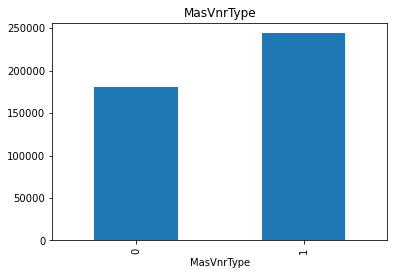

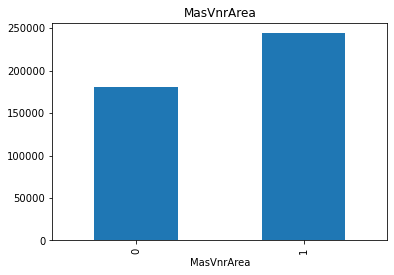

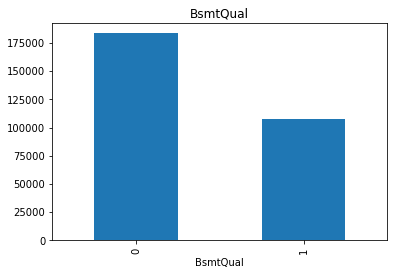

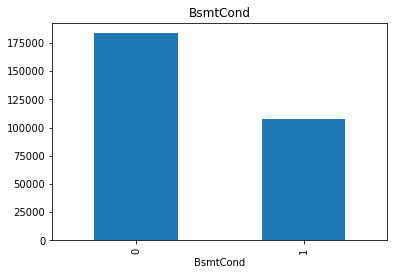

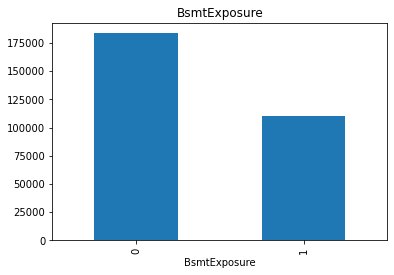

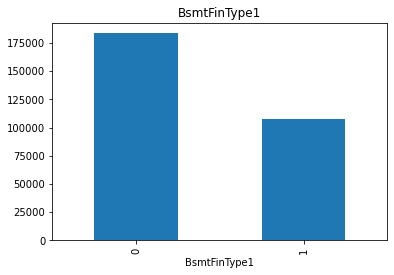

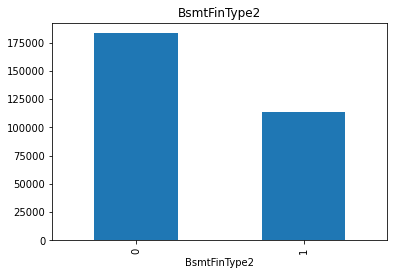

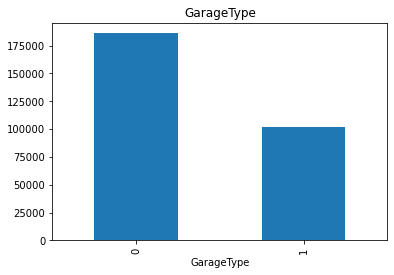

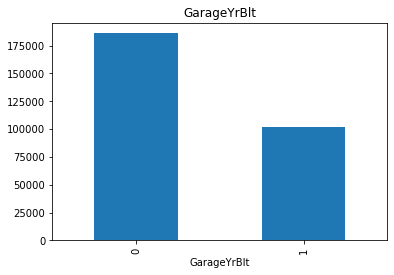

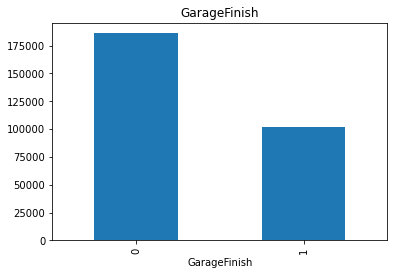

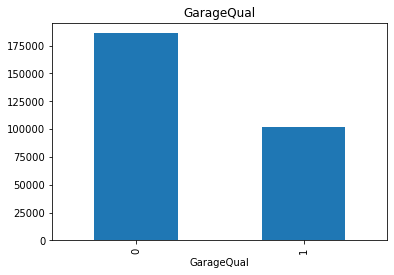

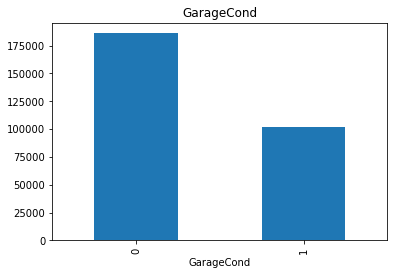

In [29]:
for feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or 0 otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.title(feature)
    plt.show()

### Observation - 
From above results it is clear that,
- 
- For missing value of alley, average cost is high
- For missing value of MasVnrType, average cost is high
- For missing value of MasVnrArea, average cost is high
- For missing value of BsmtQual, average cost is less
- For missing value of BsmtCond, average cost is less
- For missing value of BsmtExposure, average cost is less
- For missing value of BsmtFinType1, average cost is less
- For missing value of BsmtFinType2, average cost is less
- For missing value of FireplaceQu, average cost is less
- For missing value of GarageType, average cost is less
- For missing value of GarageYrBlt, average cost is less
- For missing value of GarageFinish, average cost is less
- For missing value of GarageQual, average cost is less
- For missing value of GarageCond, average cost is less
- For missing value of PoolQC, average cost is less
- For missing value of Fence, average cost is high
- For missing value of MiscFeature, average cost is high

### Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful.

In [30]:
# All missing Values
print("There are total", df.isnull().sum().sum(), "missing values in dataset")

There are total 486 missing values in dataset


In [31]:
df.fillna(df.median(), inplace=True)

In [32]:
# All missing Values
print("There are total", df.isnull().sum().sum(), "missing values in dataset")

There are total 415 missing values in dataset


In [33]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

In [34]:
for feature in features_with_na:
    df[feature] = df[feature].fillna(df[feature].mode()[0])

In [35]:
# All missing Values
print("There are total", df.isnull().sum().sum(), "missing values in dataset")

There are total 0 missing values in dataset


### Observation - 
After replacing missing, values there are no missing values in dataset.

In [36]:
# Removing duplicate values
df.duplicated().sum()

0

In [37]:
df.describe()

MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1168.000000    1168.000000  1168.000000  1168.000000  1168.000000   
mean     56.767979   10484.749144     6.104452     5.595890  1970.930651   
std      41.940650    8957.442311     1.390153     1.124343    30.145255   
min      20.000000    1300.000000     1.000000     1.000000  1875.000000   
25%      20.000000    7621.500000     5.000000     5.000000  1954.000000   
50%      50.000000    9522.500000     6.000000     5.000000  1972.000000   
75%      70.000000   11515.500000     7.000000     6.000000  2000.000000   
max     190.000000  164660.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean    1984.758562   101.696918   444.726027    46.647260   569.721747   
std       20.785185   182.218483   462.664785   163.520016   449.375525   
min     1950.000000     0.000000     0.000000     0.000000     0.000000   
25%     1966.000000     0.000000     0.000000     0.000000   216.000000   
50%     1993.000000     0.000000   385.500000     0.000000   474.000000   
75%     2004.000000   160.000000   714.500000     0.000000   816.000000   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1168.000000  1168.000000  1168.000000   1168.000000  1168.000000   
mean   1061.095034  1169.860445   348.826199      6.380137  1525.066781   
std     442.272249   391.161983   439.696370     50.892844   528.042957   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     799.000000   892.000000     0.000000      0.000000  1143.250000   
50%    1005.500000  1096.500000     0.000000      0.000000  1468.500000   
75%    1291.500000  1392.000000   729.000000      0.000000  1795.000000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1168.000000   1168.000000  1168.000000  1168.000000   1168.000000   
mean       0.425514      0.055651     1.562500     0.388699      2.884418   
std        0.521615      0.236699     0.551882     0.504929      0.817229   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars  \
count   1168.000000   1168.000000  1168.000000  1168.000000  1168.000000   
mean       1.045377      6.542808     0.617295  1978.292808     1.776541   
std        0.216292      1.598484     0.650575    24.202053     0.745554   
min        0.000000      2.000000     0.000000  1900.000000     0.000000   
25%        1.000000      5.000000     0.000000  1962.000000     1.000000   
50%        1.000000      6.000000     1.000000  1980.000000     2.000000   
75%        1.000000      7.000000     1.000000  2001.000000     2.000000   
max        3.000000     14.000000     3.000000  2010.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    476.860445    96.206336    46.559932      23.015411     3.639555   
std     214.466769   126.158988    66.381023      63.191089    29.088867   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     338.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    24.000000       0.000000     0.000000   
75%     576.000000   171.000000    70.000000       0.000000 

In [38]:
df.describe(include='O')

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1168   1168     1168        1168      1168      1168      1168   
unique        5      2        4           4         1         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq        928   1164      740        1046      1168       842      1105   

       Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
count          1168       1168       1168     1168       1168      1168   
unique           25          9          8        5          8         6   
top           NAmes       Norm       Norm     1Fam     1Story     Gable   
freq            182       1005       1154      981        578       915   

       RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
count      1168        1168        1168       1168      1168      1168   
unique        8          14          15          4         4         5   
top     CompShg     VinylSd     VinylSd       None        TA        TA   
freq       1144         396         387        703       717      1022   

       Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
count        1168     1168     1168         1168         1168         1168   
unique          6        4        4            4            6            6   
top        CBlock       TA       TA           No          Unf          Unf   
freq          516      547     1071          787          375         1033   

       Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
count     1168      1168       1168       1168        1168       1168   
unique       6         5          2          5           4          7   
top       GasA        Ex          Y      SBrkr          TA        Typ   
freq      1143       585       1090       1070         578       1085   

       GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
count        1168         1168       1168       1168       1168     1168   
unique          6            3          5          5          3        9   
top        Attchd          Unf         TA         TA          Y       WD   
freq          755          551       1114       1125       1071      999   

       SaleCondition  
count           1168  
unique             6  
top           Normal  
freq             945

In [39]:
df.shape

(1168, 74)

## Checking relation of 'SalePrice' with all features, using correlation matrix.

<AxesSubplot:>

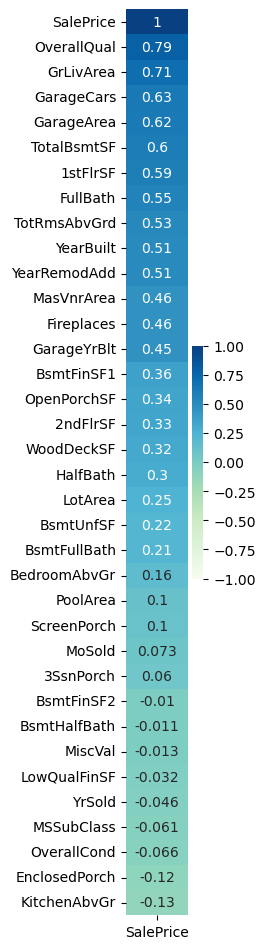

In [40]:
plt.figure(figsize=(1,12), dpi=100)
sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice',ascending= False ), vmin=-1,vmax=1,annot= True ,cmap='GnBu')

Text(0.5, 1.0, 'House Price vs YearSold')

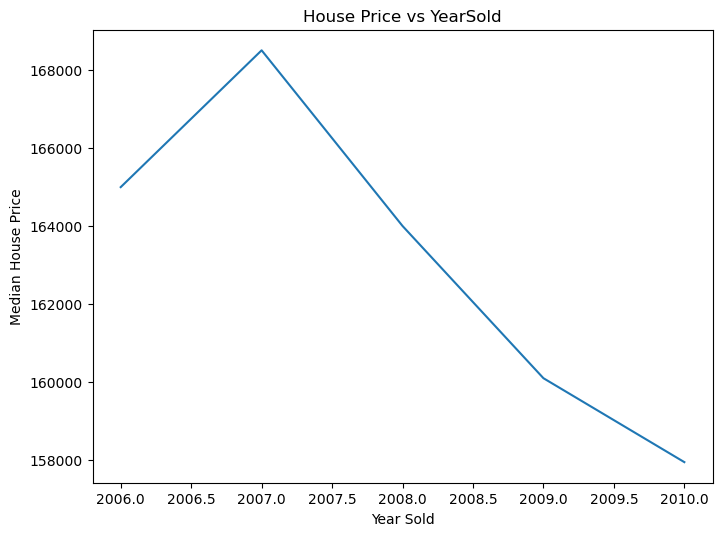

In [41]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price
plt.figure(figsize=(8,6), dpi=100)
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

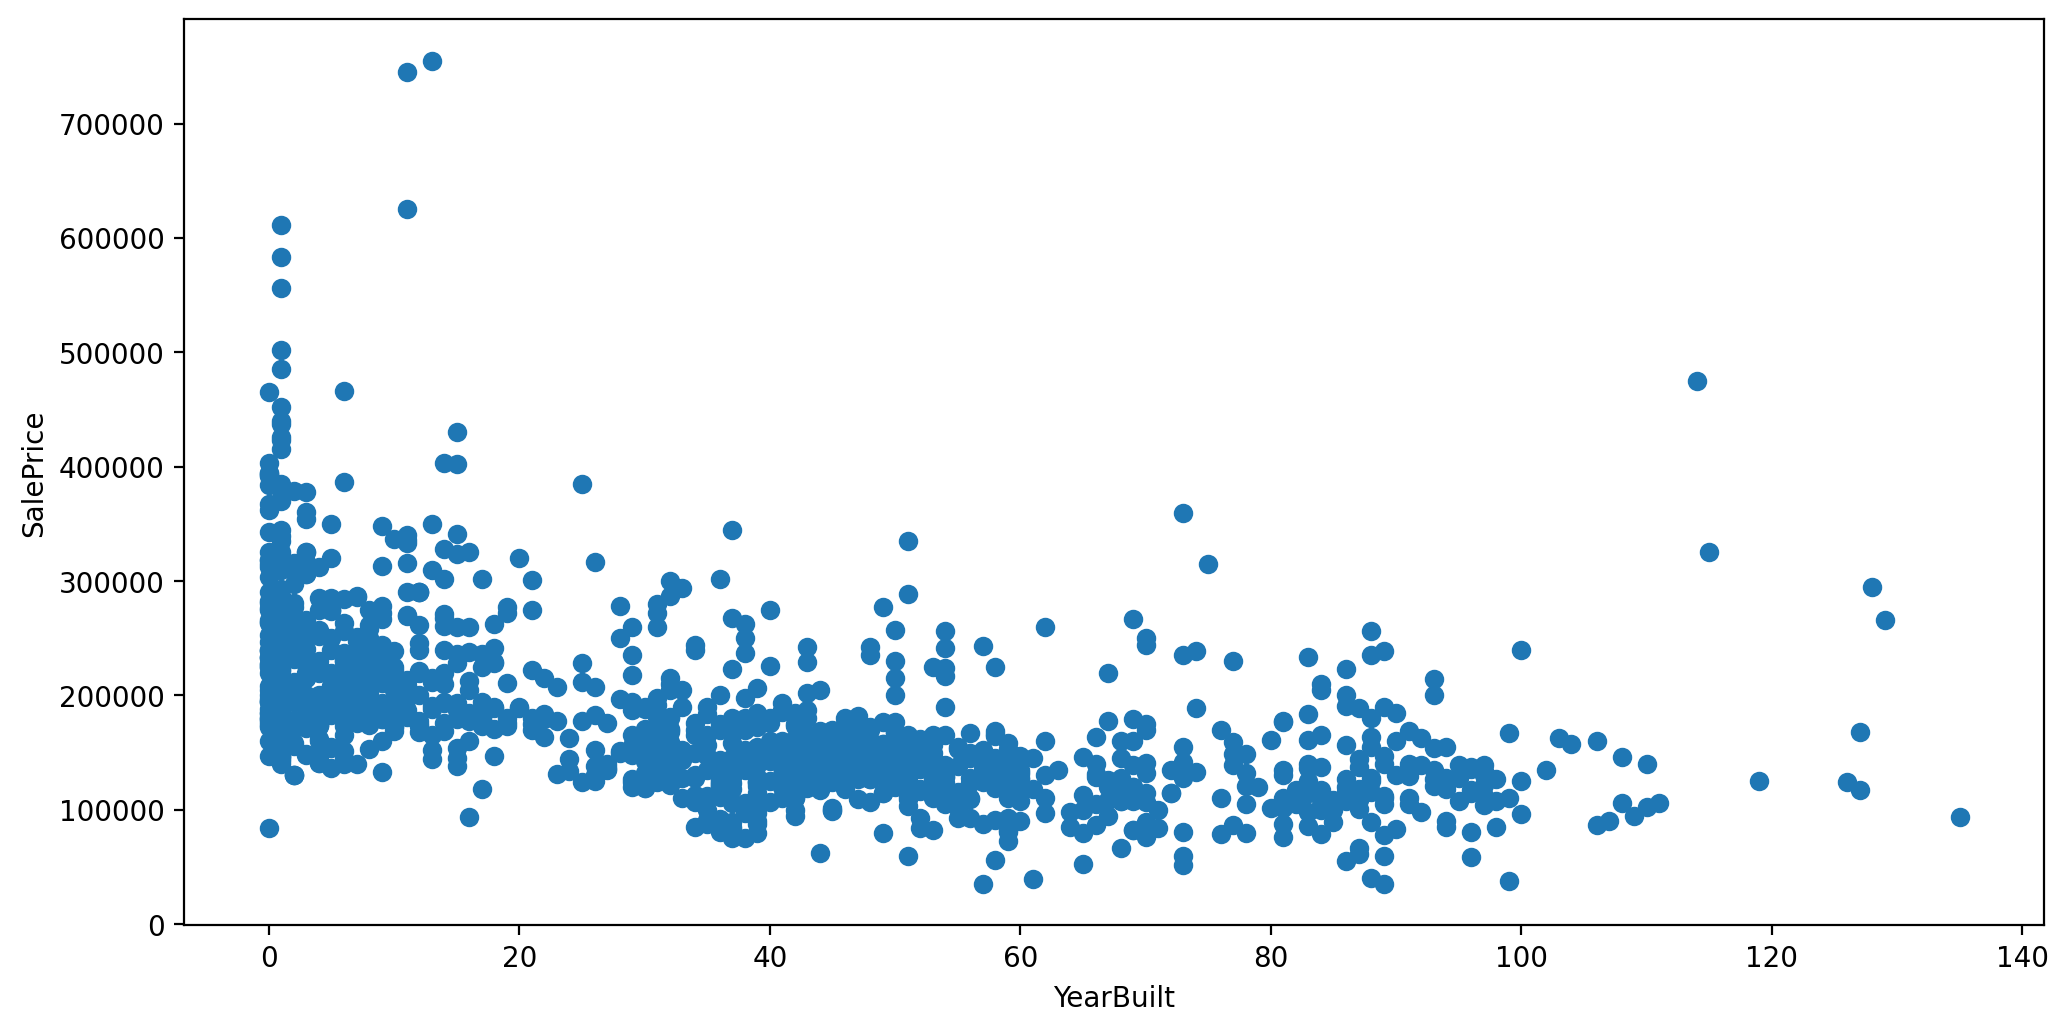

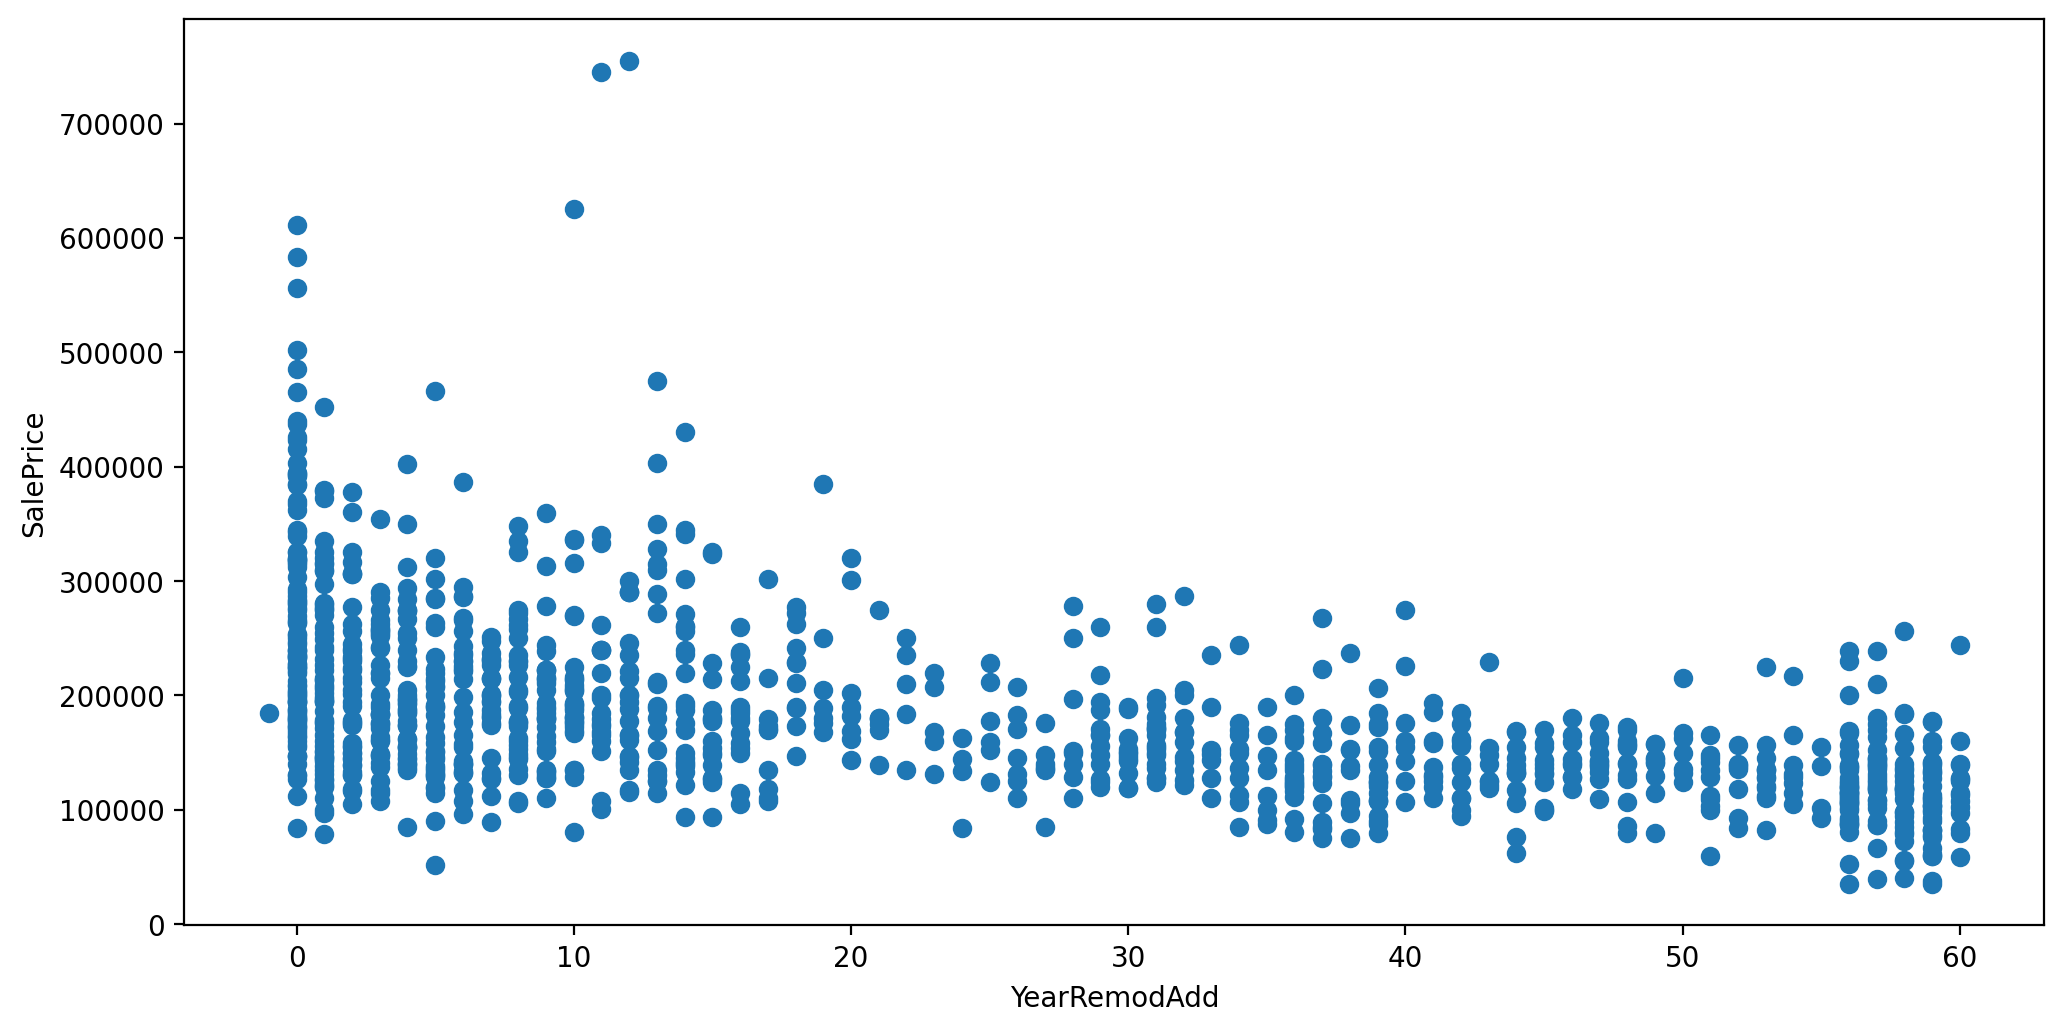

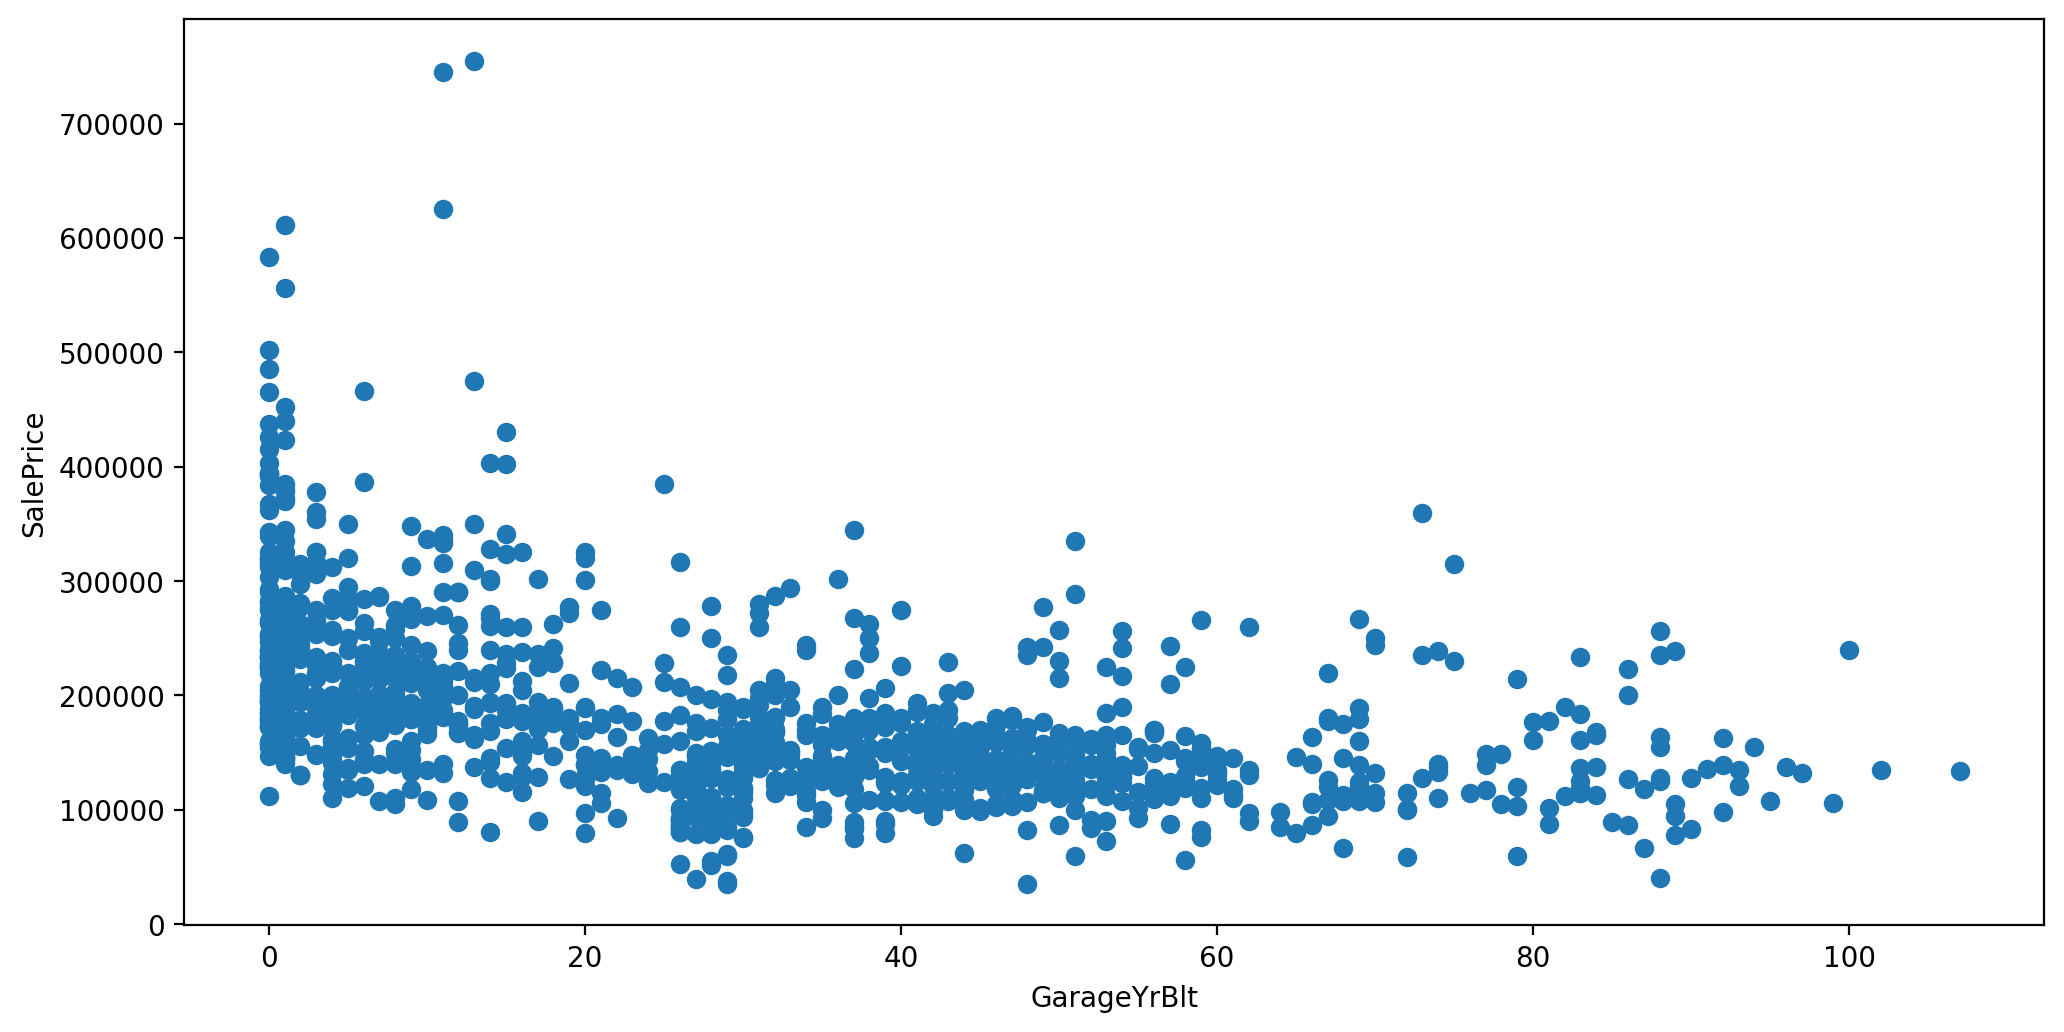

In [42]:
## Here we will compare the difference between All years feature with SalePrice
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

for feature in year_feature:
    if feature!='YrSold':
        data=df.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]
        plt.figure(figsize=(12,6), dpi=200)
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

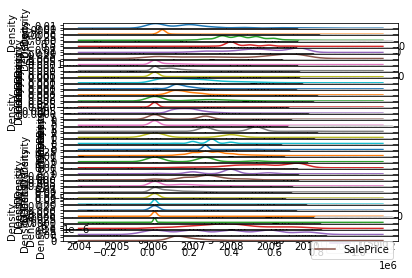

In [43]:
df.plot(kind='density',subplots=True,sharex=False)
plt.show()

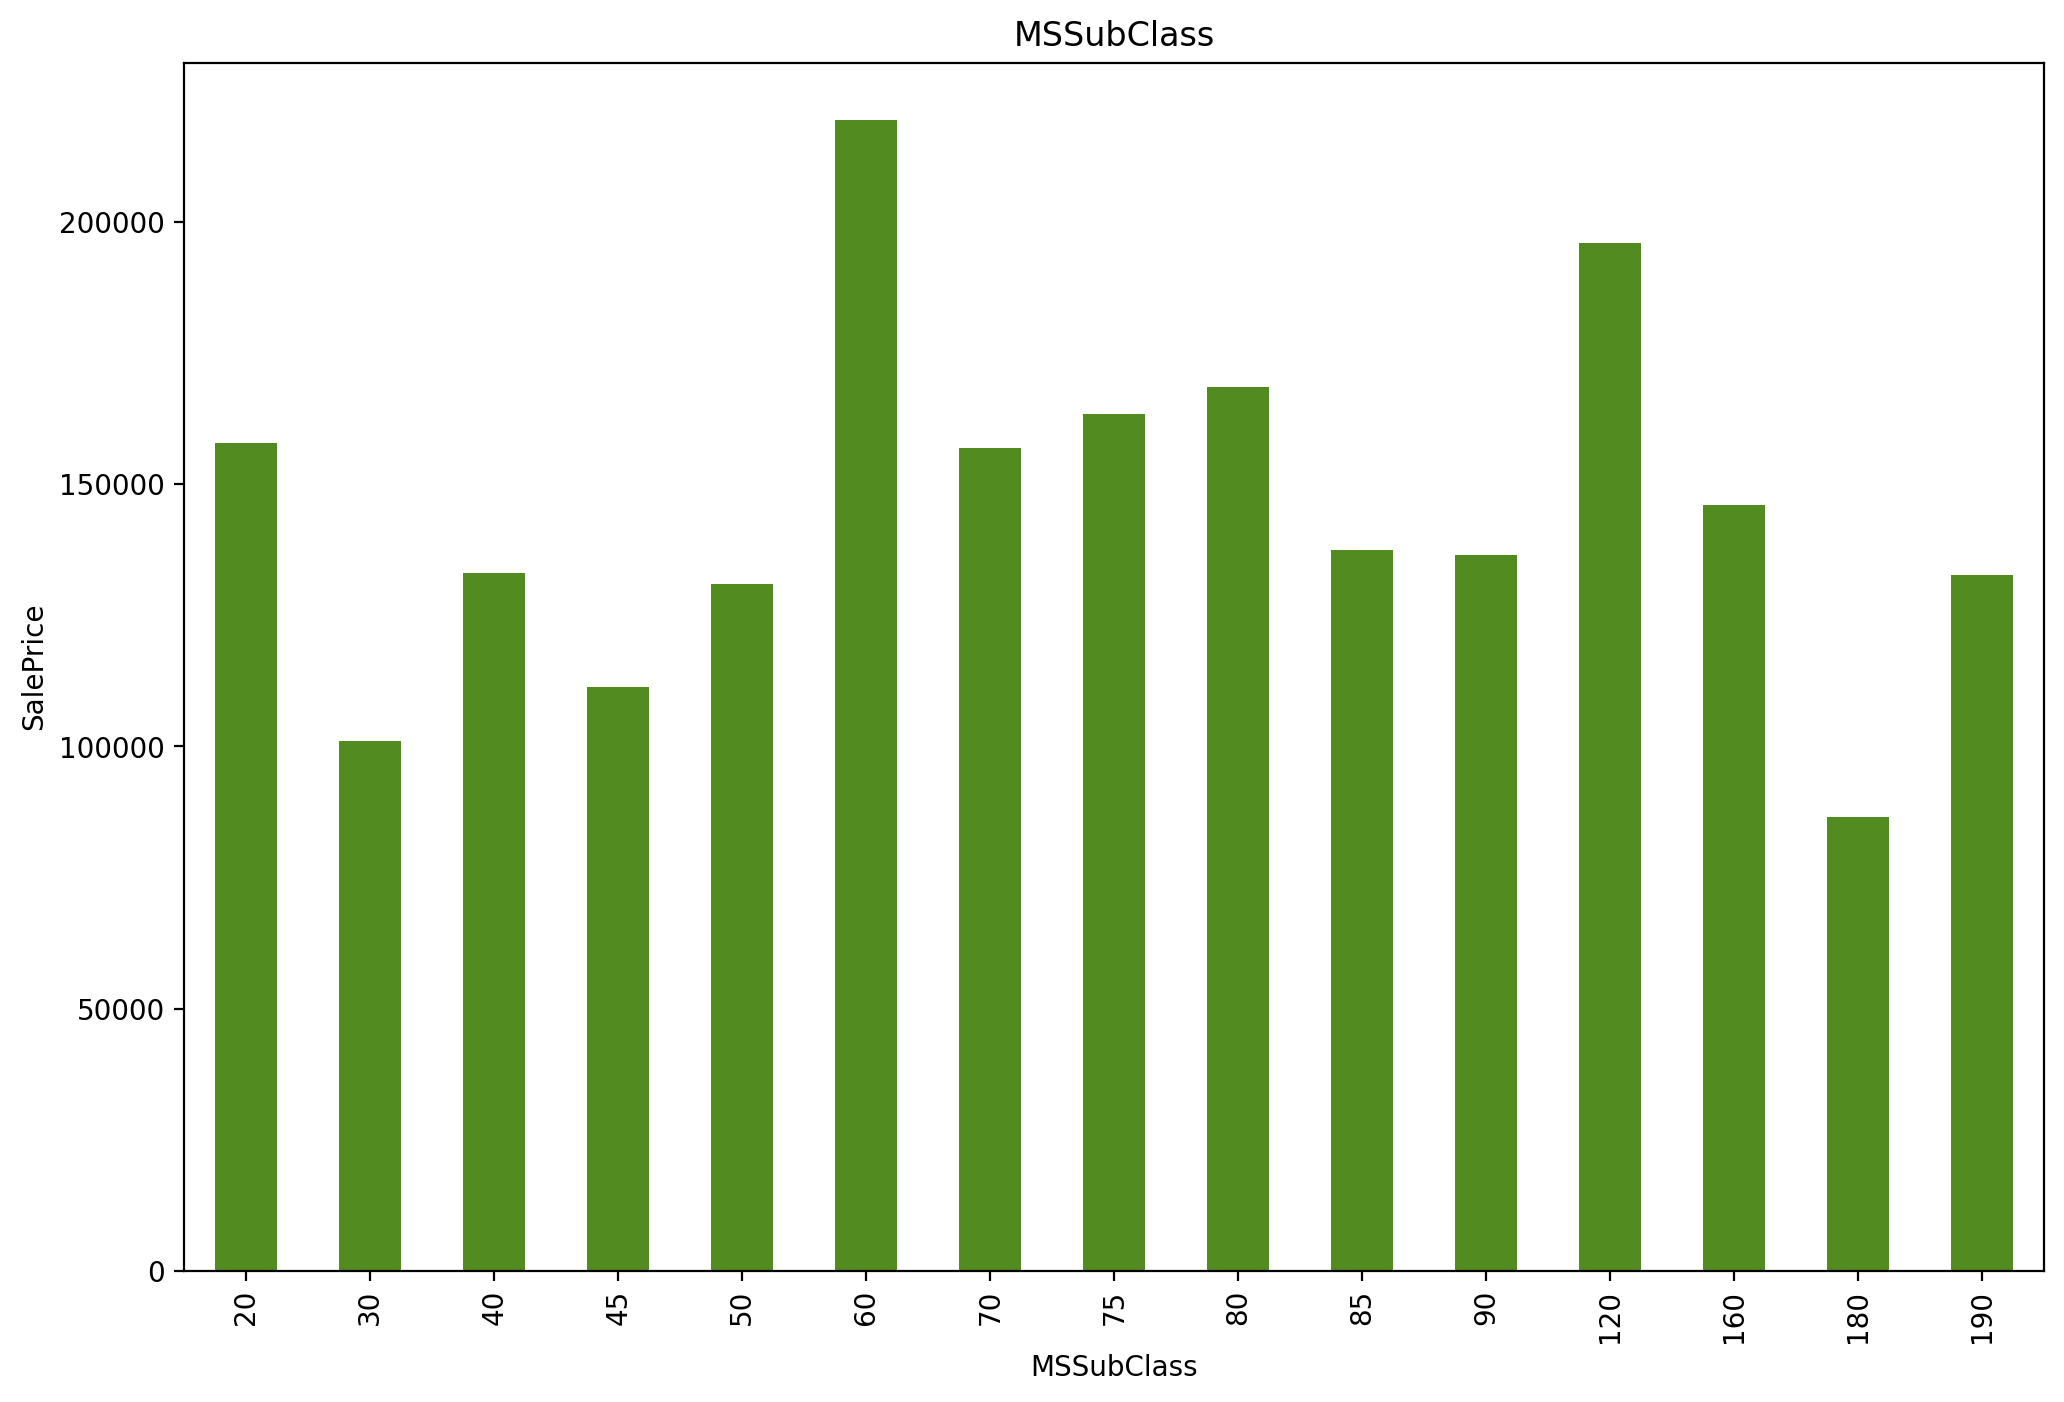

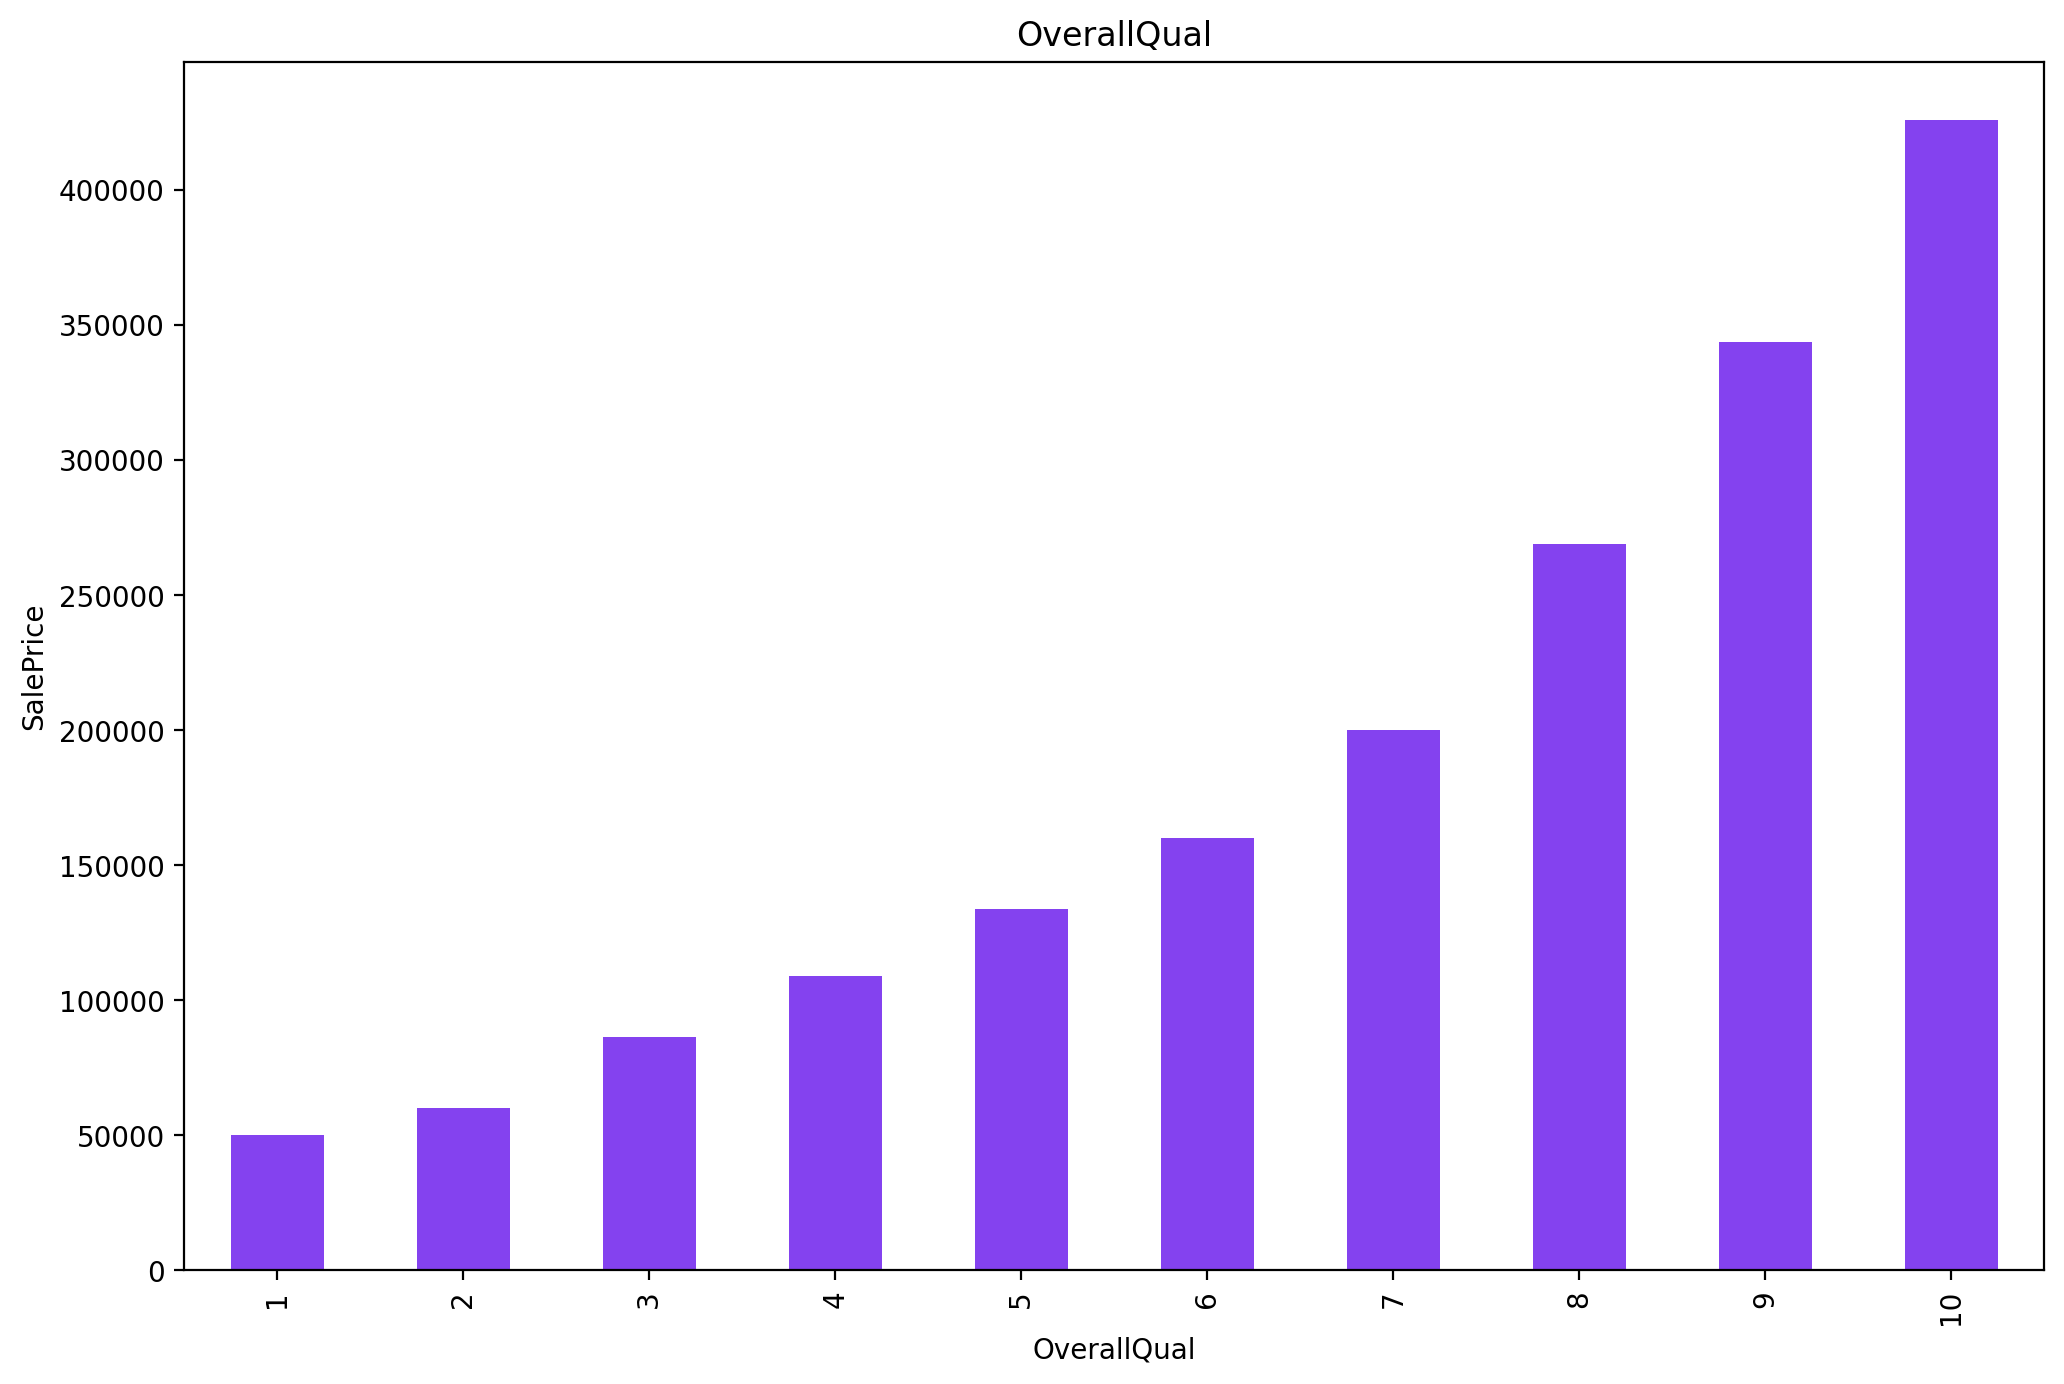

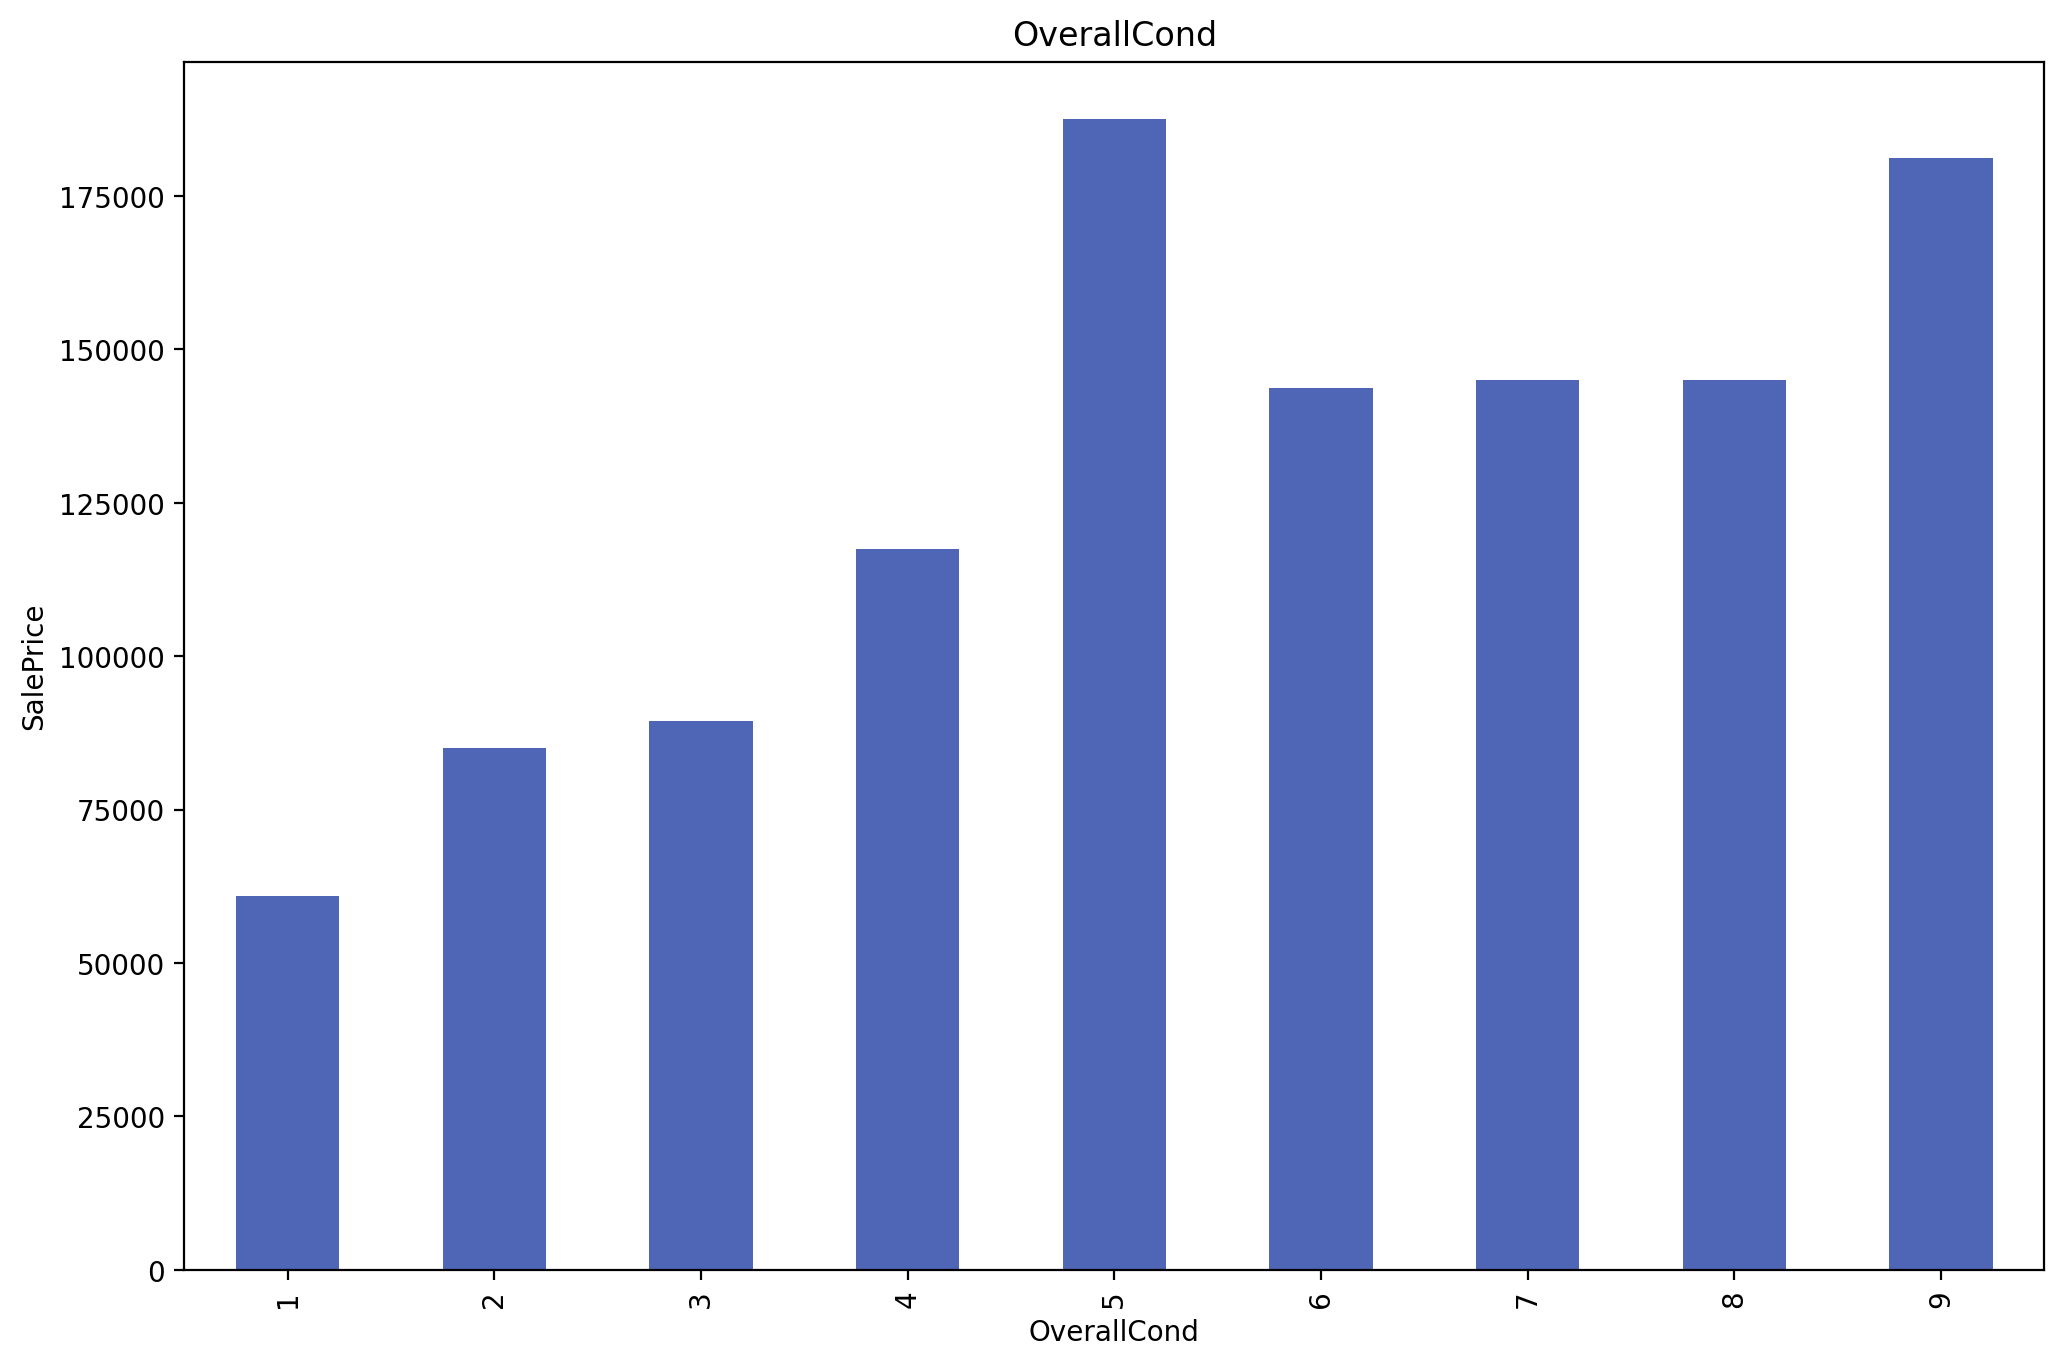

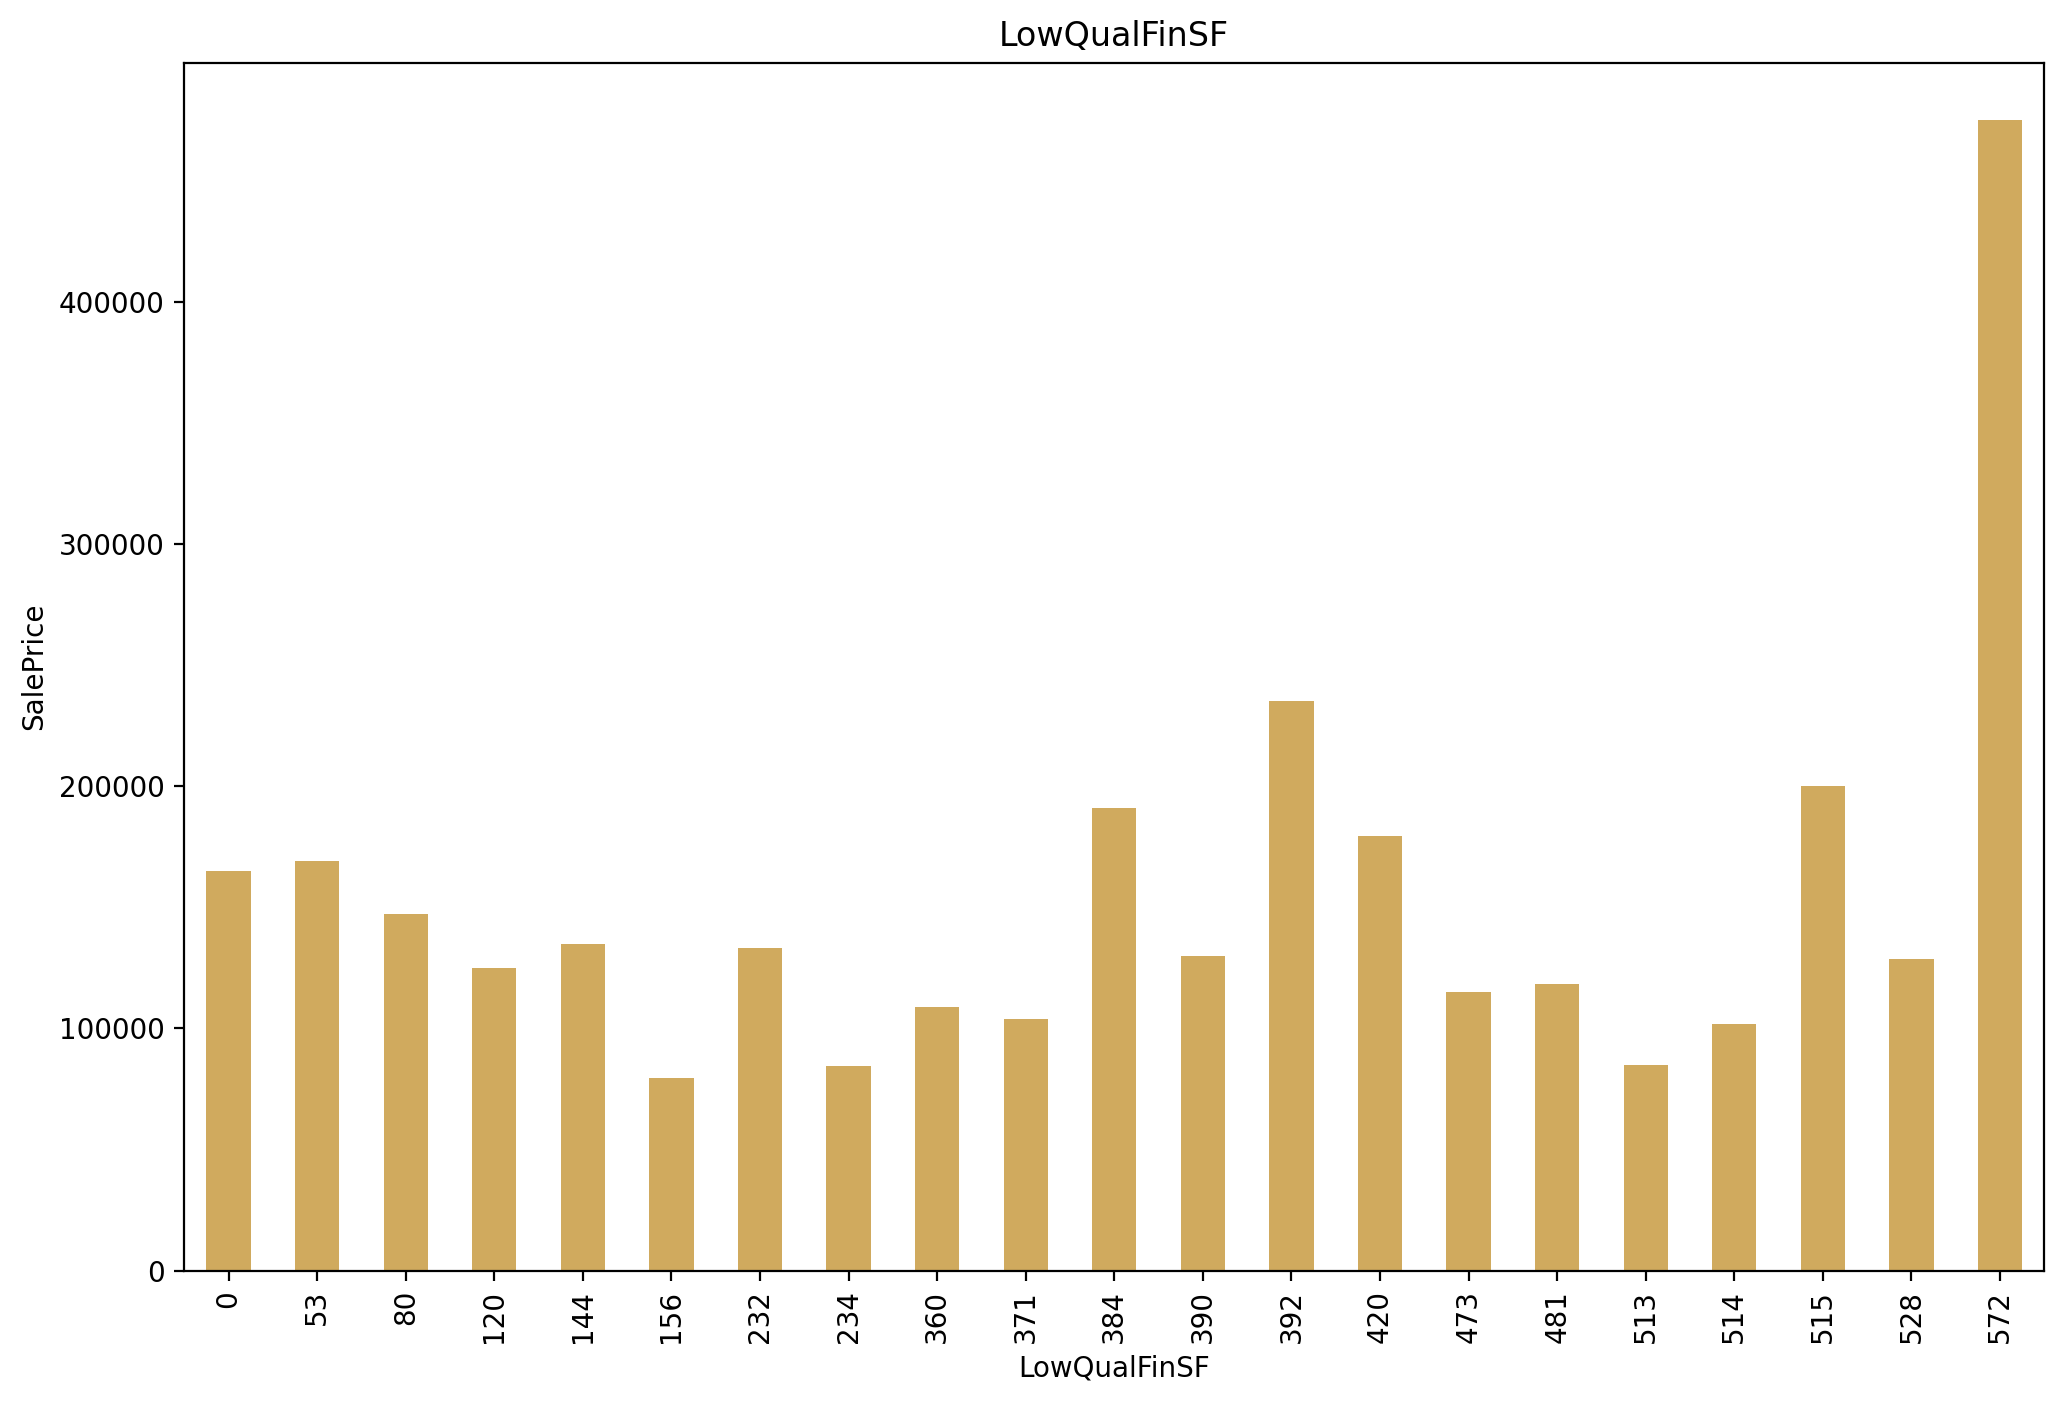

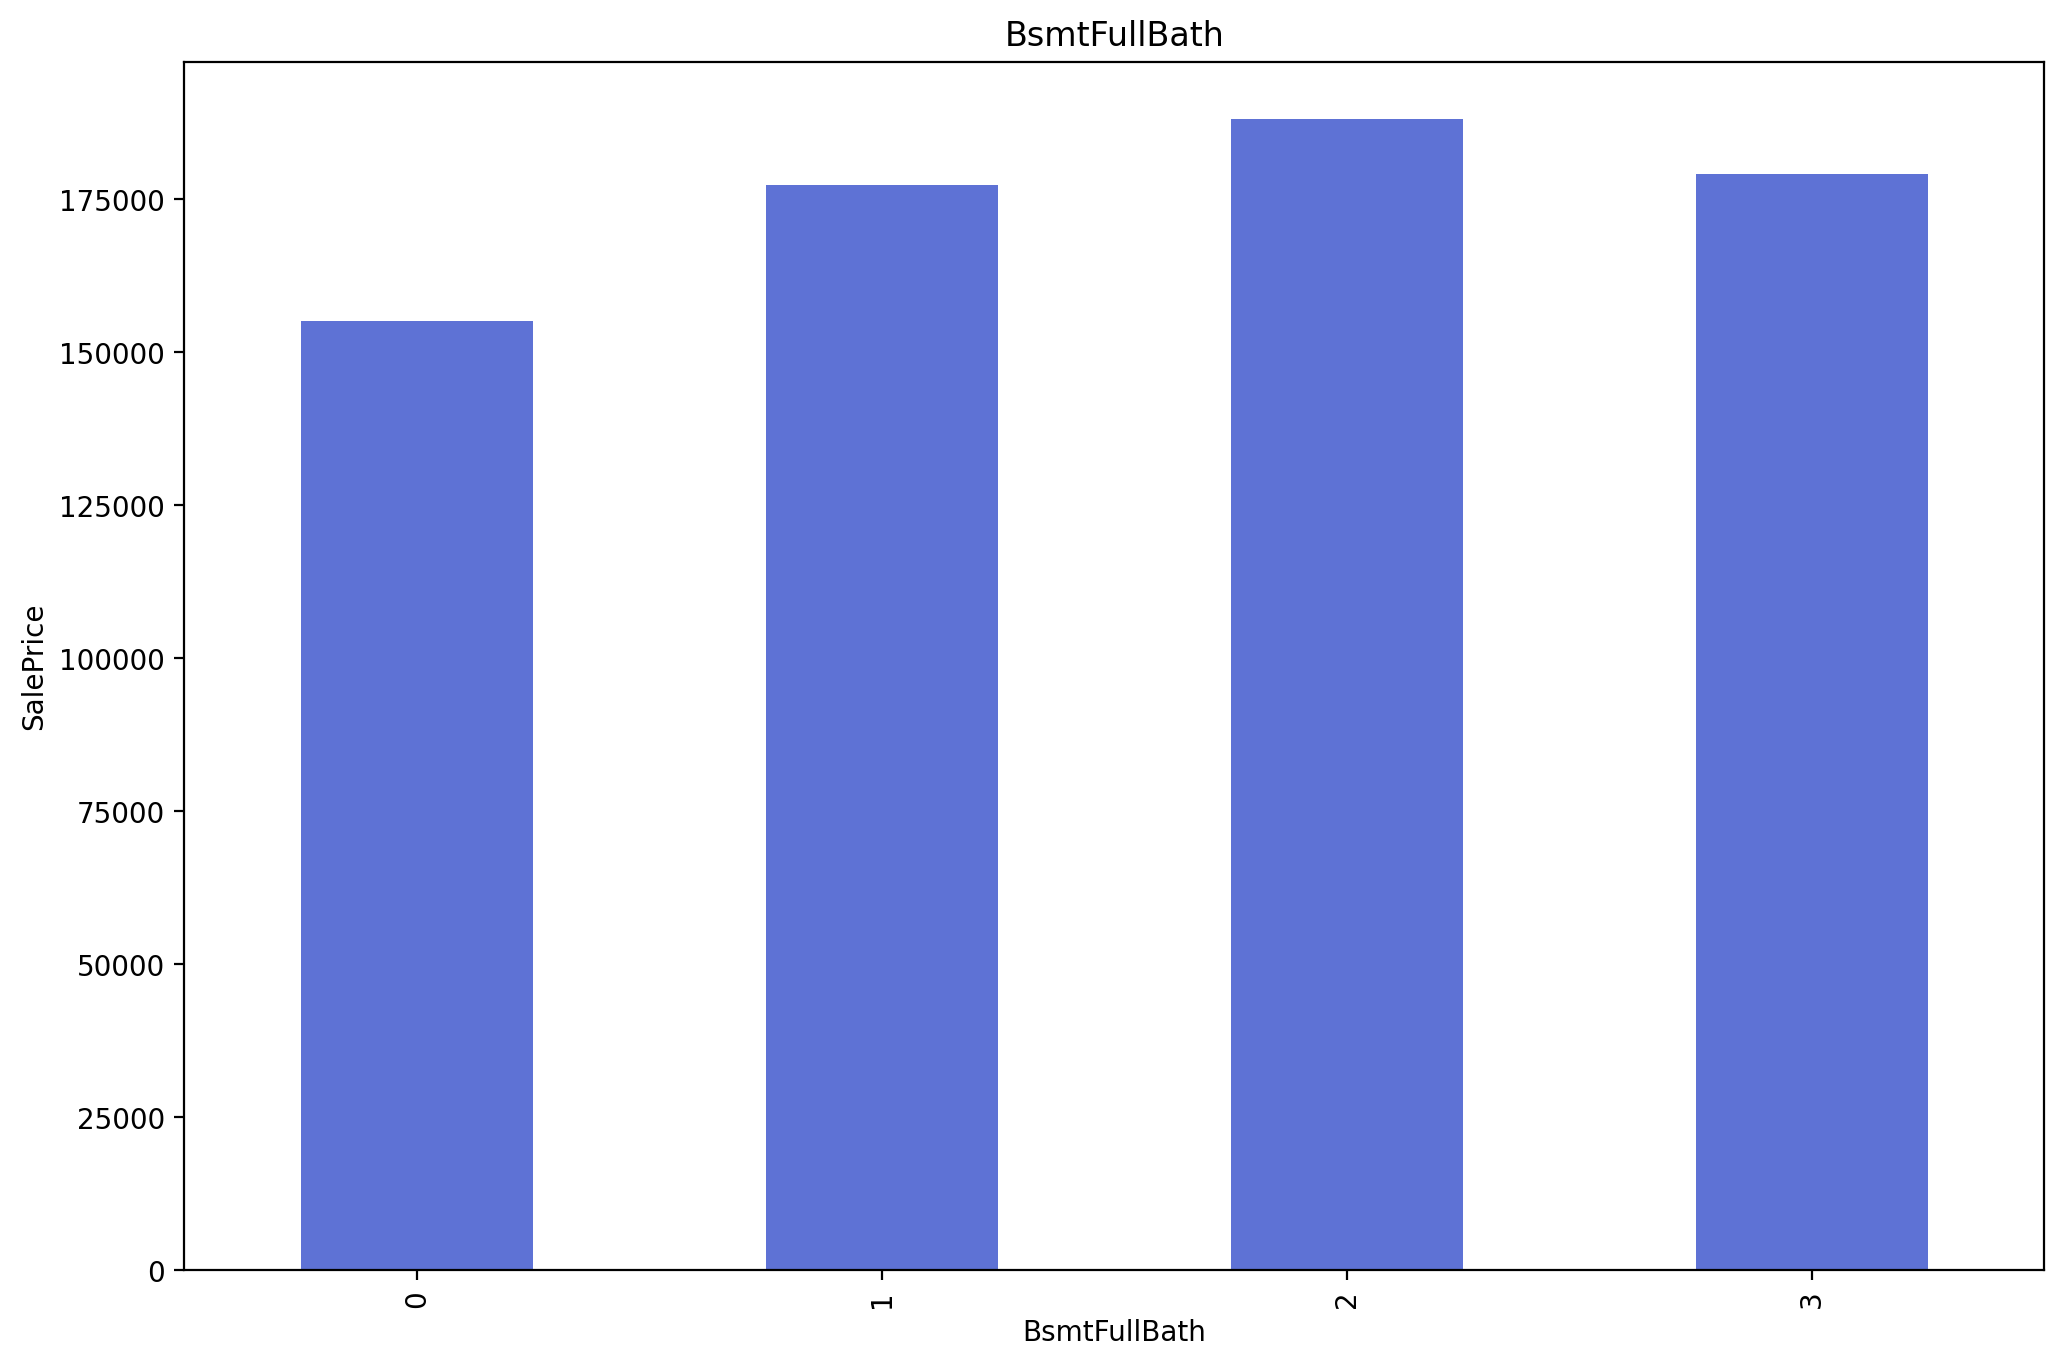

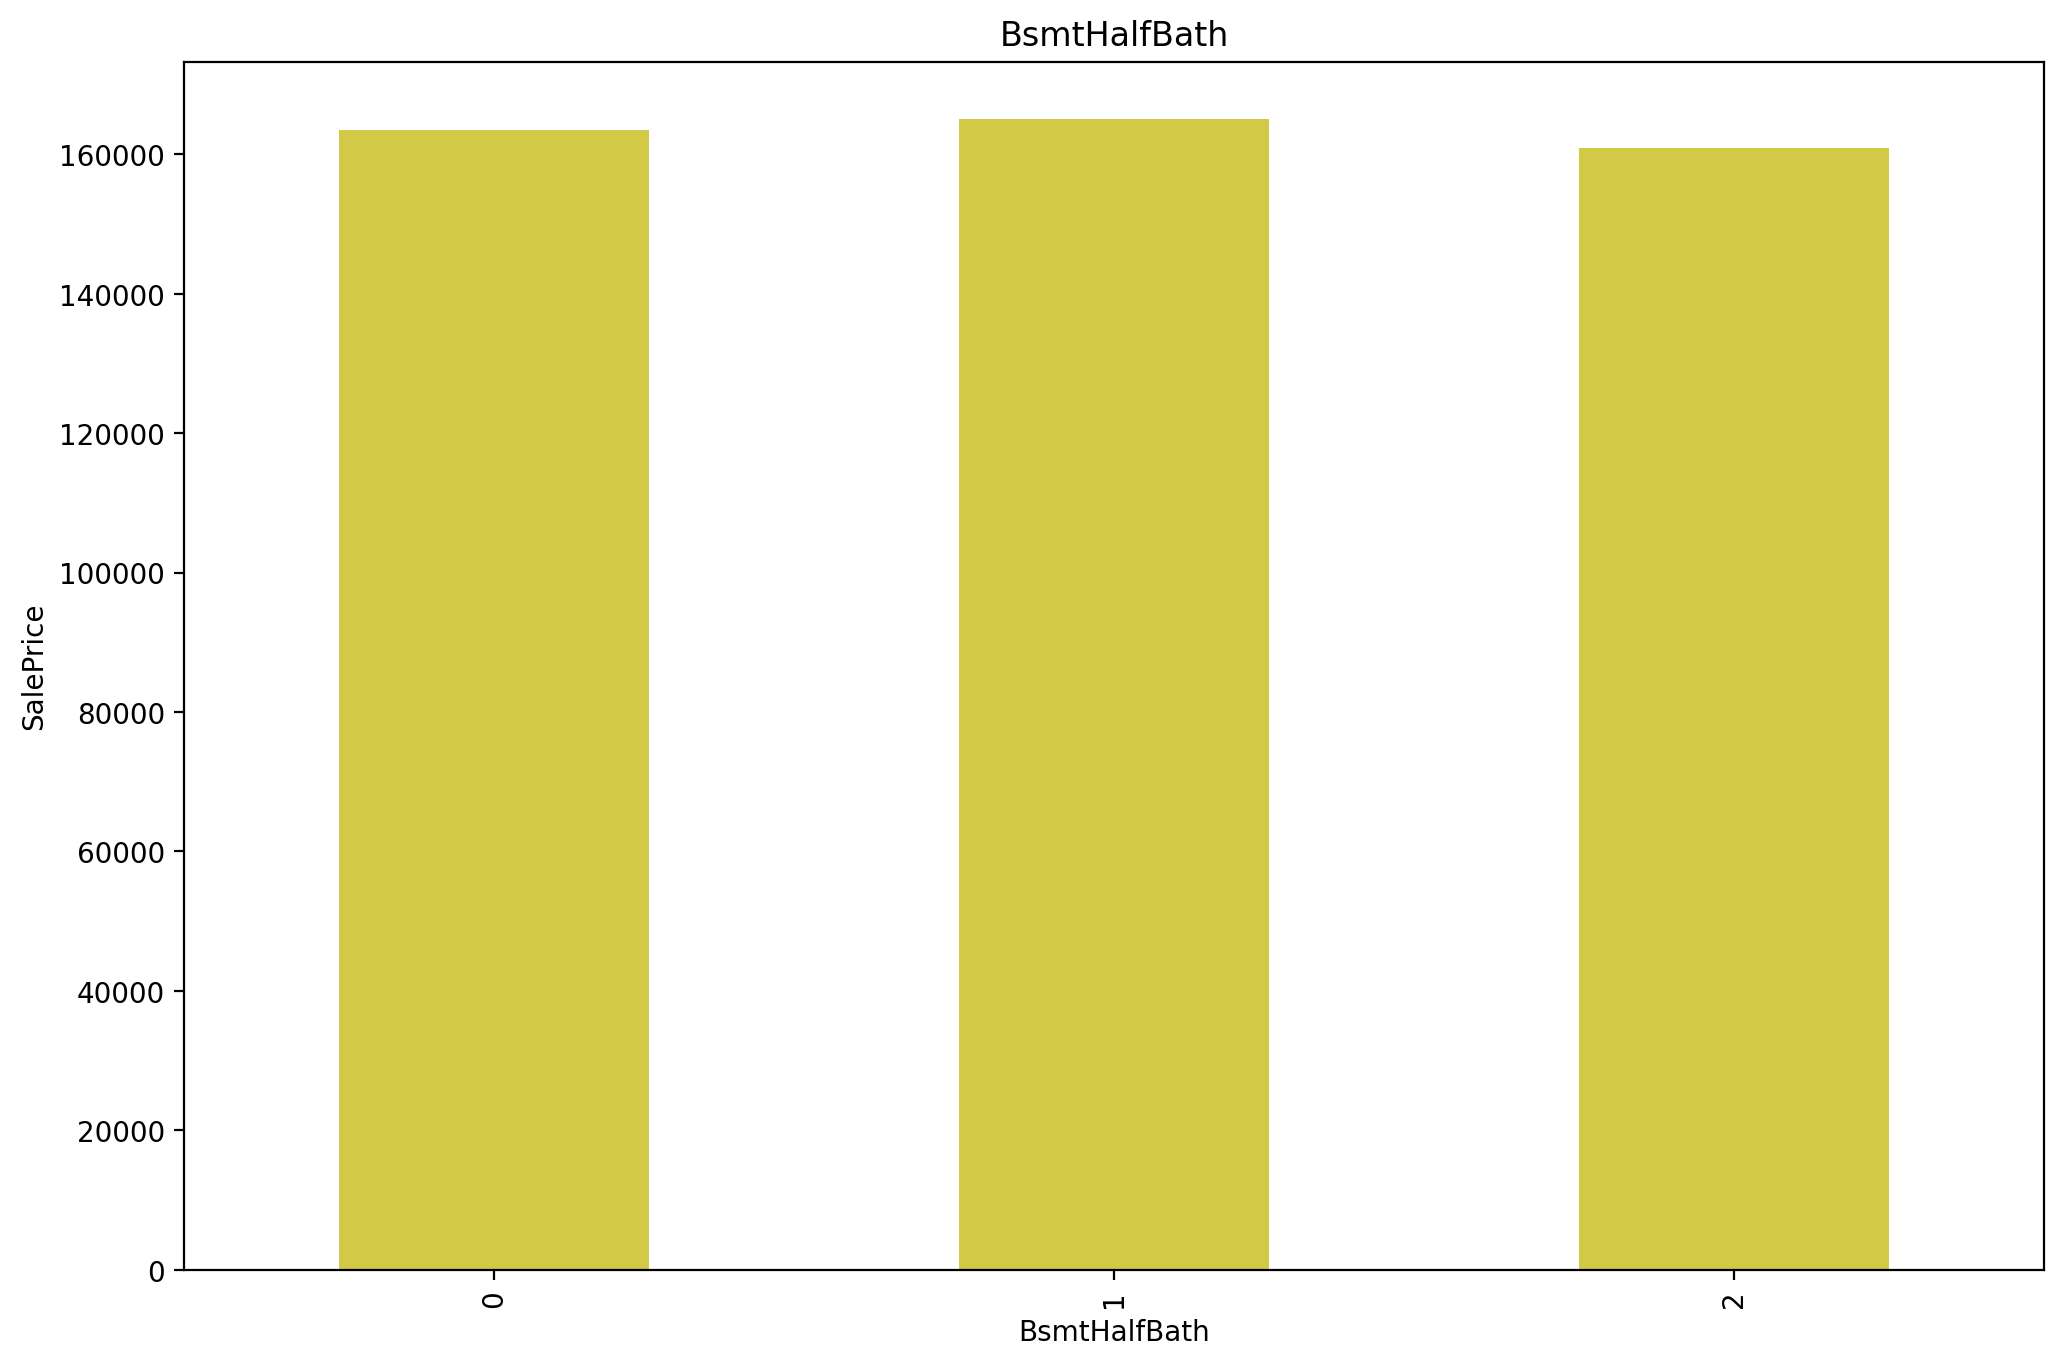

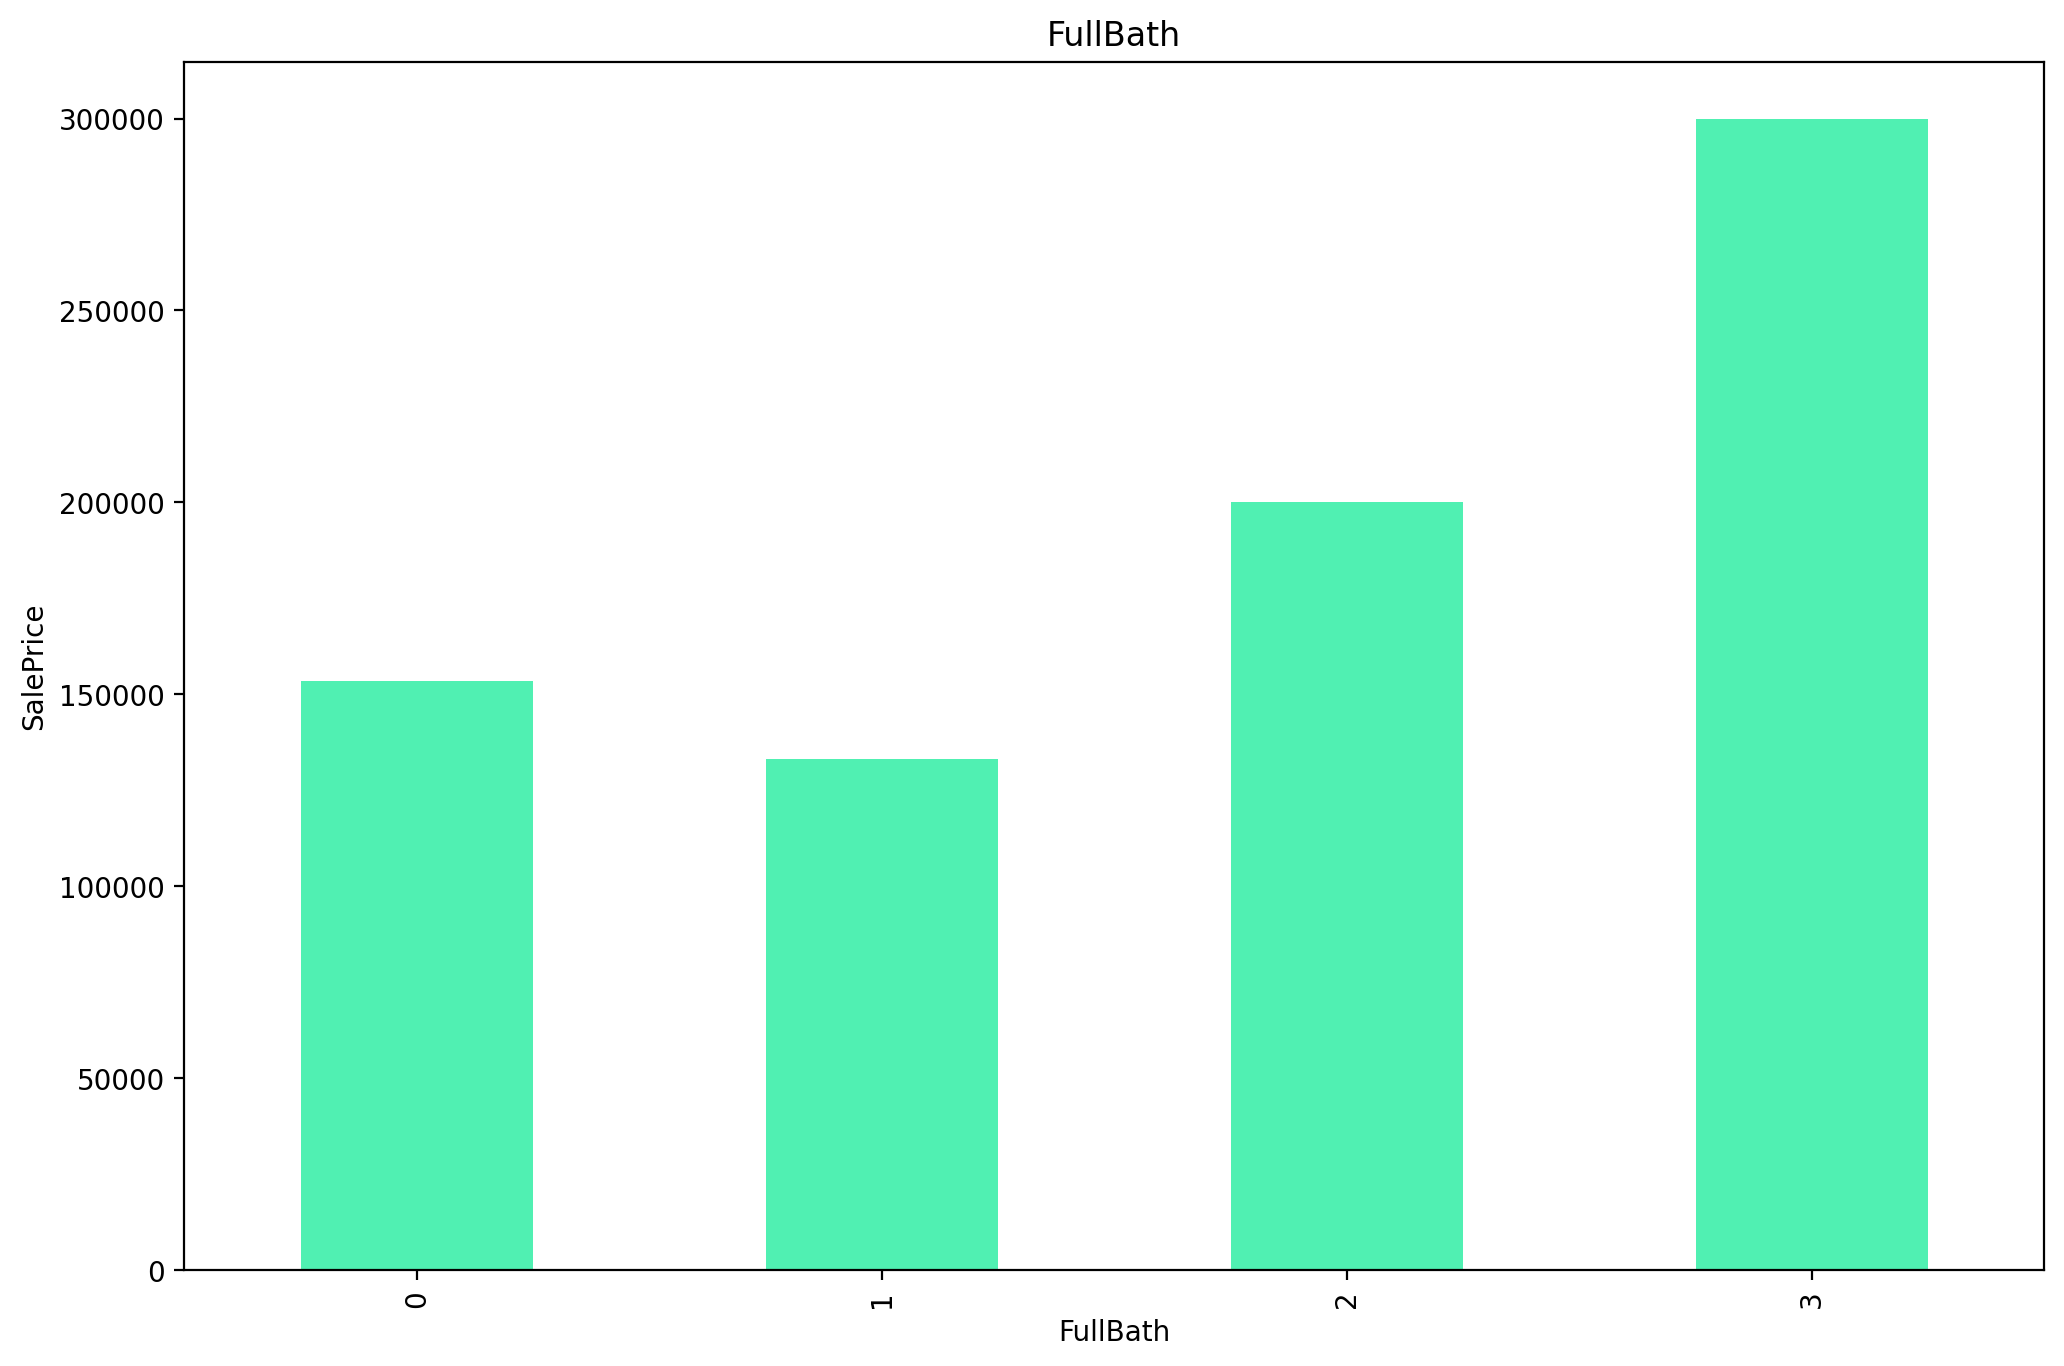

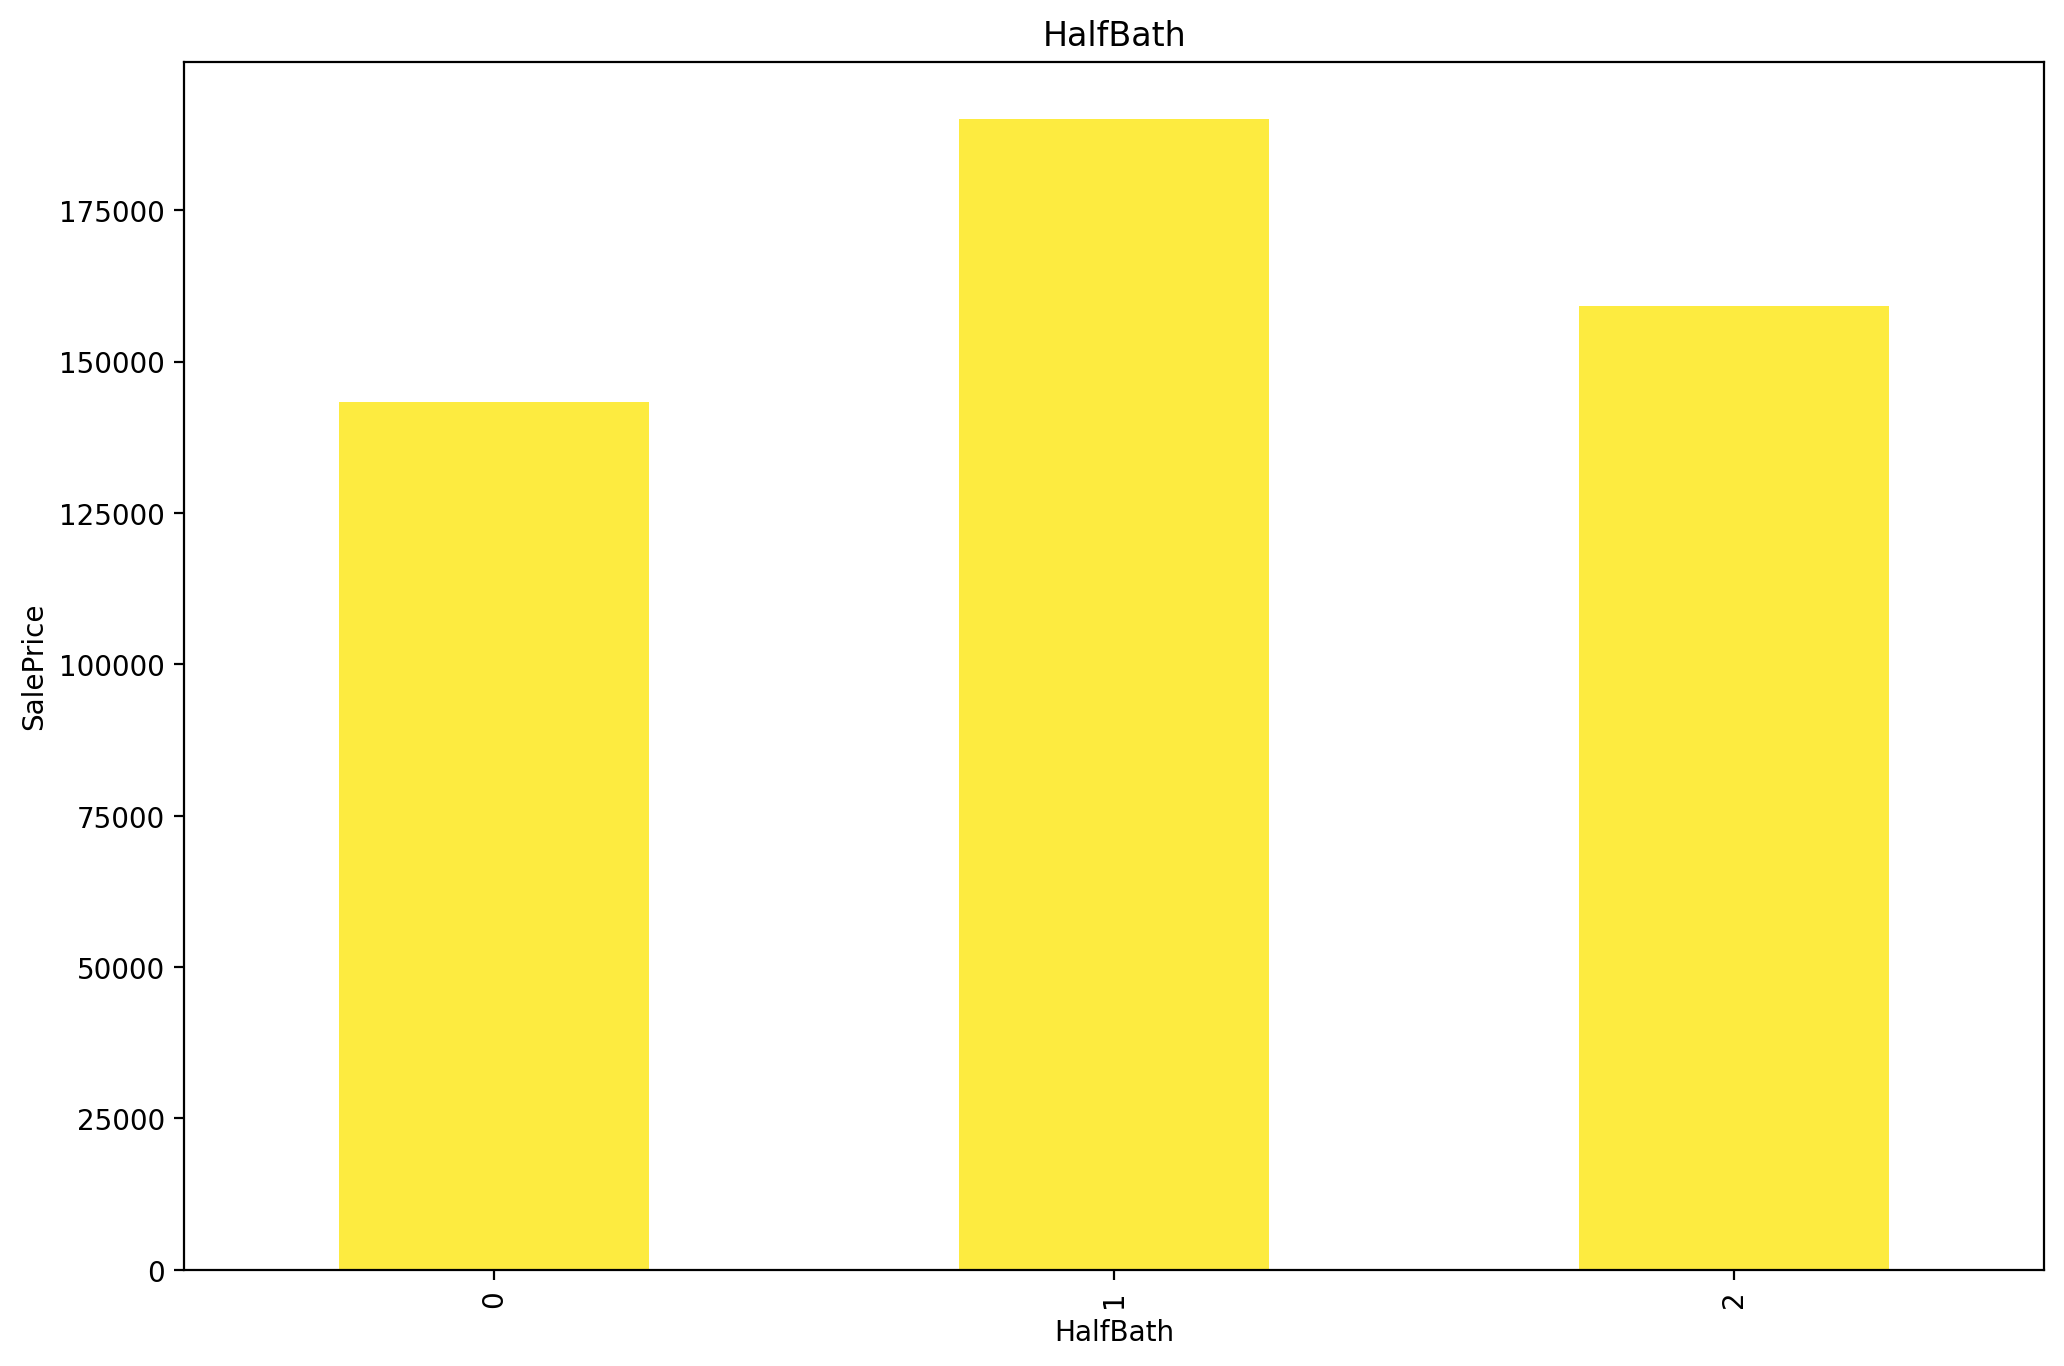

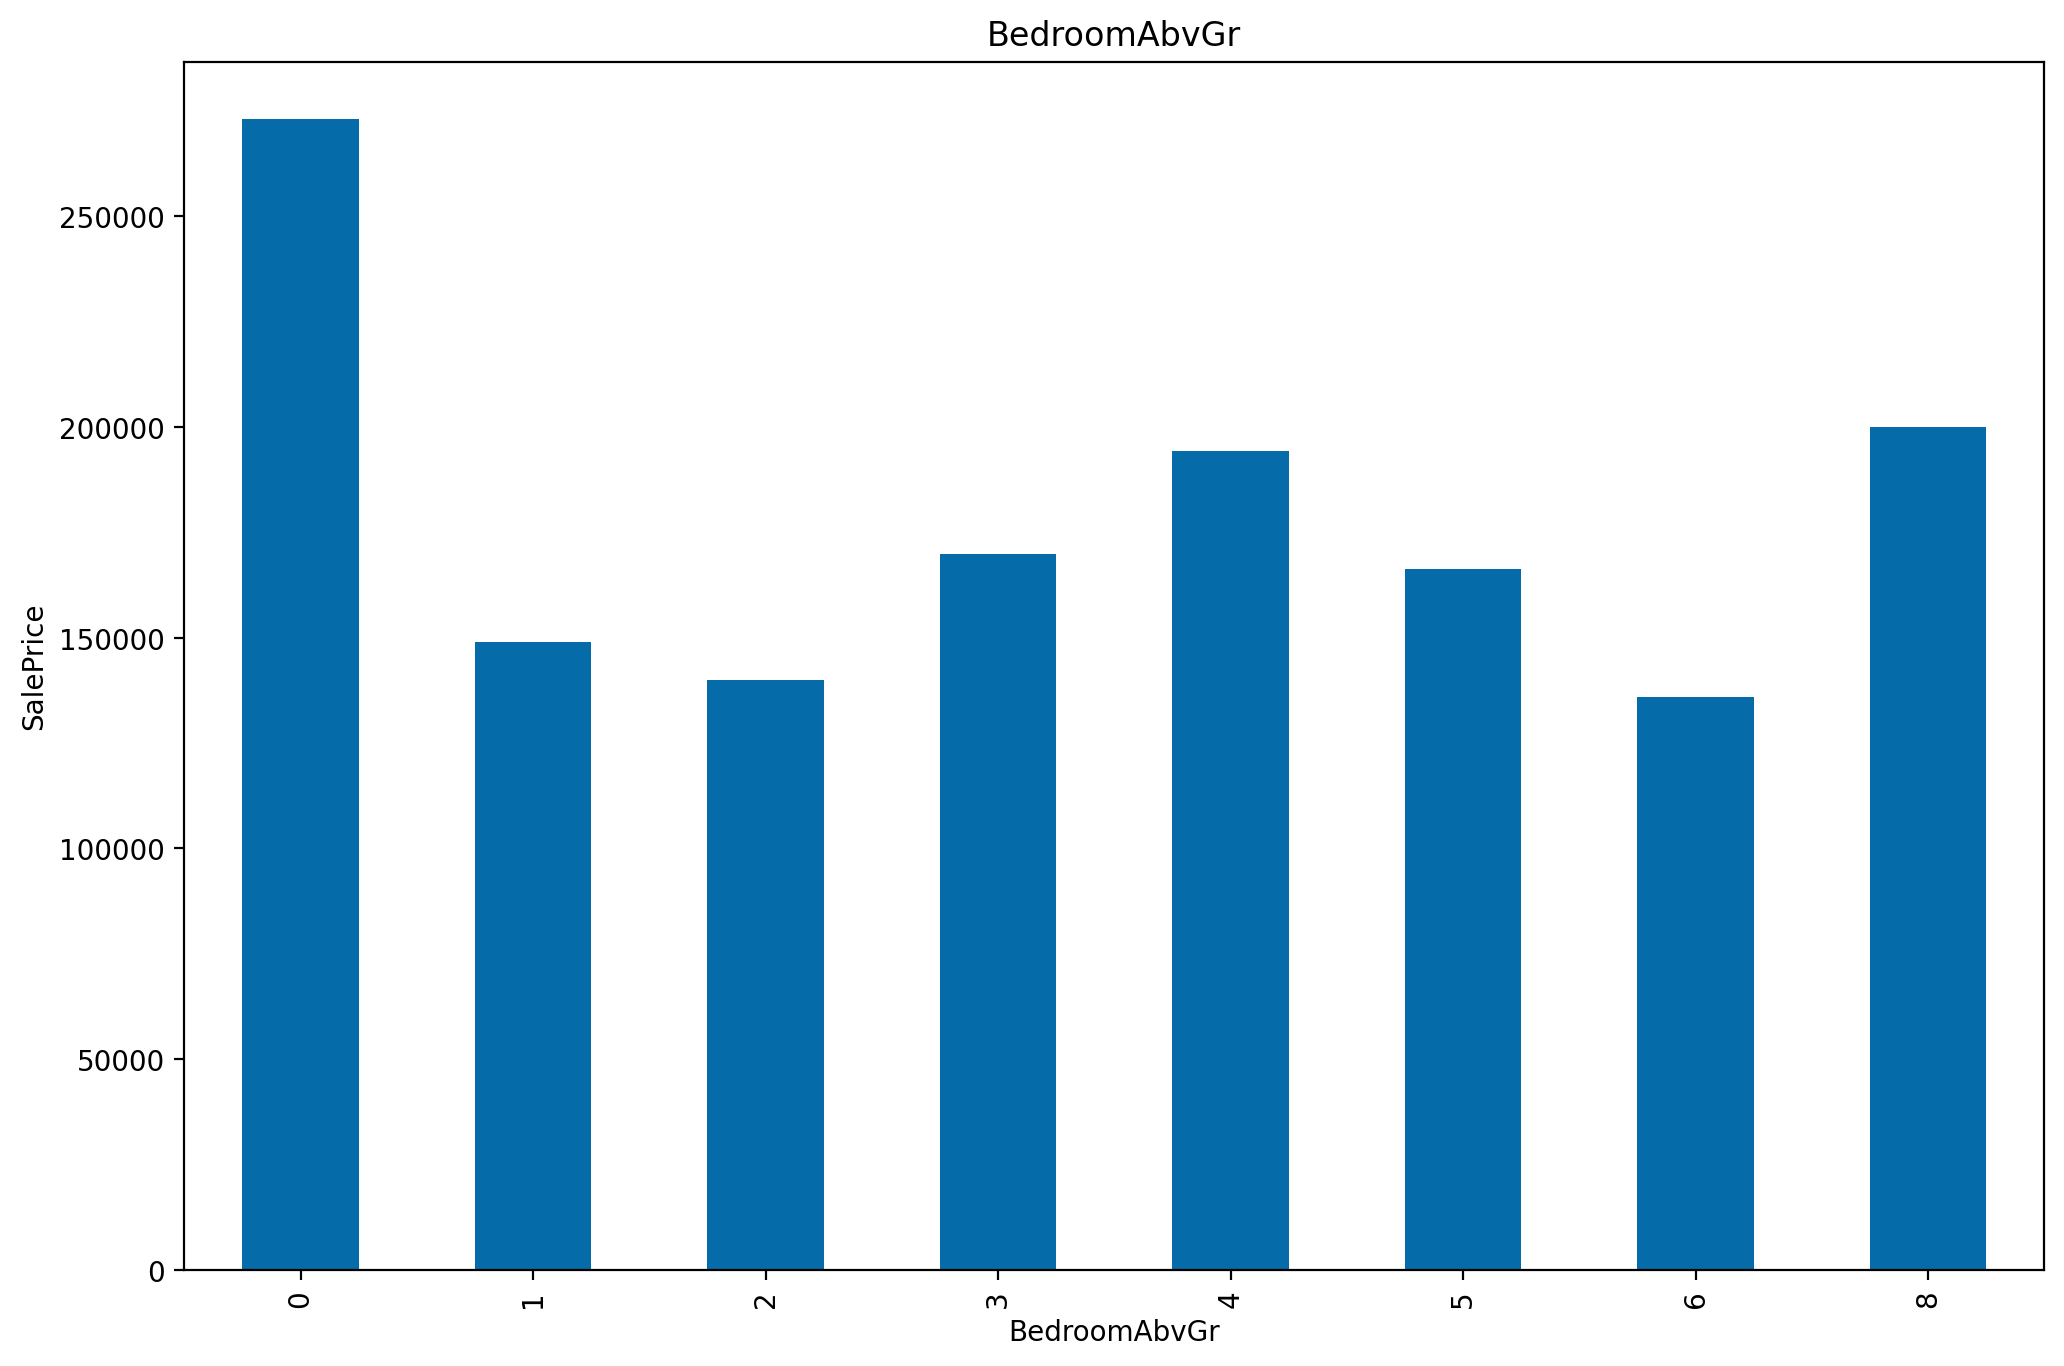

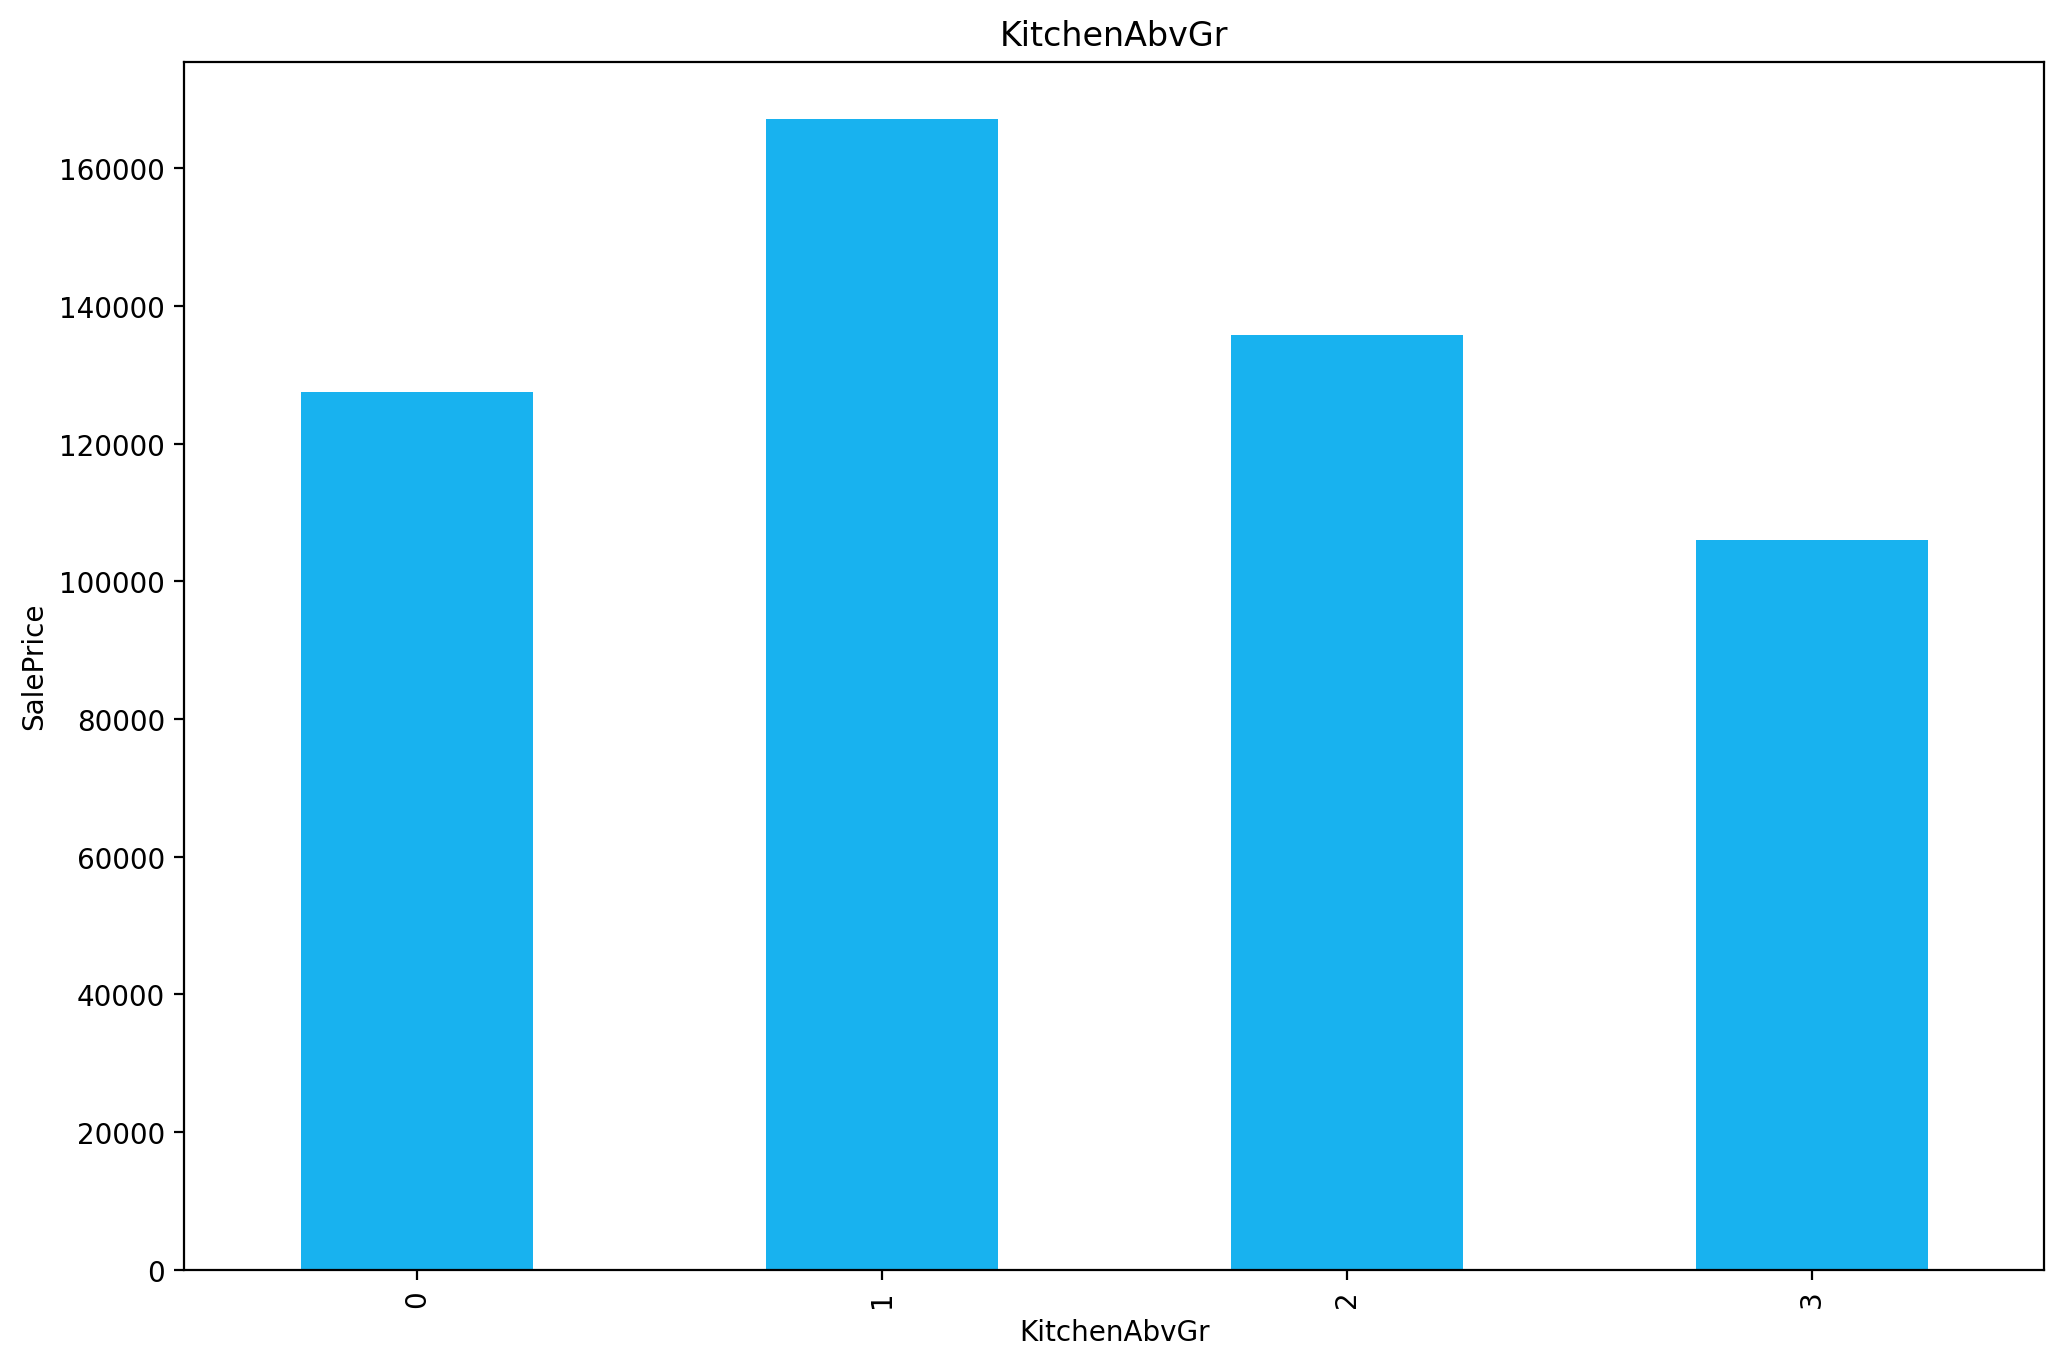

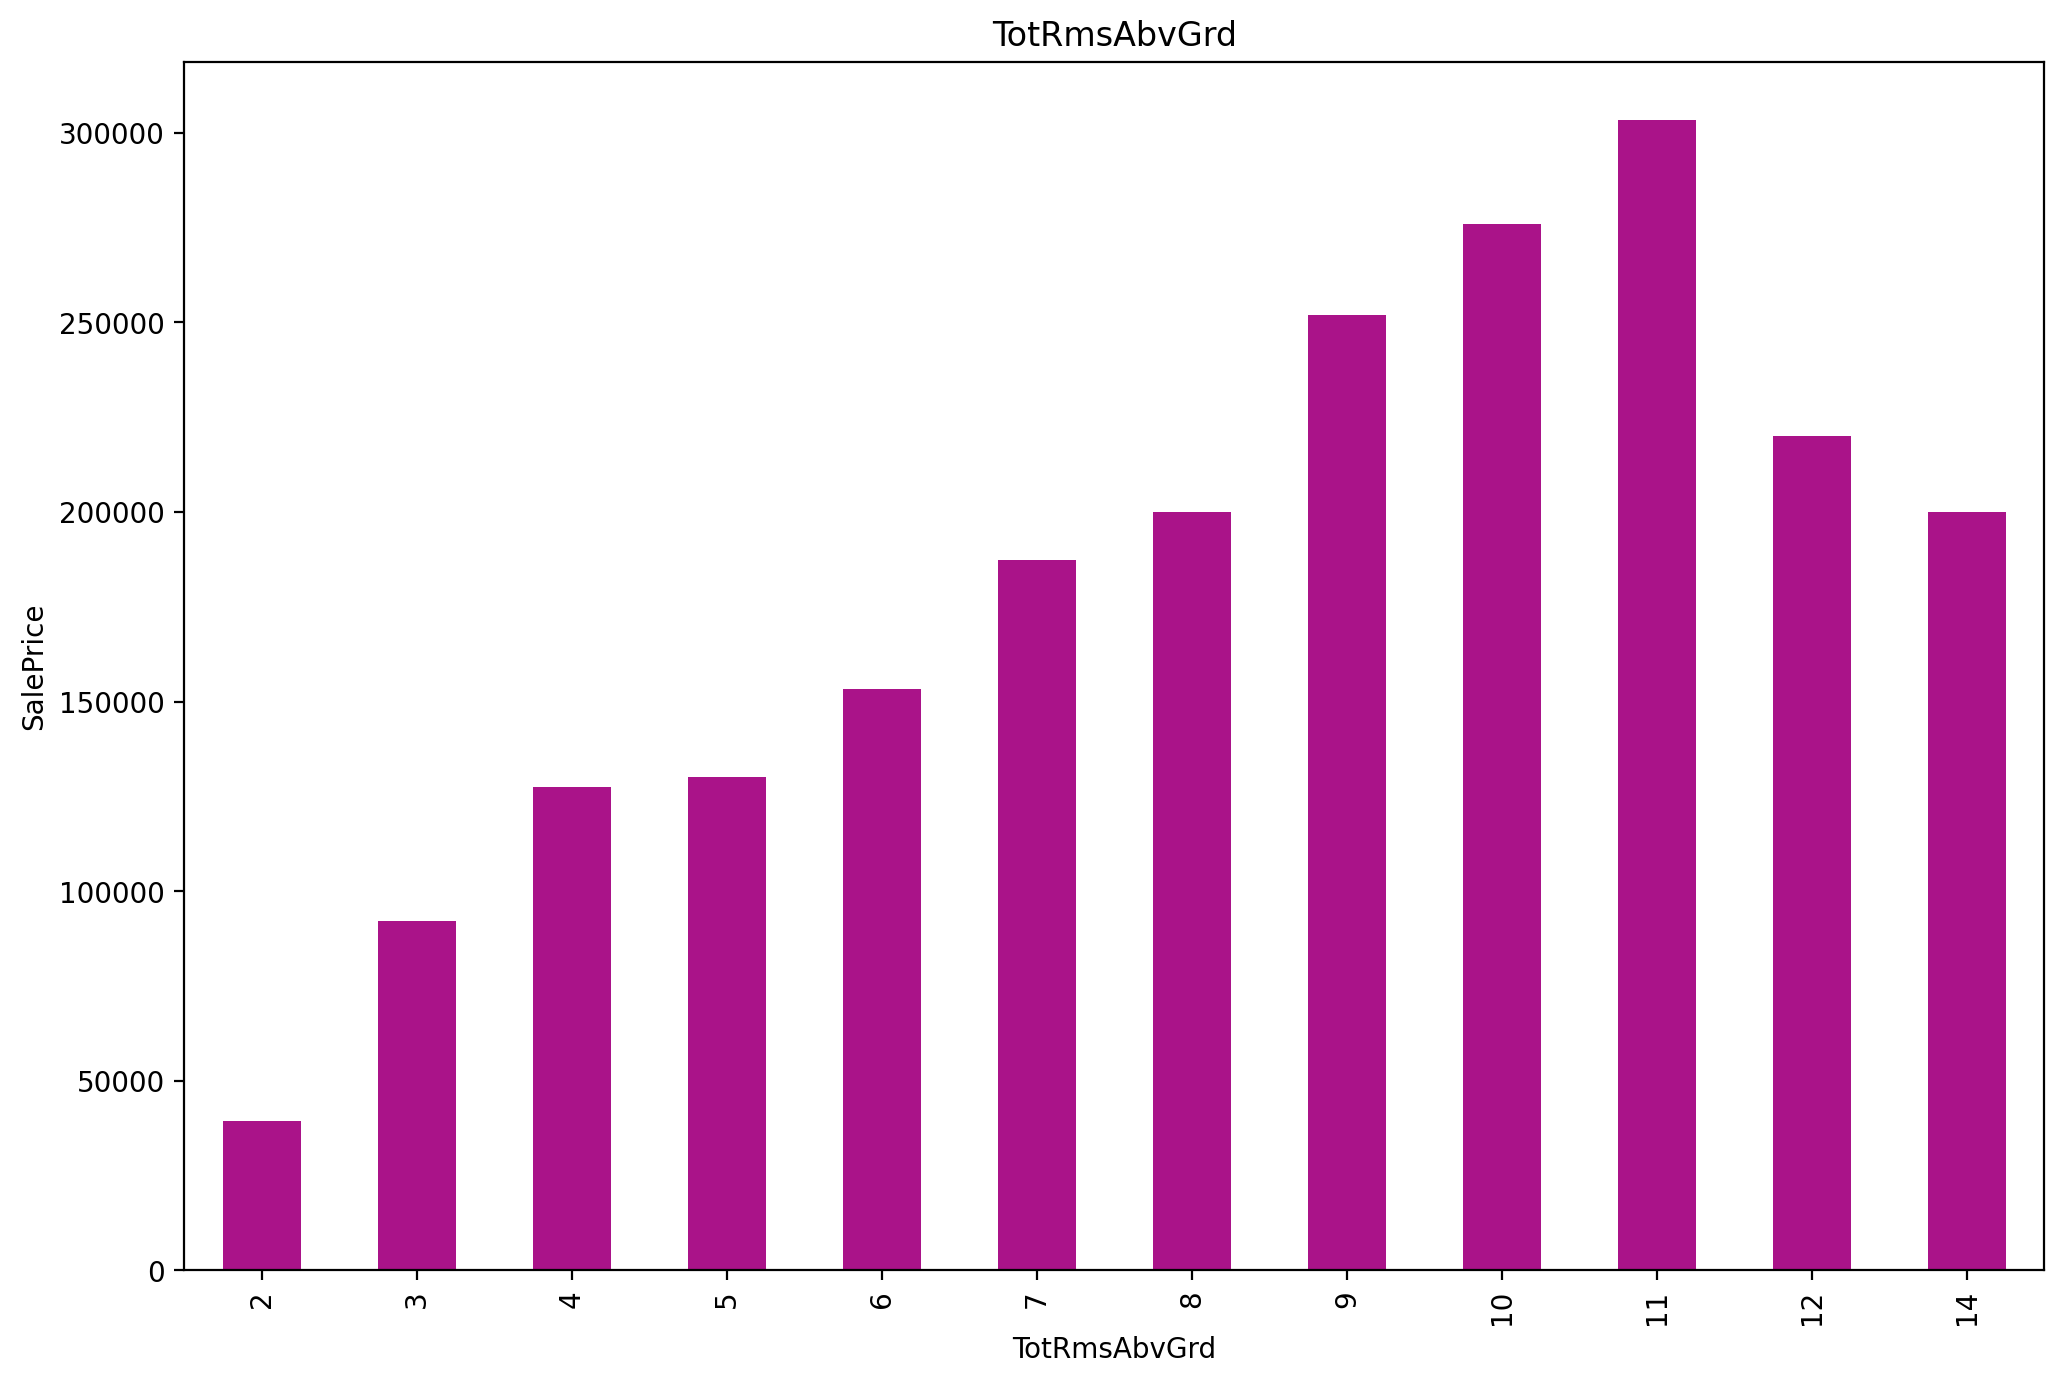

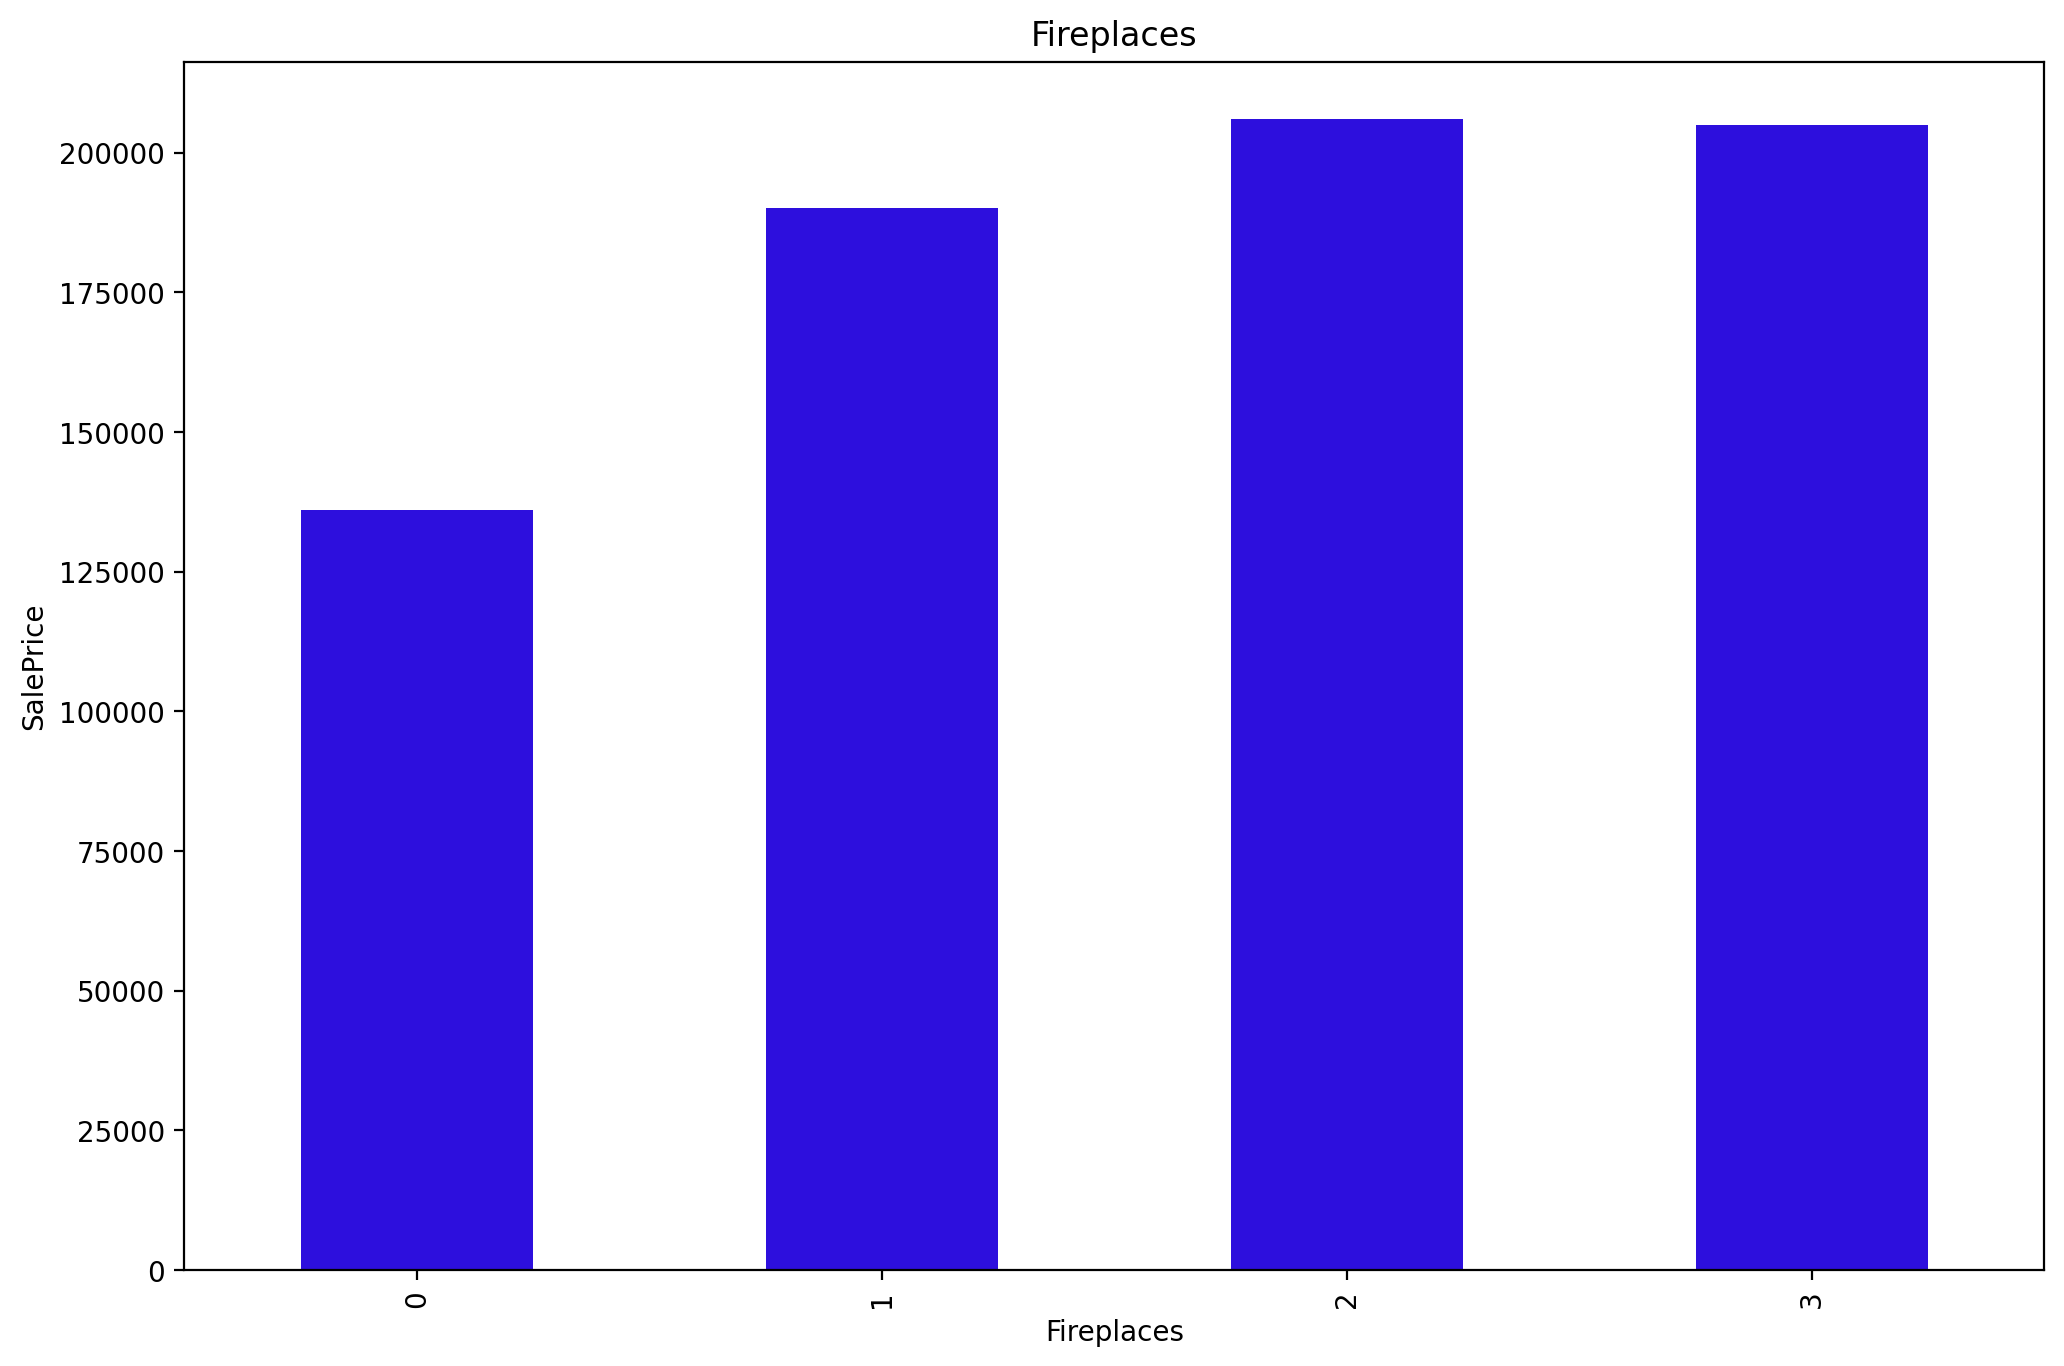

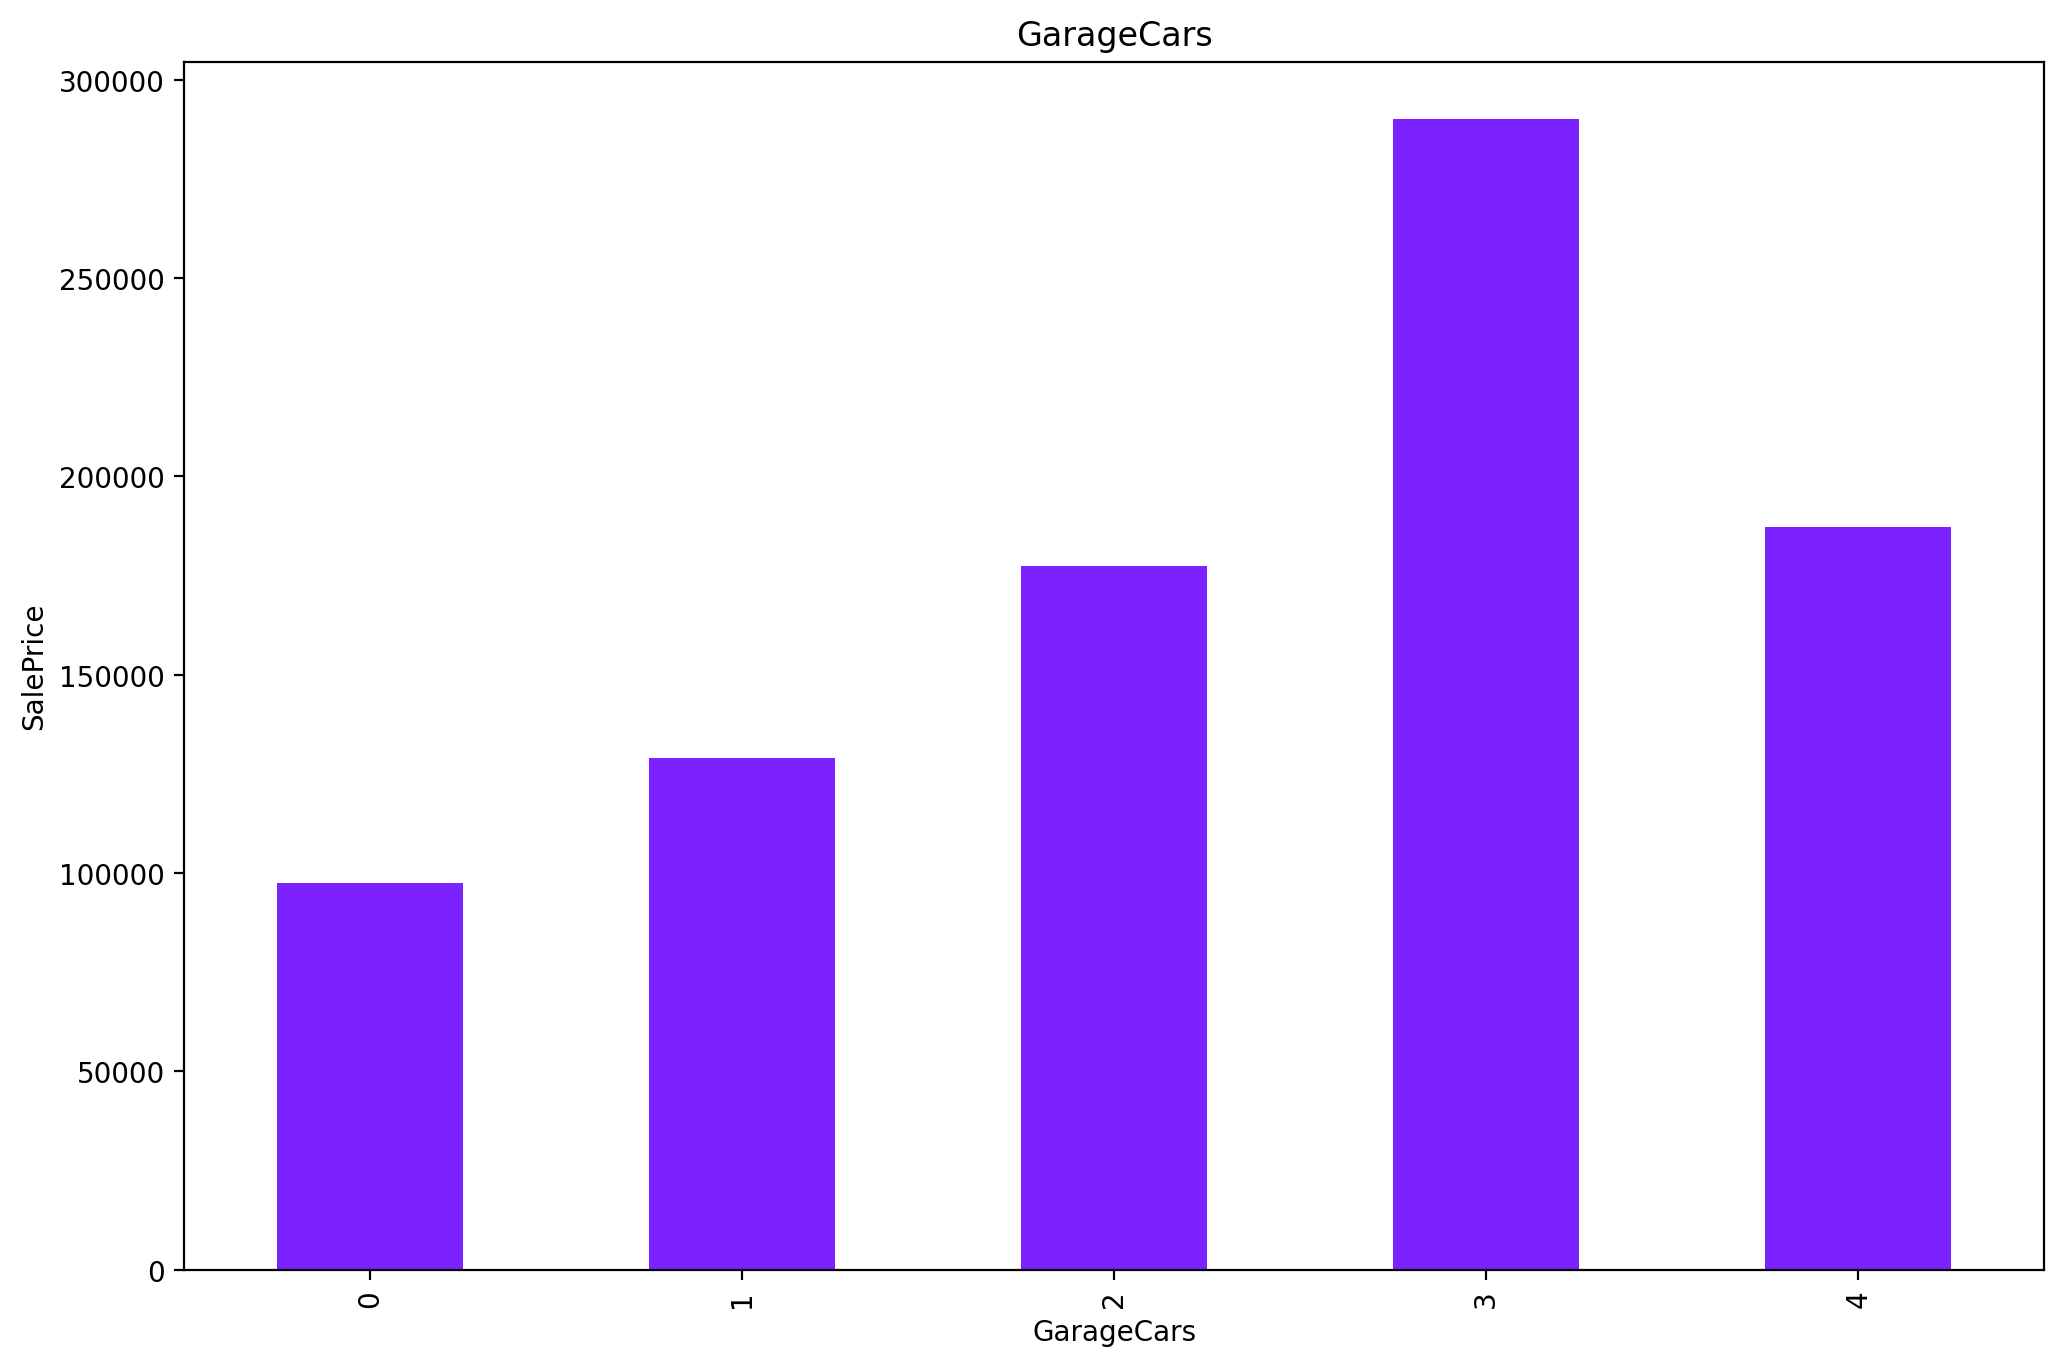

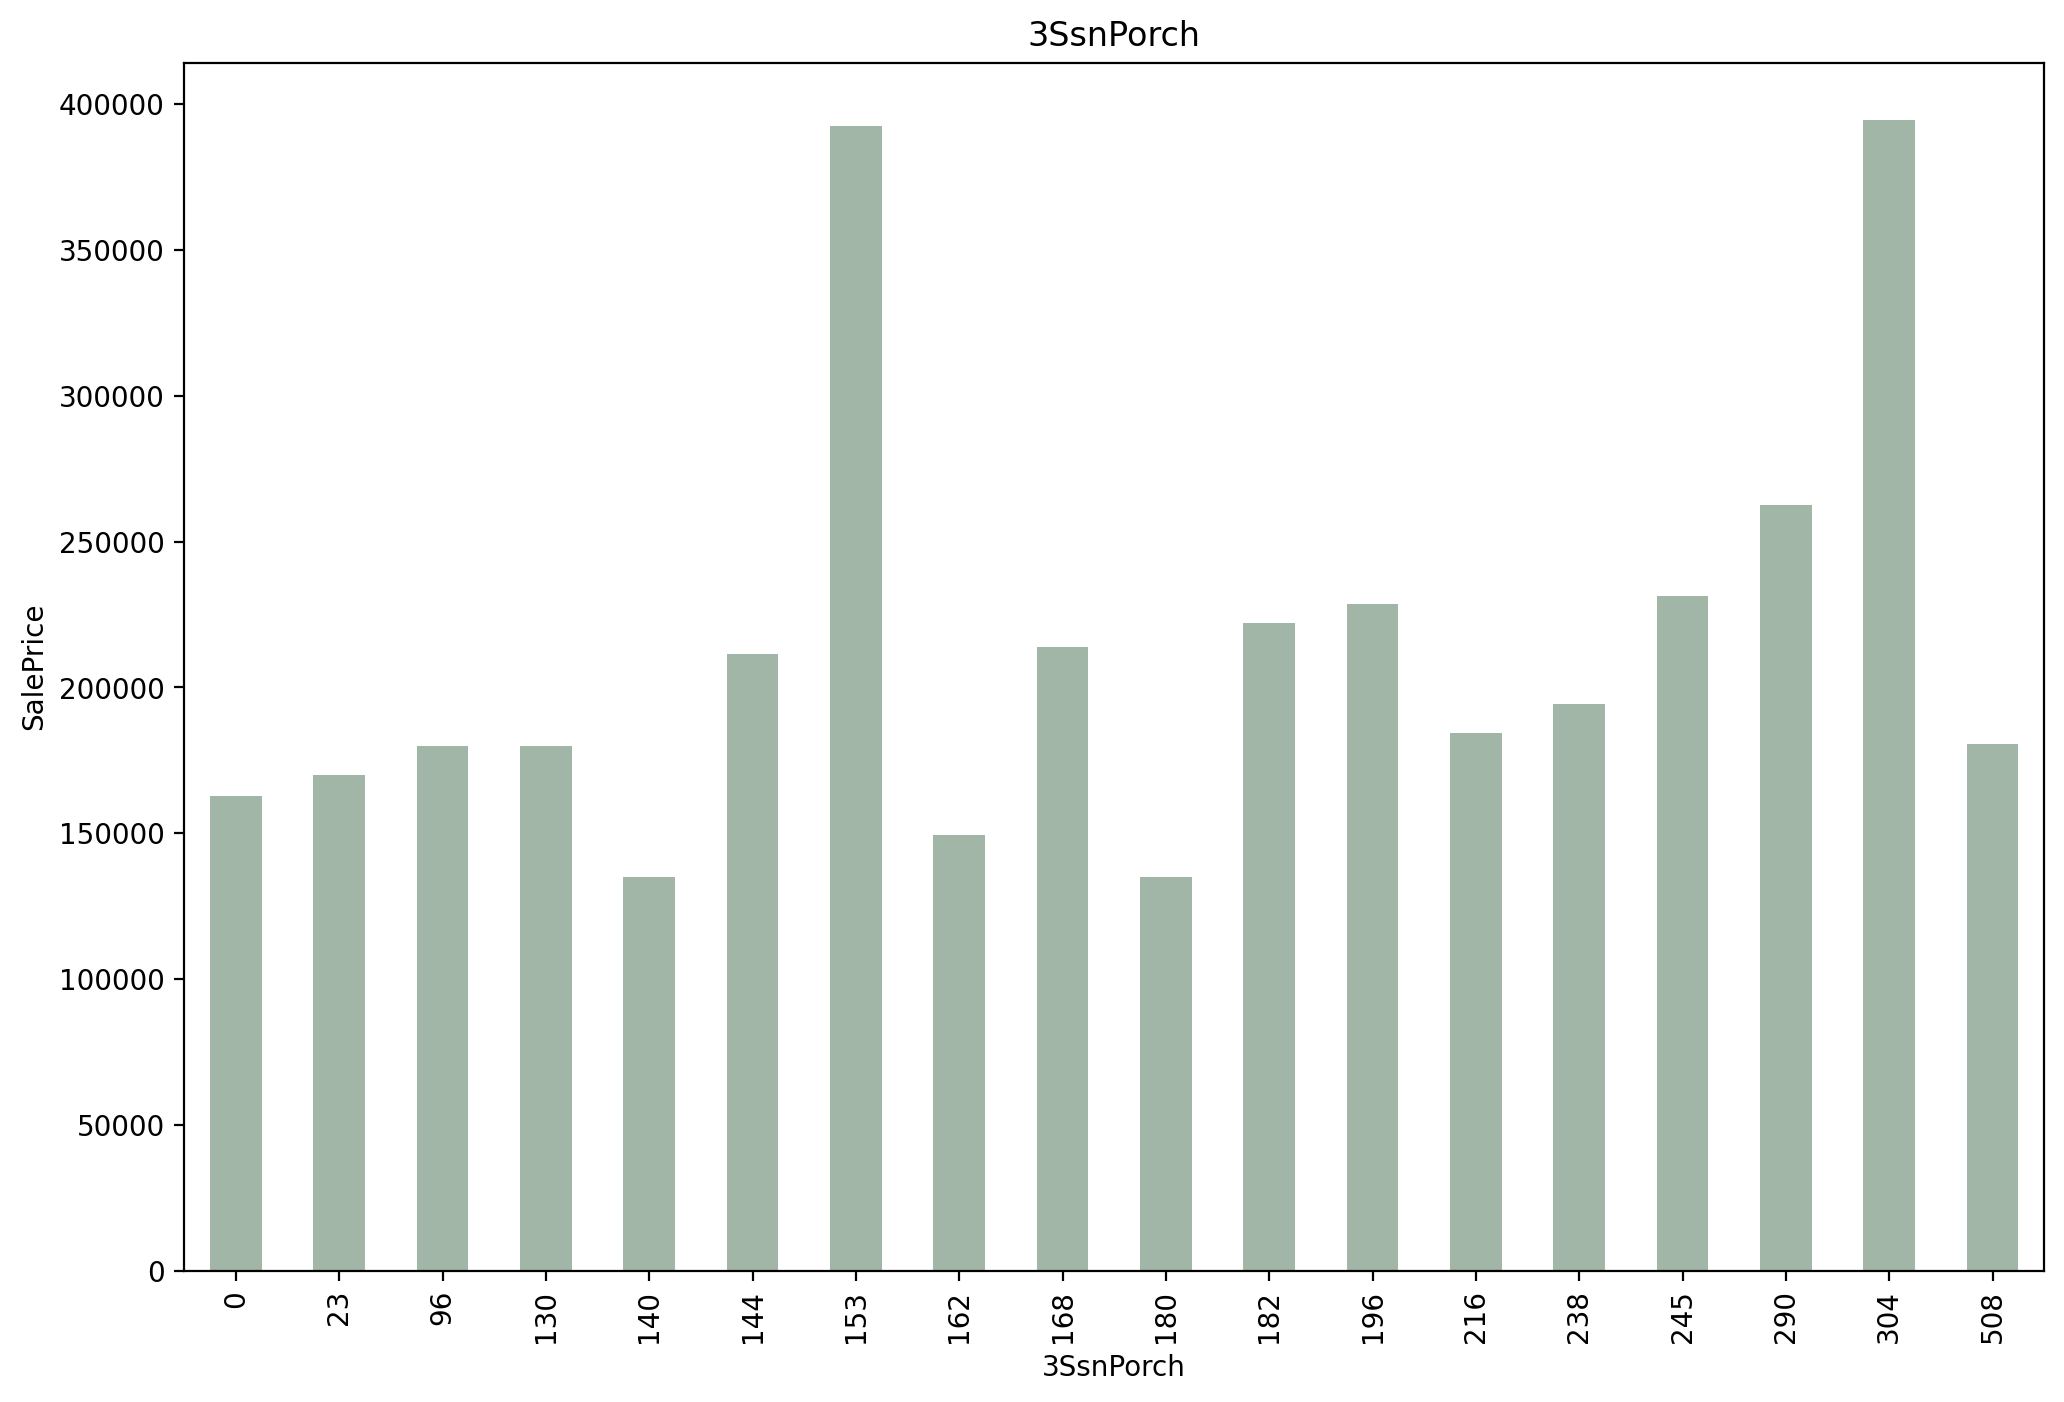

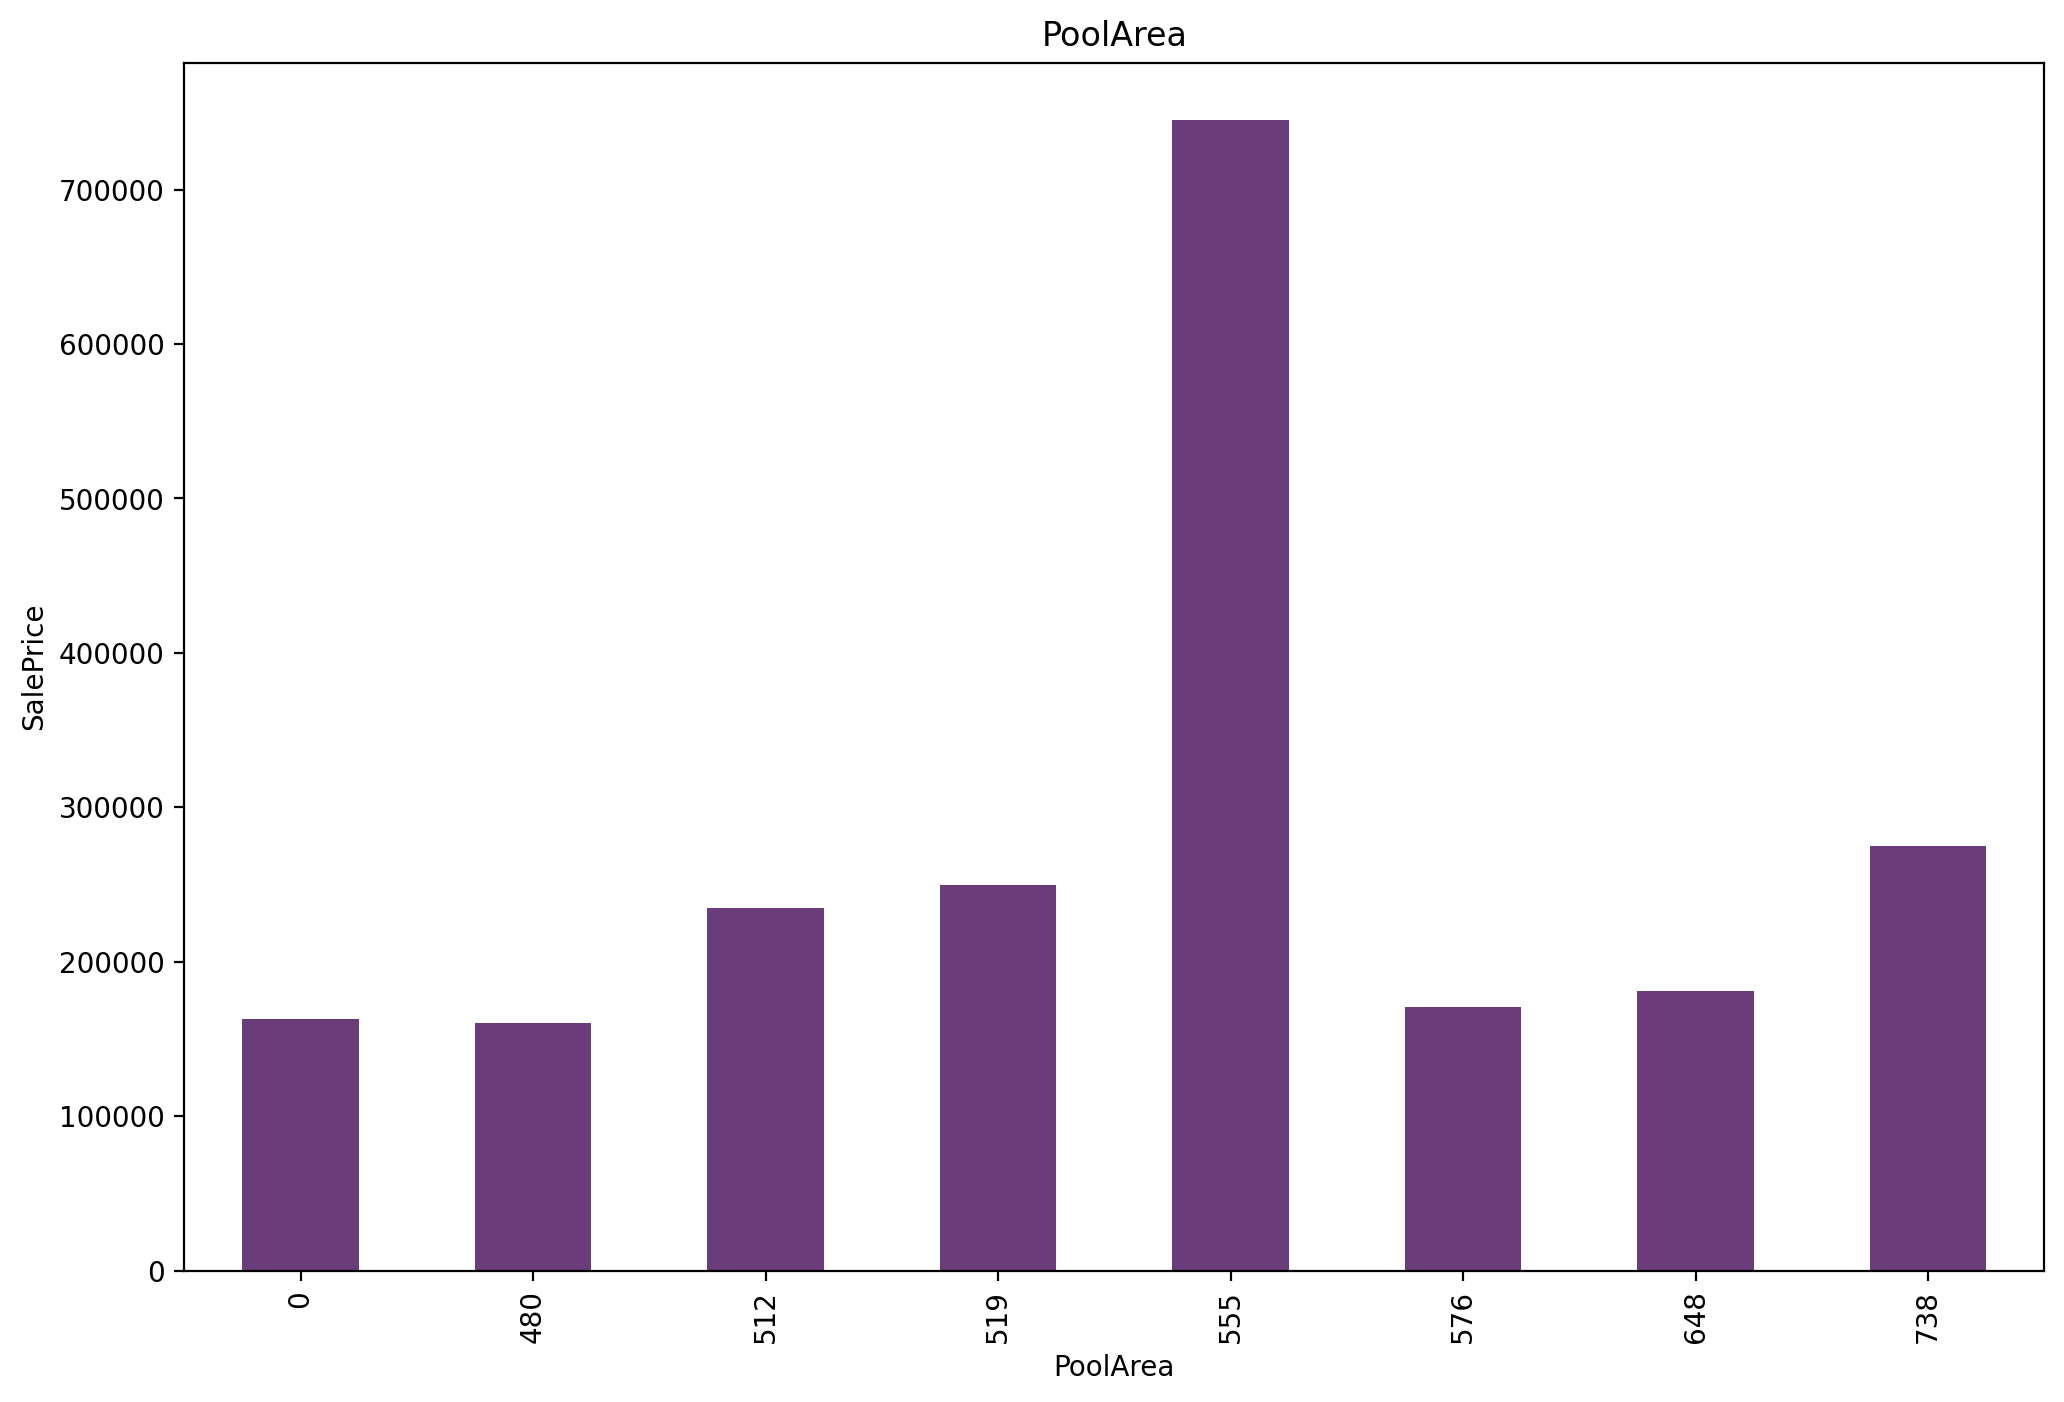

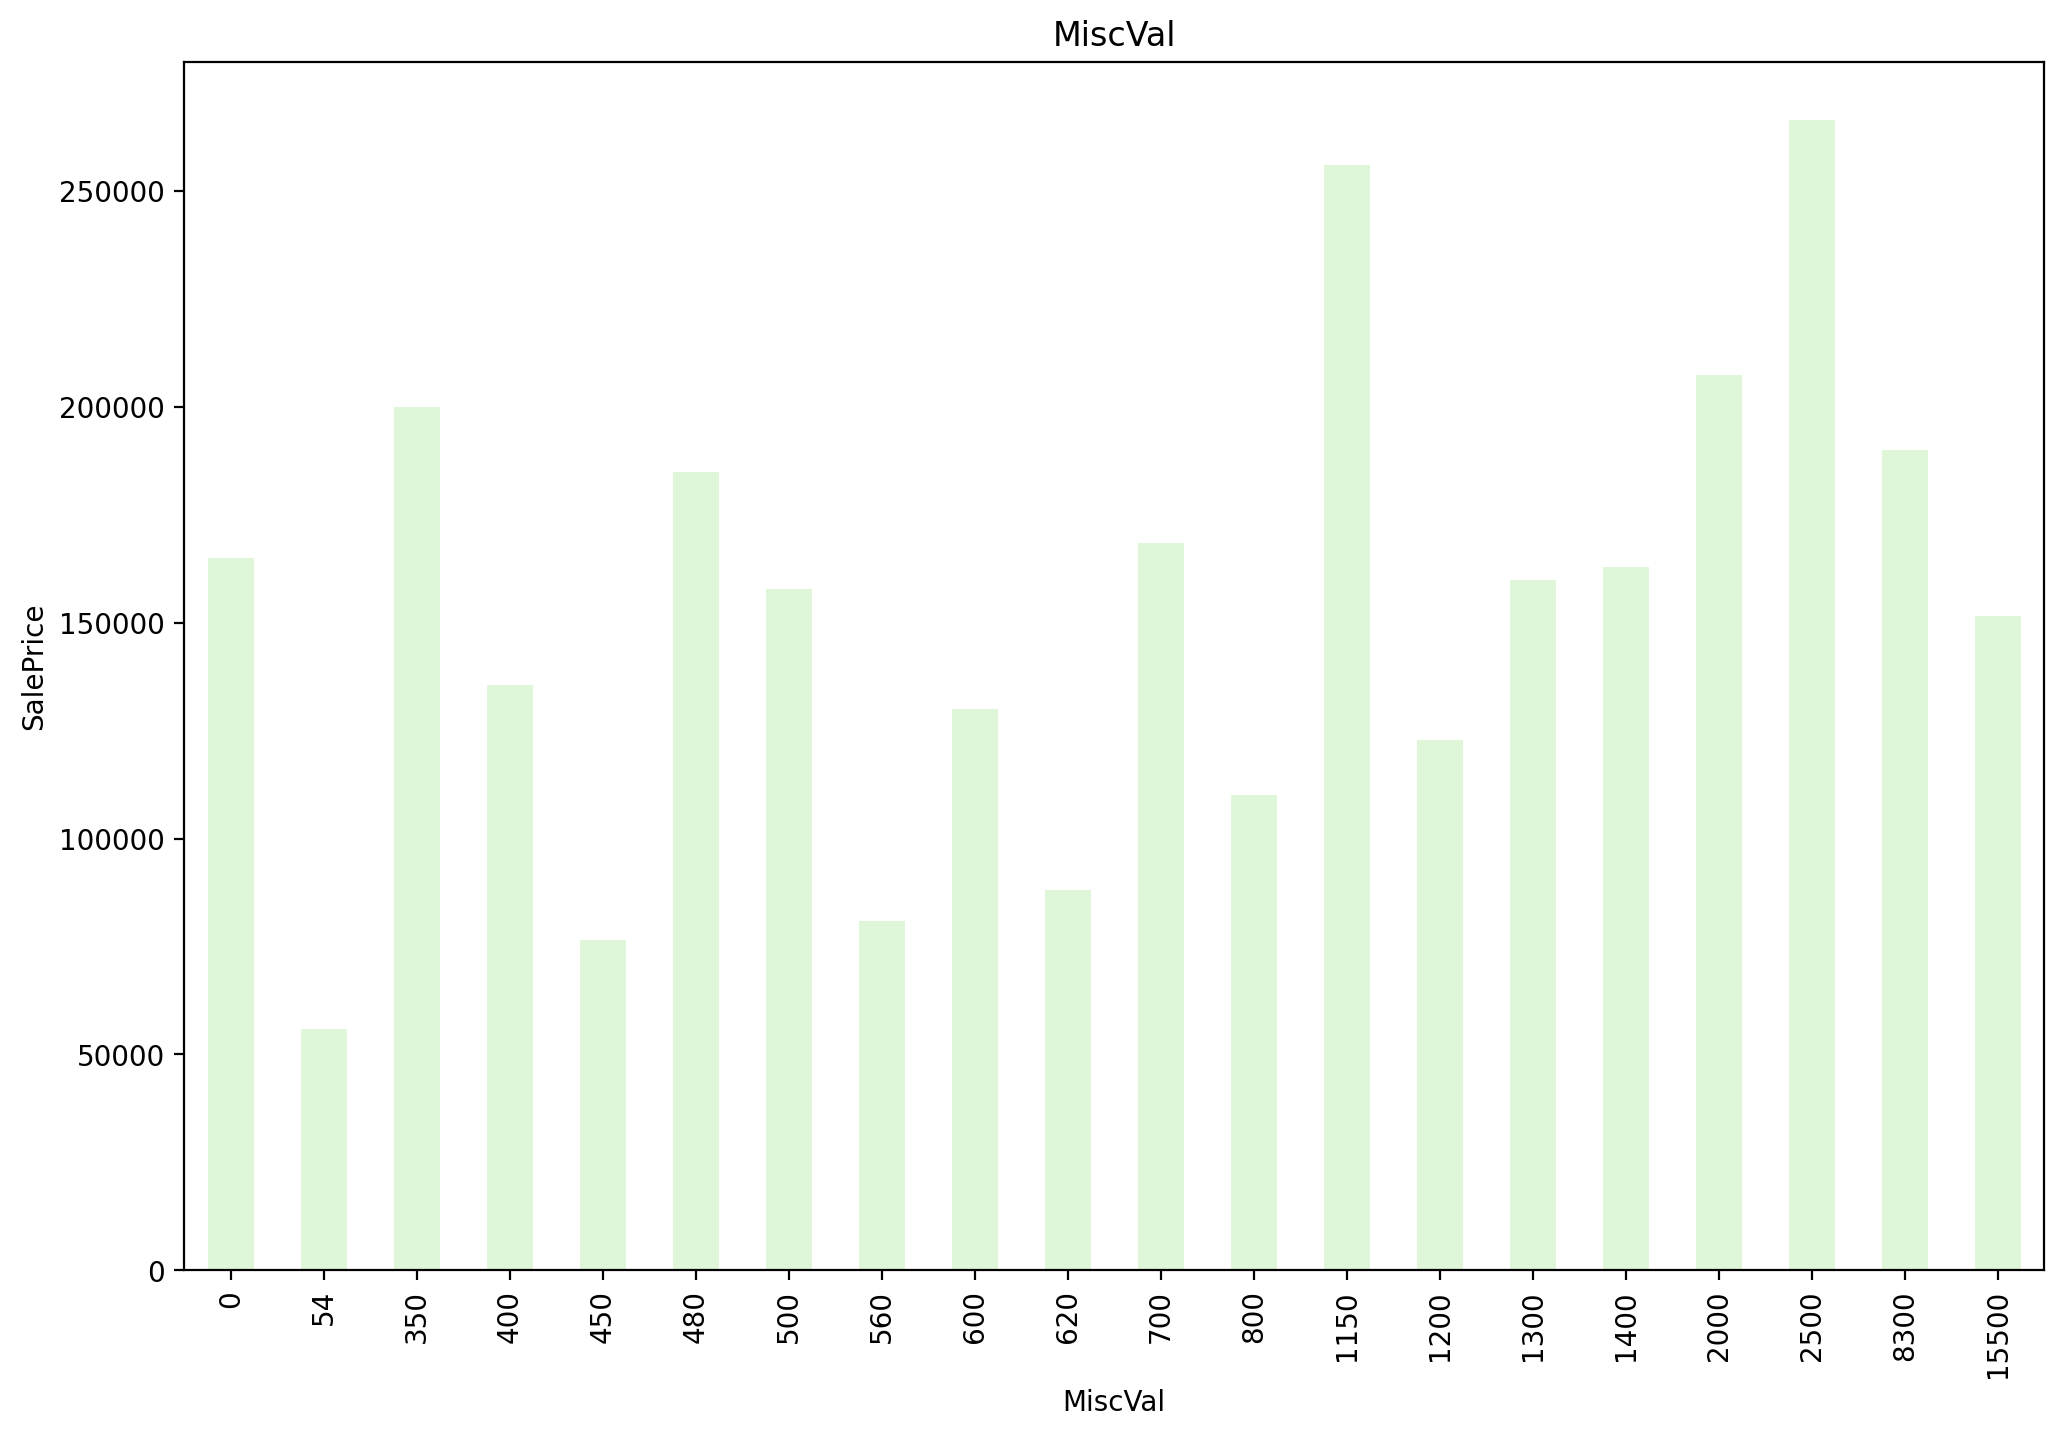

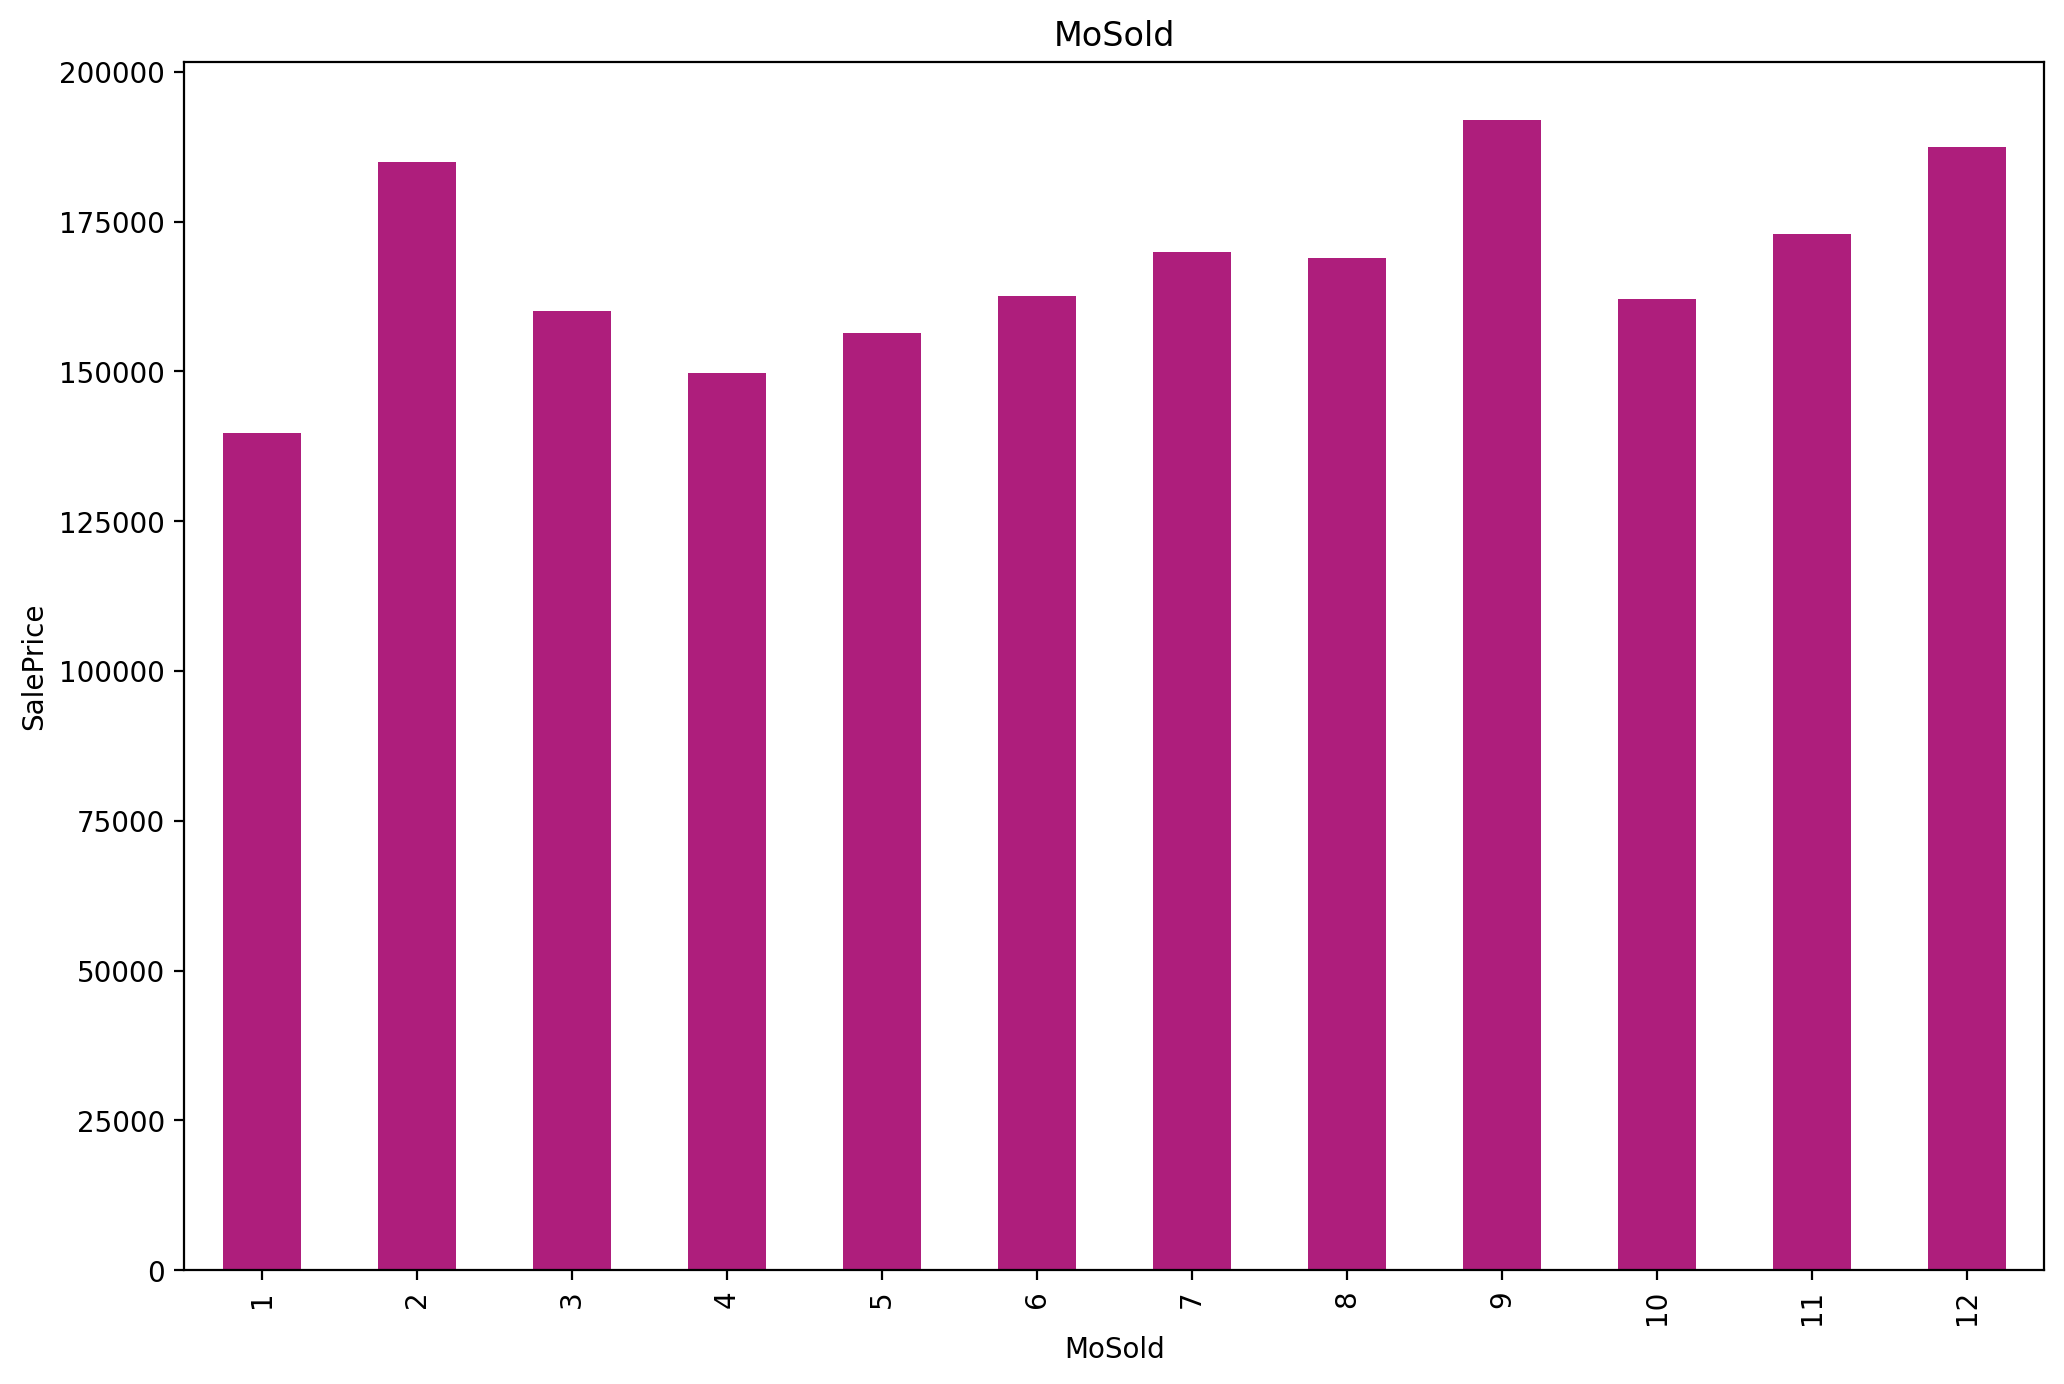

In [44]:
## Lets Find the realtionship between them and Sale PRice
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]

for feature in discrete_feature:
    data=df.copy()
    plt.figure(figsize=(12,8), dpi=200)
    data.groupby(feature)['SalePrice'].median().plot.bar(color=(np.random.random(), np.random.random(), np.random.random()))
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

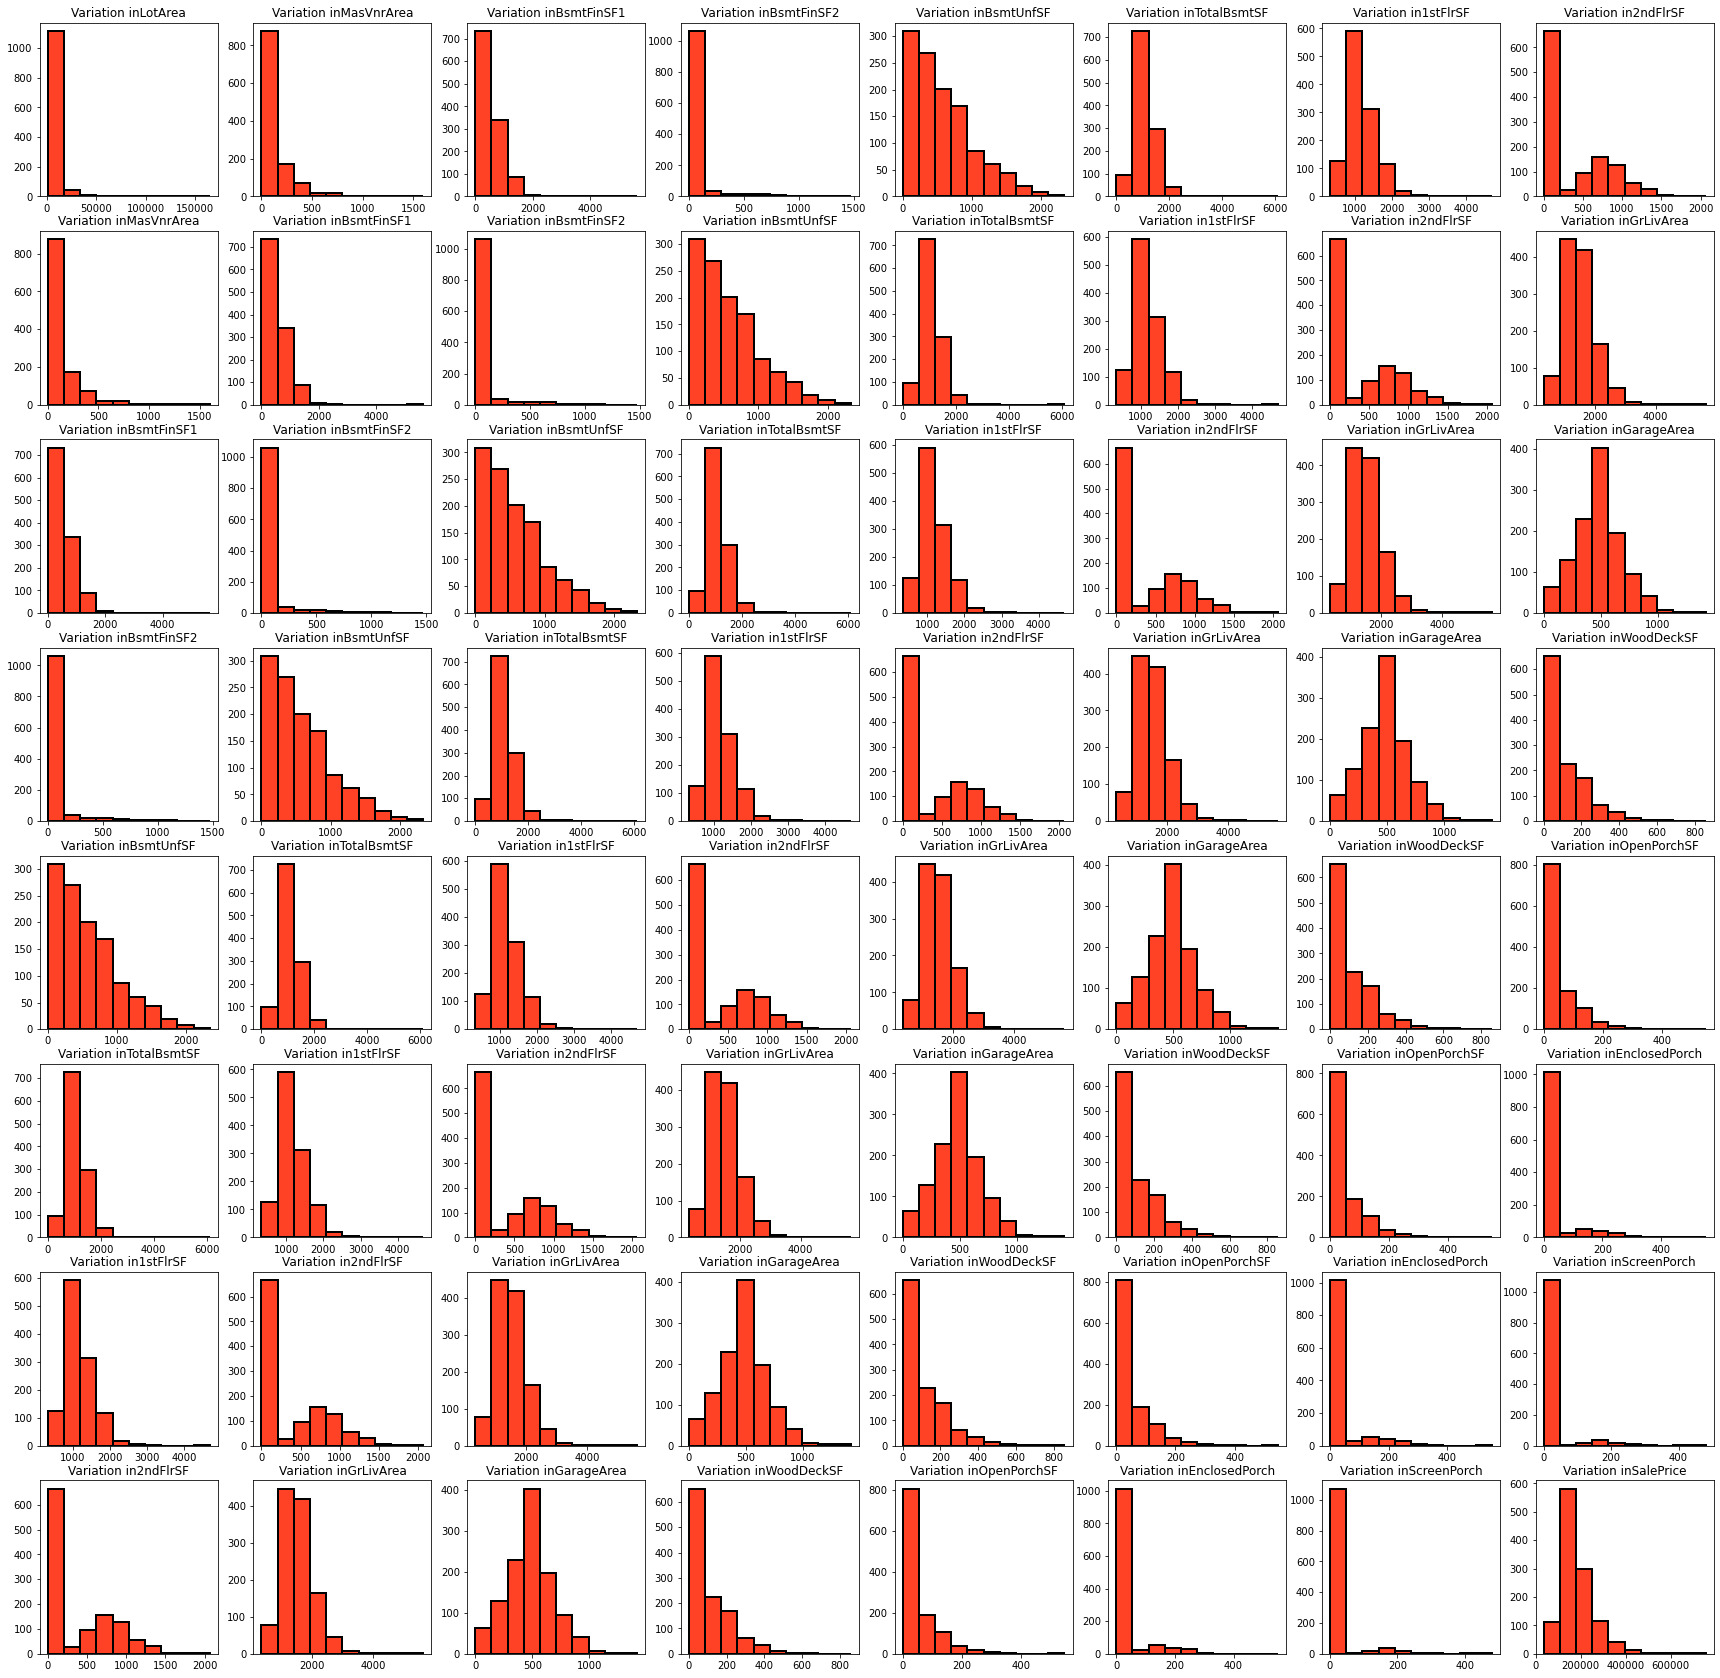

In [45]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + year_feature+['Id']]

fig,axes=plt.subplots(8,8)

## Lets analyse the continuous values by creating histograms to understand the distribution

for i in range (8):
    for j in range (8):
        axes[i,j].hist(x=continuous_feature[i+j],data=df,edgecolor='#000000',linewidth=2,color='#ff4125')
        axes[i,j].set_title('Variation in'+continuous_feature[i+j])
fig=plt.gcf()
fig.set_size_inches(30,30)
# fig.tight_layout()

# There are outlier in data set

MSSubClass          AxesSubplot(0.125,0.772143;0.0824468x0.107857)
LotArea          AxesSubplot(0.223936,0.772143;0.0824468x0.107857)
OverallQual      AxesSubplot(0.322872,0.772143;0.0824468x0.107857)
OverallCond      AxesSubplot(0.421809,0.772143;0.0824468x0.107857)
YearBuilt        AxesSubplot(0.520745,0.772143;0.0824468x0.107857)
YearRemodAdd     AxesSubplot(0.619681,0.772143;0.0824468x0.107857)
MasVnrArea       AxesSubplot(0.718617,0.772143;0.0824468x0.107857)
BsmtFinSF1       AxesSubplot(0.817553,0.772143;0.0824468x0.107857)
BsmtFinSF2          AxesSubplot(0.125,0.642714;0.0824468x0.107857)
BsmtUnfSF        AxesSubplot(0.223936,0.642714;0.0824468x0.107857)
TotalBsmtSF      AxesSubplot(0.322872,0.642714;0.0824468x0.107857)
1stFlrSF         AxesSubplot(0.421809,0.642714;0.0824468x0.107857)
2ndFlrSF         AxesSubplot(0.520745,0.642714;0.0824468x0.107857)
LowQualFinSF     AxesSubplot(0.619681,0.642714;0.0824468x0.107857)
GrLivArea        AxesSubplot(0.718617,0.642714;0.0824468x0.107

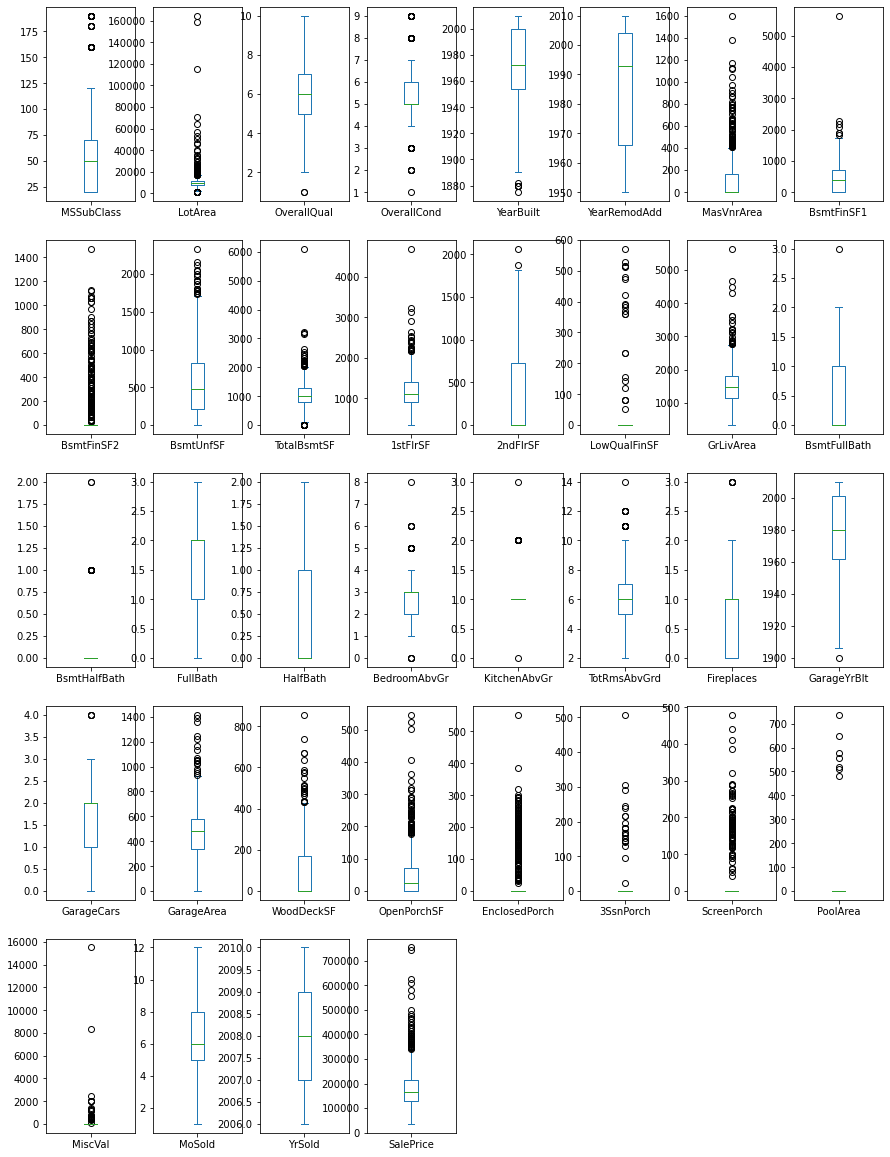

In [46]:
df.plot(kind='box',subplots=True,layout=(6,8),figsize=(15,25))
# plotting individual graph for better understanding of grapha

In [47]:
cols_with_outliers = ['MSSubClass', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

In [48]:
print(cols_with_outliers)

['MSSubClass', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


In [49]:
print(len(cols_with_outliers))

29


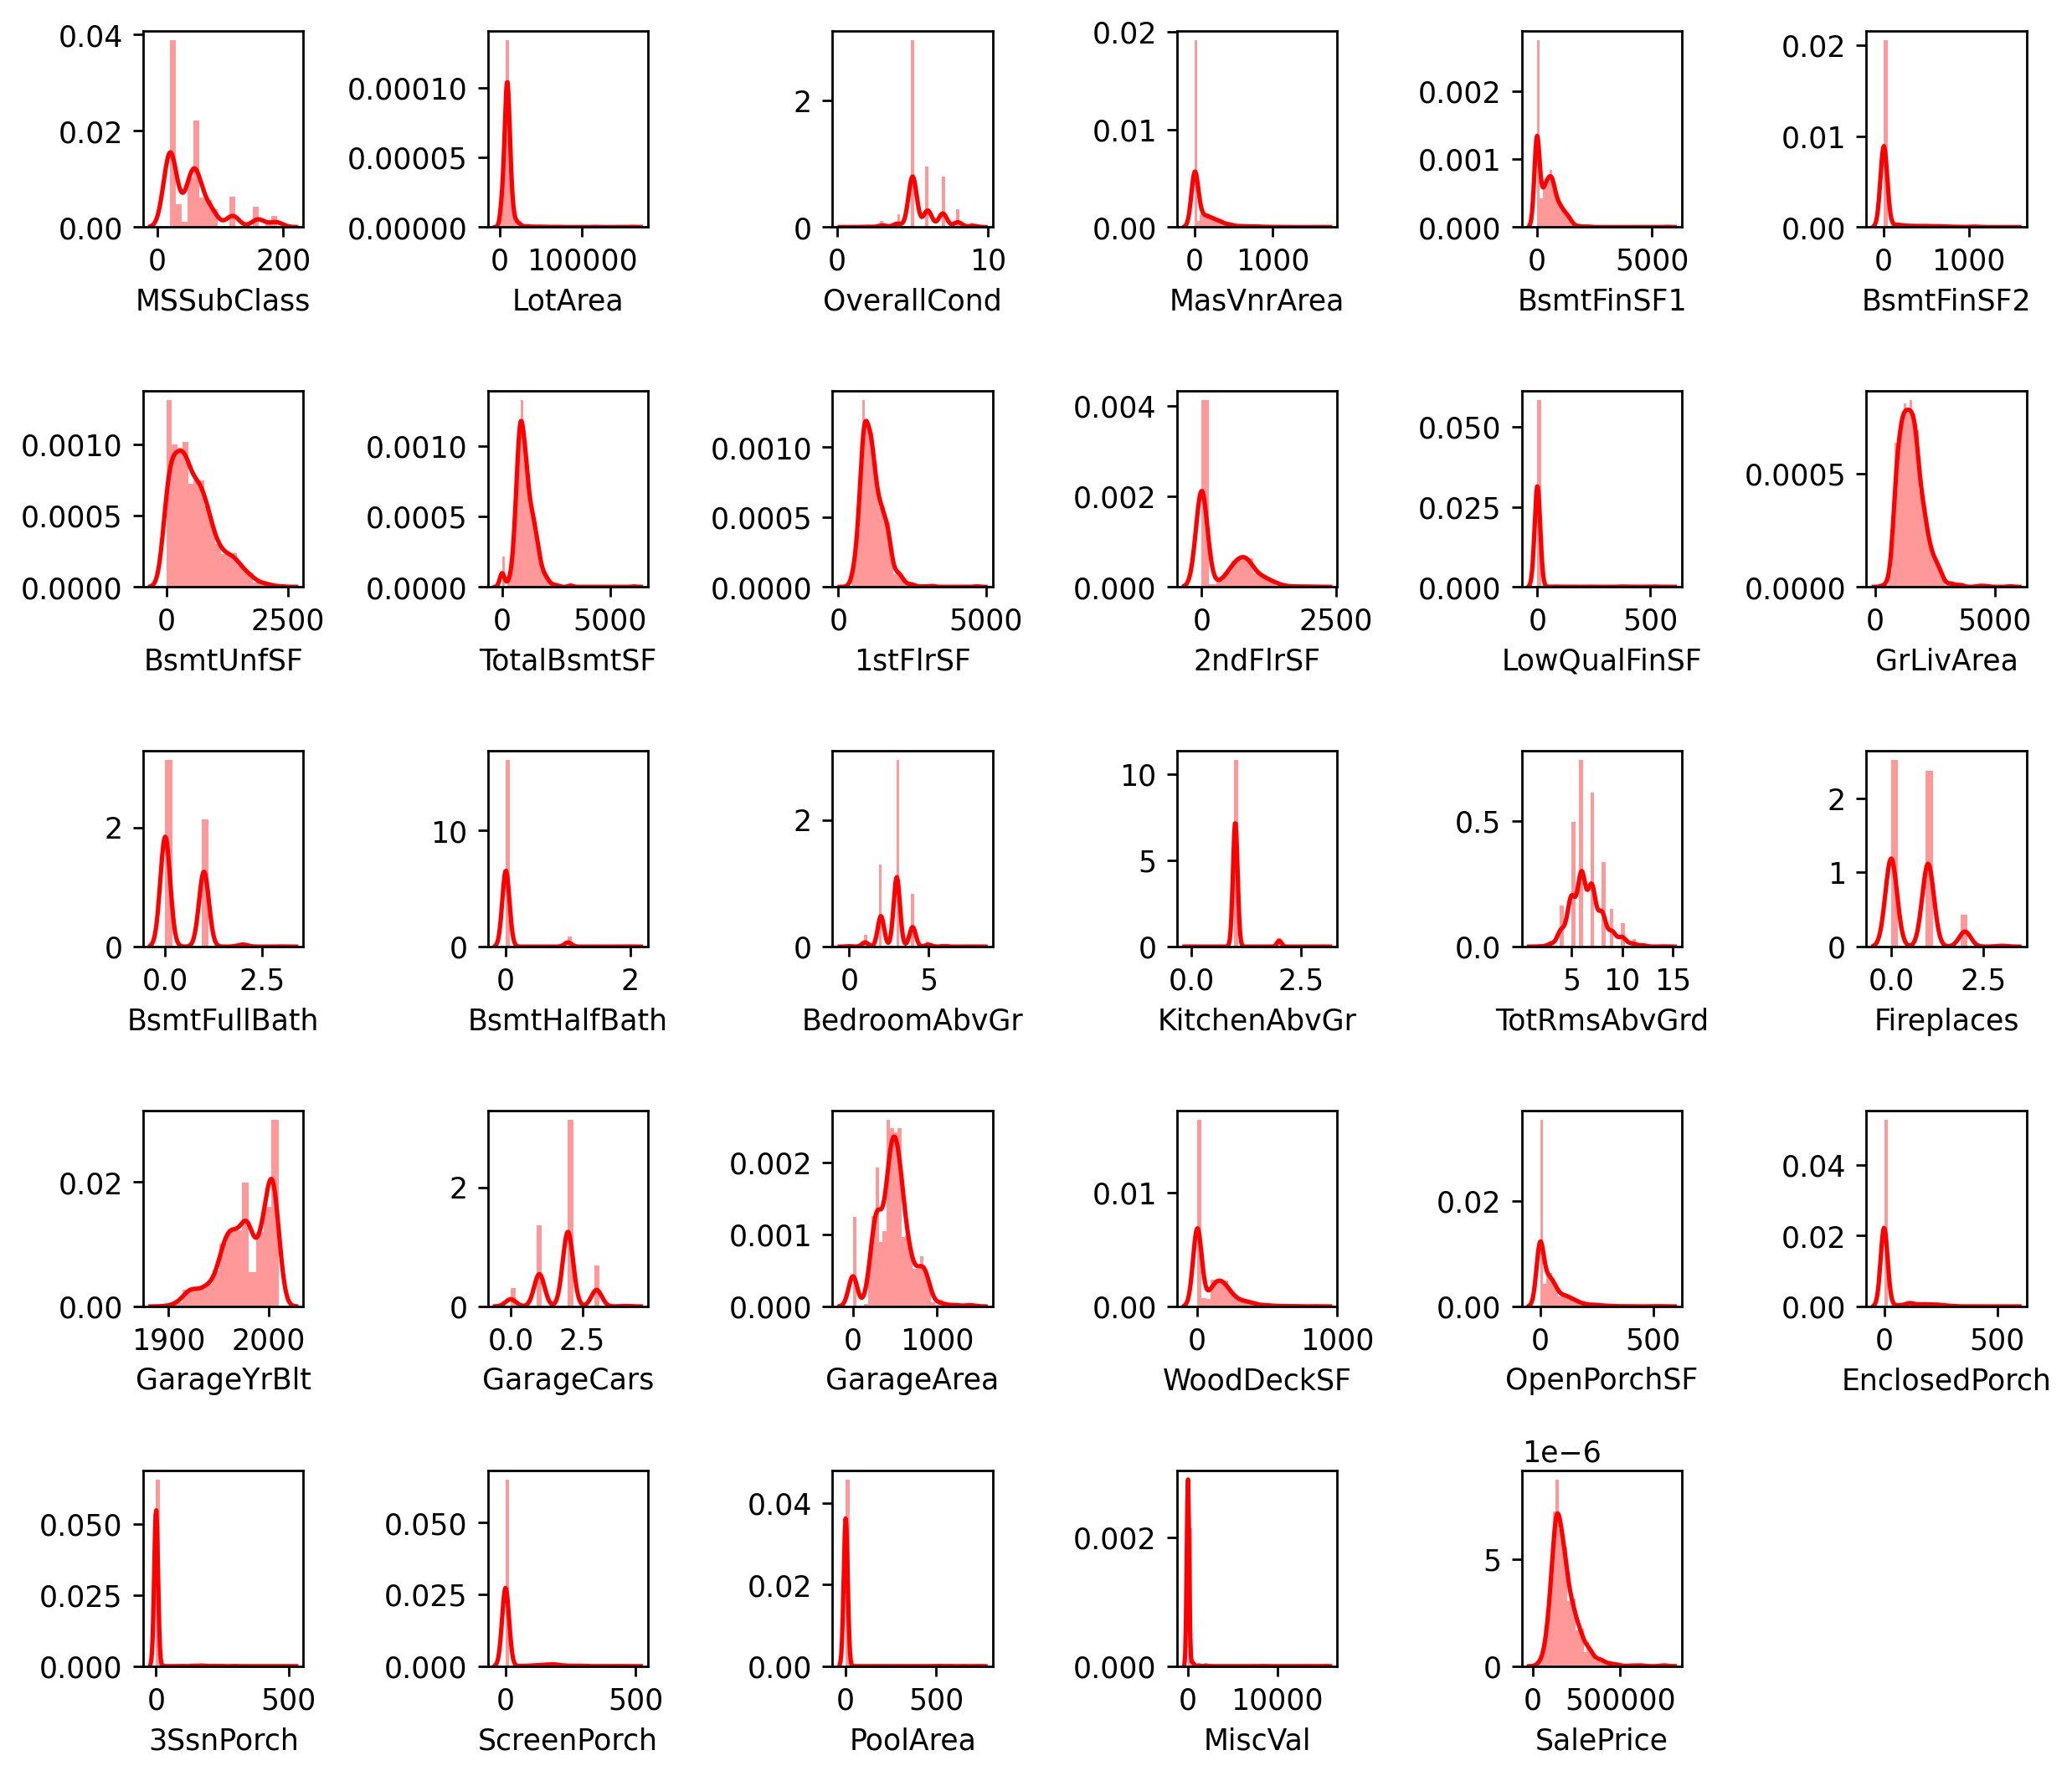

In [50]:
plt.figure(figsize = (10, 10), dpi=250)
for i in range(0, len(cols_with_outliers)):
    plt.subplot(6, 6, i+1)
    sns.distplot(df[cols_with_outliers[i]], color = 'red')
    plt.ylabel('')

# plt.suptitle('Outliers Before Cleansing', y = 0.1)
plt.tight_layout(pad = 1.5)
plt.show()

In [51]:
for feature in cols_with_outliers:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    upper_bond = df[feature].quantile(0.75) + (IQR * 1.5)
    lower_bond = df[feature].quantile(0.25) - (IQR * 1.5)
    
    df[feature] = np.where(df[feature]>upper_bond,upper_bond,df[feature])
    df[feature] = np.where(df[feature]<lower_bond,lower_bond,df[feature])

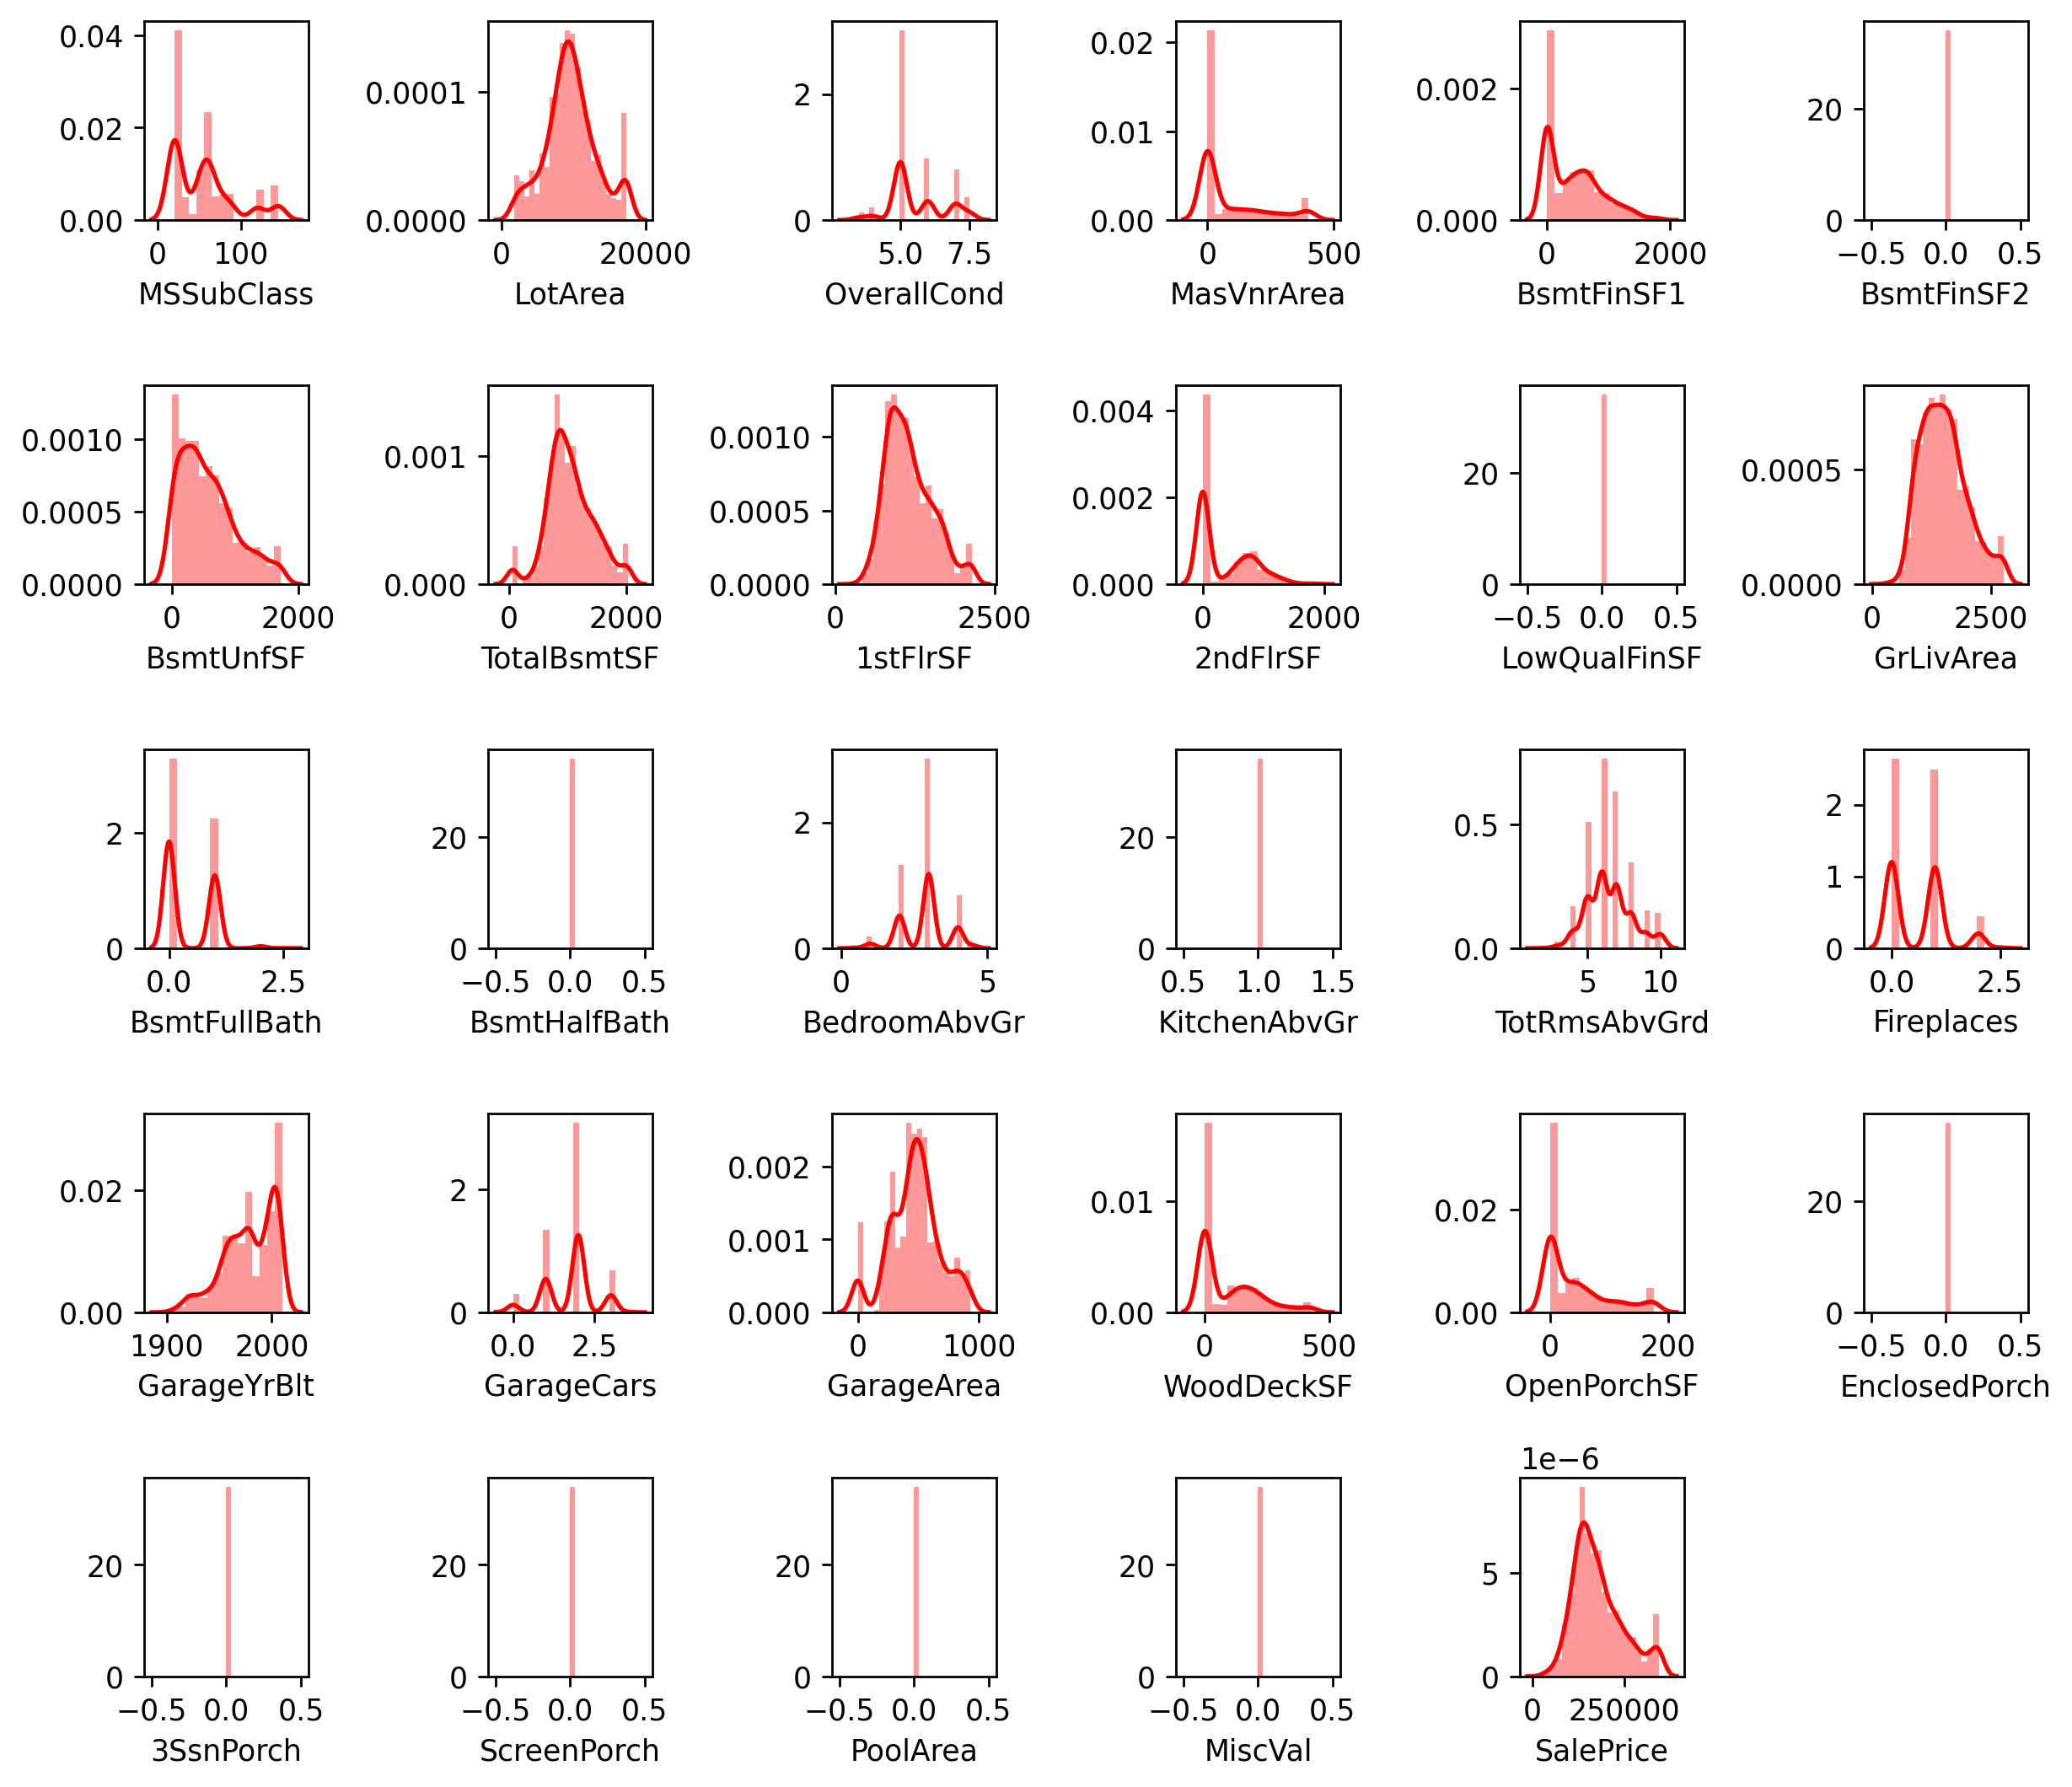

In [52]:
plt.figure(figsize = (10, 10), dpi=250)
for i in range(0, len(cols_with_outliers)):
    plt.subplot(6, 6, i+1)
    sns.distplot(df[cols_with_outliers[i]], color = 'red')
    plt.ylabel('')

# plt.suptitle('Outliers Before Cleansing', y = 0.1)
plt.tight_layout(pad = 1.5)
plt.show()

MSSubClass          AxesSubplot(0.125,0.772143;0.0824468x0.107857)
LotArea          AxesSubplot(0.223936,0.772143;0.0824468x0.107857)
OverallQual      AxesSubplot(0.322872,0.772143;0.0824468x0.107857)
OverallCond      AxesSubplot(0.421809,0.772143;0.0824468x0.107857)
YearBuilt        AxesSubplot(0.520745,0.772143;0.0824468x0.107857)
YearRemodAdd     AxesSubplot(0.619681,0.772143;0.0824468x0.107857)
MasVnrArea       AxesSubplot(0.718617,0.772143;0.0824468x0.107857)
BsmtFinSF1       AxesSubplot(0.817553,0.772143;0.0824468x0.107857)
BsmtFinSF2          AxesSubplot(0.125,0.642714;0.0824468x0.107857)
BsmtUnfSF        AxesSubplot(0.223936,0.642714;0.0824468x0.107857)
TotalBsmtSF      AxesSubplot(0.322872,0.642714;0.0824468x0.107857)
1stFlrSF         AxesSubplot(0.421809,0.642714;0.0824468x0.107857)
2ndFlrSF         AxesSubplot(0.520745,0.642714;0.0824468x0.107857)
LowQualFinSF     AxesSubplot(0.619681,0.642714;0.0824468x0.107857)
GrLivArea        AxesSubplot(0.718617,0.642714;0.0824468x0.107

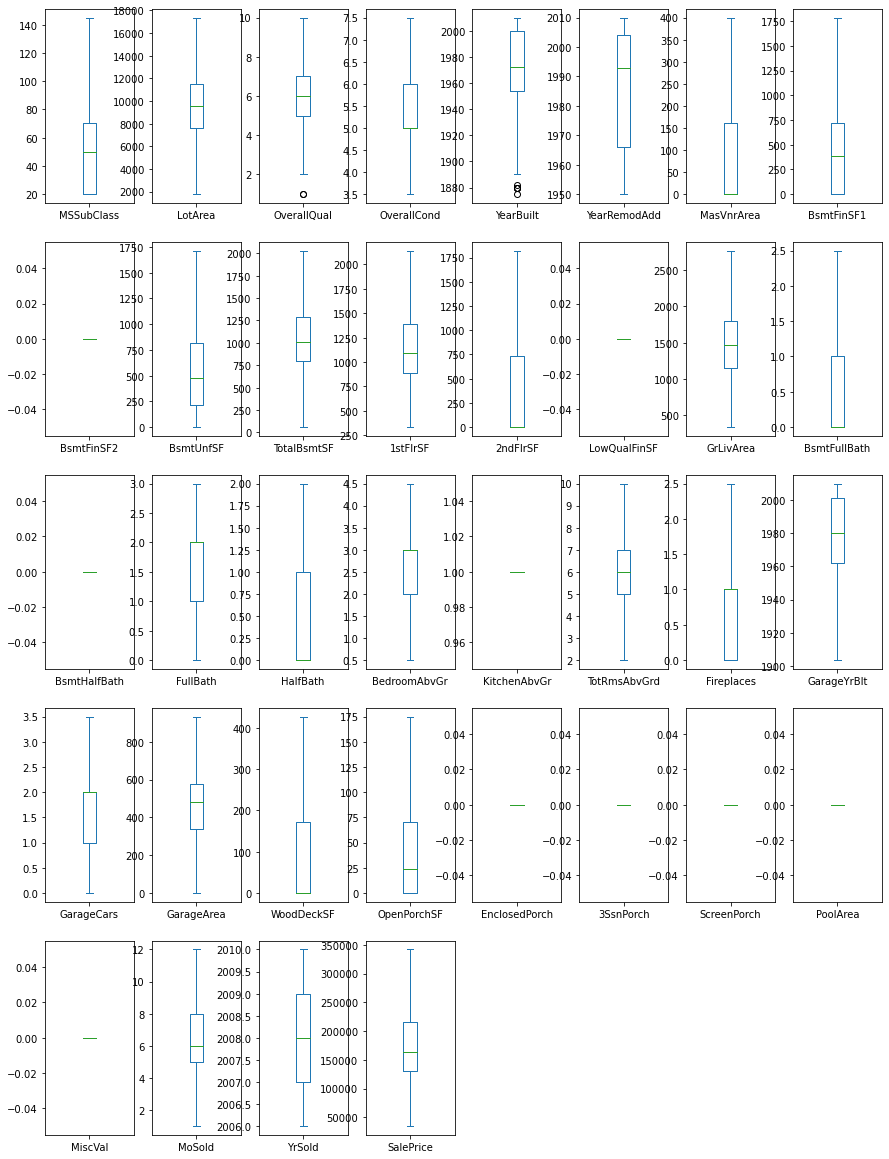

In [53]:
df.plot(kind='box',subplots=True,layout=(6,8),figsize=(15,25))
# plotting individual graph for better understanding of grapha

### Observation - 
There are no outliers in data set.

In [54]:
df.shape

(1168, 74)

<AxesSubplot:>

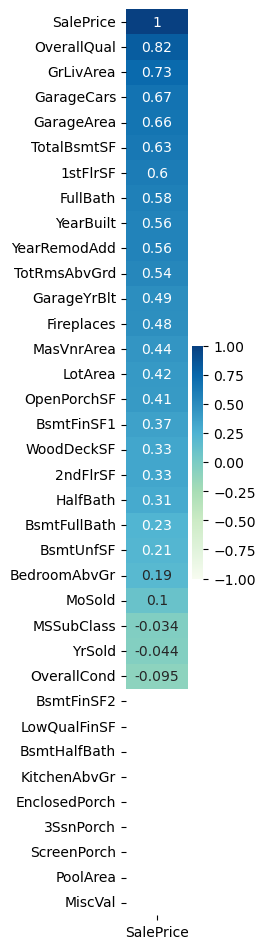

In [55]:
plt.figure(figsize=(1,12), dpi=100)
sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice',ascending= False ), vmin=-1,vmax=1,annot= True ,cmap='GnBu')

In [56]:
df.skew().sort_values()

GarageYrBlt     -0.672350
YearBuilt       -0.579204
YearRemodAdd    -0.495864
GarageCars      -0.407821
BedroomAbvGr    -0.245803
GarageArea      -0.107166
EnclosedPorch    0.000000
ScreenPorch      0.000000
KitchenAbvGr     0.000000
BsmtFinSF2       0.000000
MiscVal          0.000000
BsmtHalfBath     0.000000
PoolArea         0.000000
LowQualFinSF     0.000000
3SsnPorch        0.000000
FullBath         0.057809
YrSold           0.115765
OverallQual      0.175082
LotArea          0.184194
MoSold           0.220979
TotalBsmtSF      0.243671
TotRmsAbvGrd     0.373806
OverallCond      0.519895
BsmtFullBath     0.586778
GrLivArea        0.587651
Fireplaces       0.593950
HalfBath         0.656492
1stFlrSF         0.663710
BsmtFinSF1       0.742226
SalePrice        0.786602
BsmtUnfSF        0.789228
2ndFlrSF         0.808038
MSSubClass       1.016094
WoodDeckSF       1.060148
OpenPorchSF      1.154030
MasVnrArea       1.294984
dtype: float64

In [57]:
#removal of skew-ness using log function
for col in numerical_features:
    if df.skew().loc[col]>0.3:
        df[col]=np.log1p(df[col])

In [58]:
df.skew().sort_values()

BsmtUnfSF       -2.136129
GarageYrBlt     -0.672350
BsmtFinSF1      -0.608866
YearBuilt       -0.579204
YearRemodAdd    -0.495864
GarageCars      -0.407821
BedroomAbvGr    -0.245803
SalePrice       -0.235648
TotRmsAbvGrd    -0.211276
GrLivArea       -0.195376
GarageArea      -0.107166
1stFlrSF        -0.062853
OpenPorchSF     -0.029938
3SsnPorch        0.000000
KitchenAbvGr     0.000000
LowQualFinSF     0.000000
BsmtHalfBath     0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
BsmtFinSF2       0.000000
EnclosedPorch    0.000000
FullBath         0.057809
YrSold           0.115765
MSSubClass       0.126423
WoodDeckSF       0.126481
Fireplaces       0.171012
OverallQual      0.175082
LotArea          0.184194
OverallCond      0.194029
MoSold           0.220979
TotalBsmtSF      0.243671
2ndFlrSF         0.289262
BsmtFullBath     0.424538
MasVnrArea       0.493855
HalfBath         0.543681
dtype: float64

<AxesSubplot:>

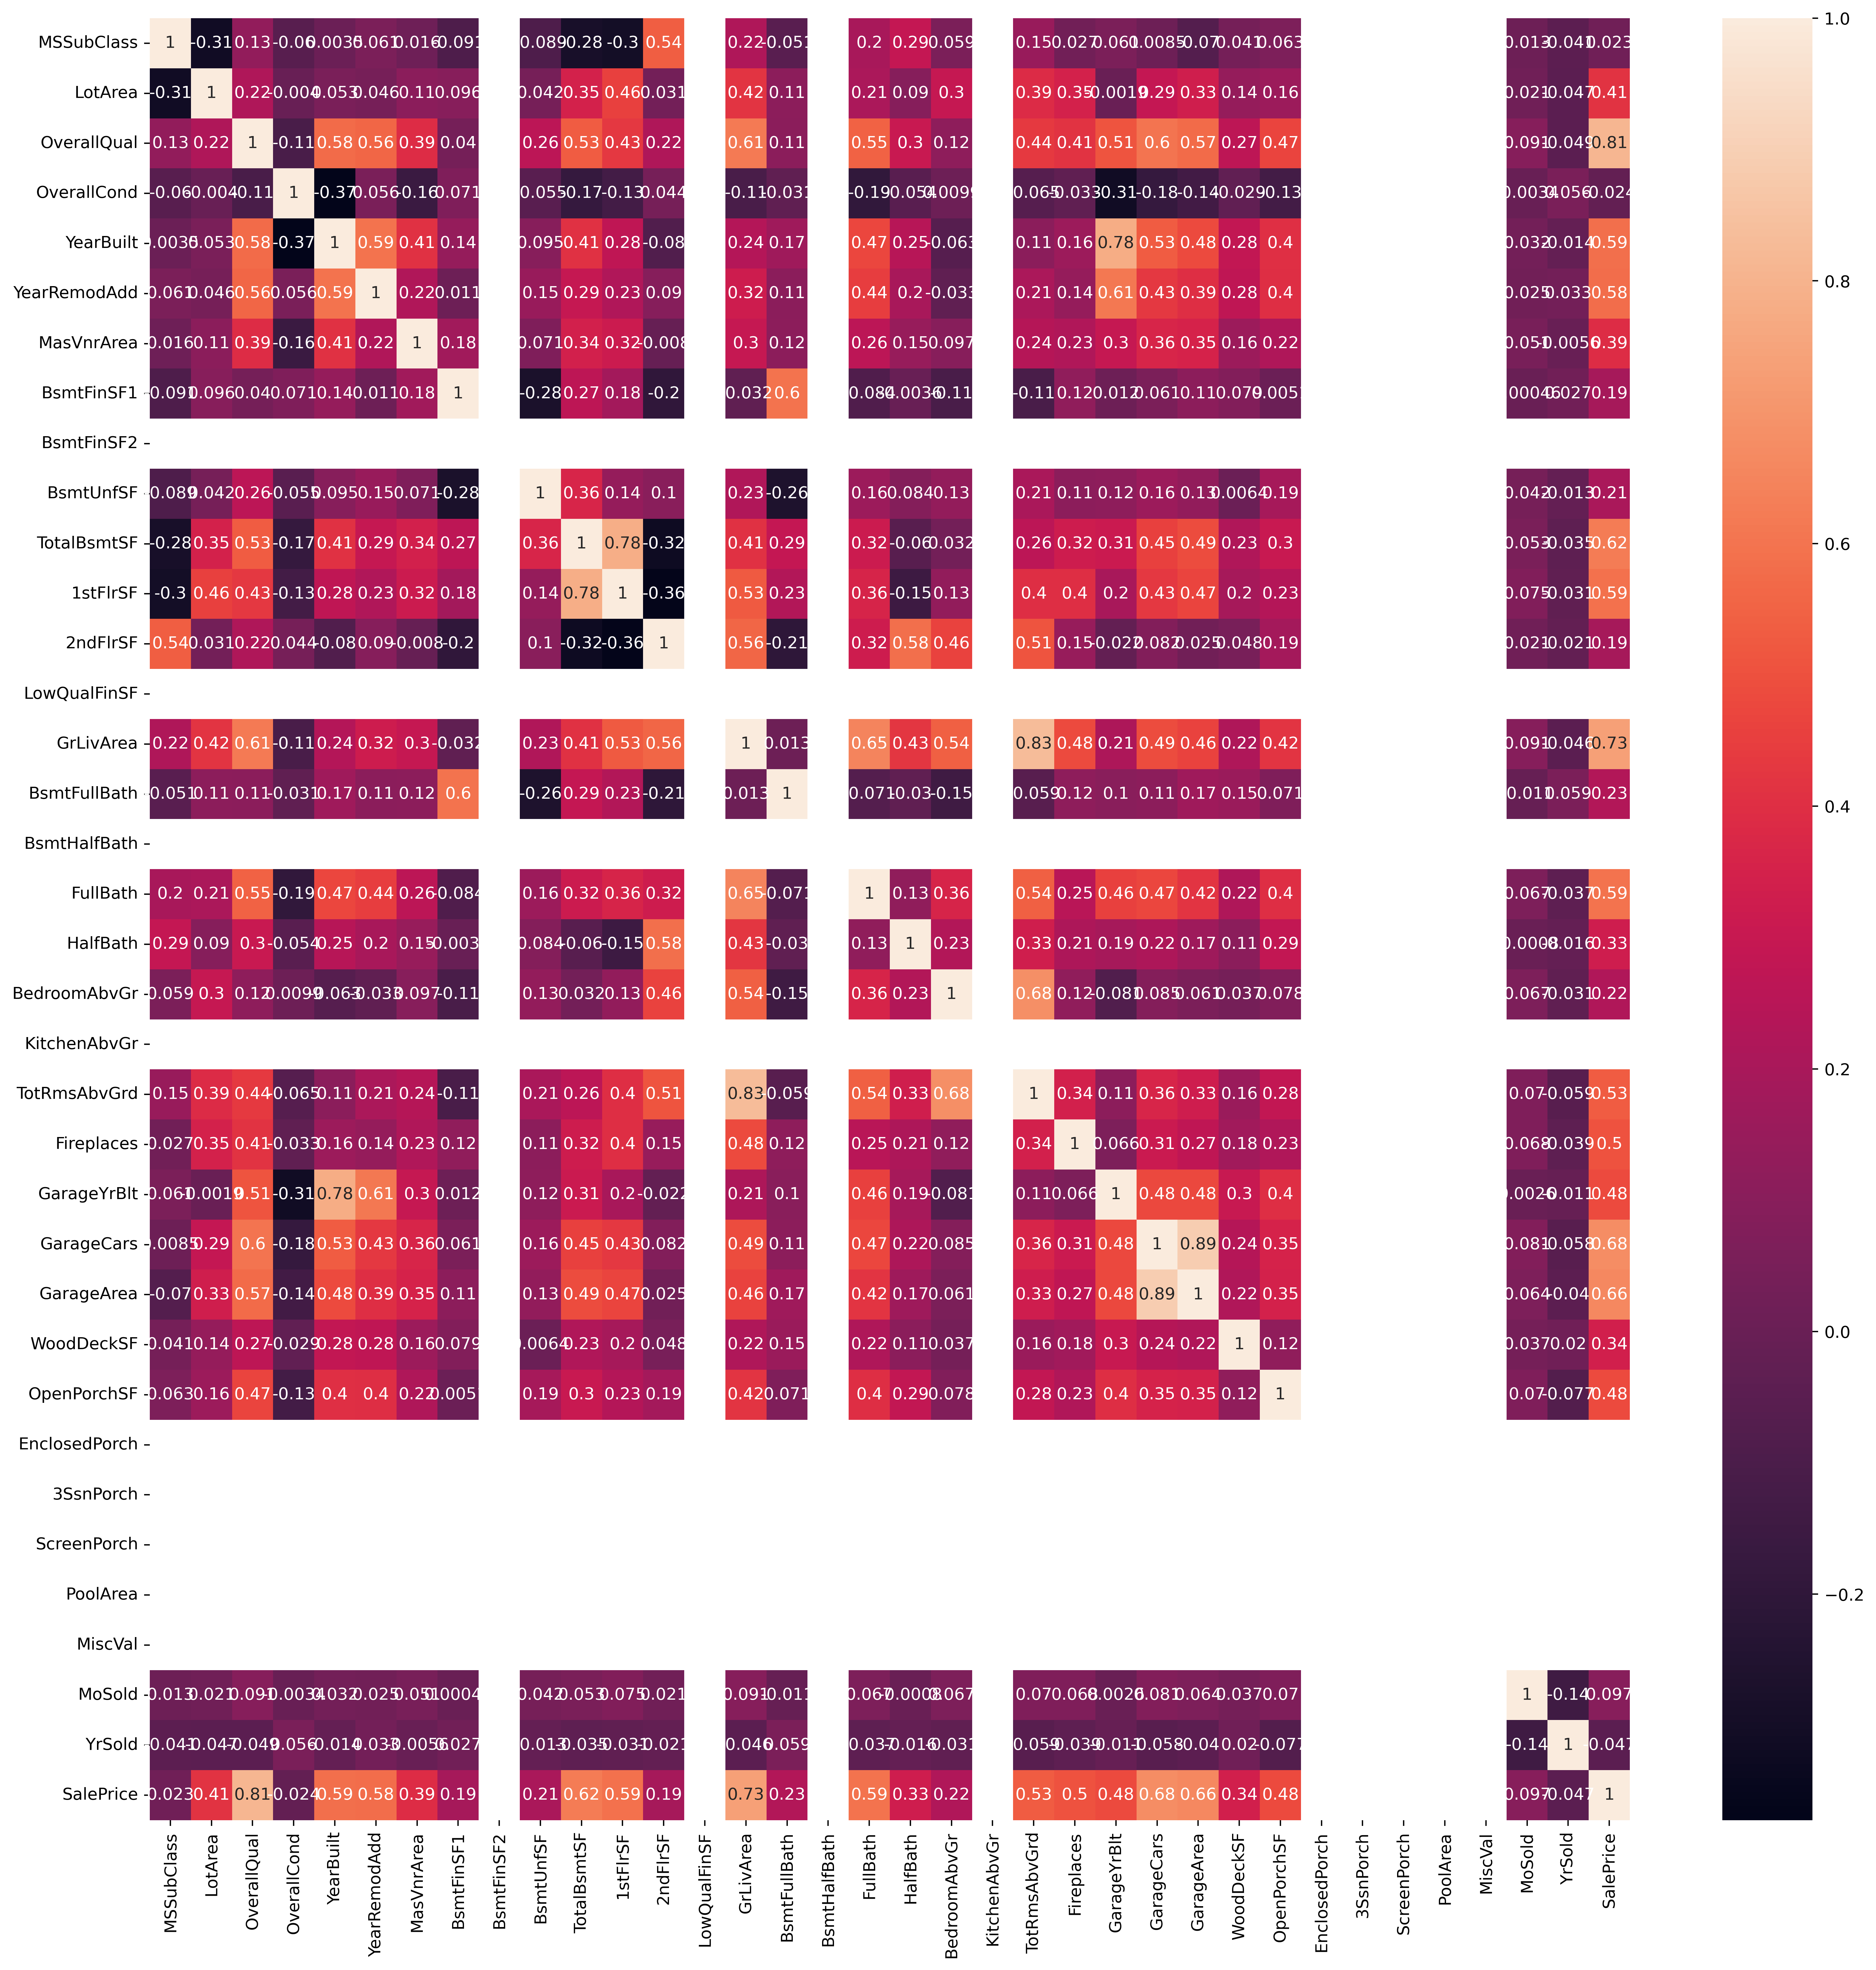

In [59]:
plt.figure(figsize=(20,20), dpi=400)
sns.heatmap(df.corr(), annot=True)

In [60]:
df.nunique()

MSSubClass        13
MSZoning           5
LotArea          829
Street             2
LotShape           4
LandContour        4
Utilities          1
LotConfig          5
LandSlope          3
Neighborhood      25
Condition1         9
Condition2         8
BldgType           5
HouseStyle         8
OverallQual       10
OverallCond        6
YearBuilt        110
YearRemodAdd      61
RoofStyle          6
RoofMatl           8
Exterior1st       14
Exterior2nd       15
MasVnrType         4
MasVnrArea       214
ExterQual          4
ExterCond          5
Foundation         6
BsmtQual           4
BsmtCond           4
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       545
BsmtFinType2       6
BsmtFinSF2         1
BsmtUnfSF        663
TotalBsmtSF      613
Heating            6
HeatingQC          5
CentralAir         2
Electrical         5
1stFlrSF         651
2ndFlrSF         350
LowQualFinSF       1
GrLivArea        724
BsmtFullBath       4
BsmtHalfBath       1
FullBath           4
HalfBath     

In [61]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

In [62]:
label_=LabelEncoder()

for i in categorical_features:
    df[i]=label_.fit_transform(df[i])

## VIF

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [65]:
y = df['SalePrice']

In [66]:
df.drop('SalePrice', axis=1, inplace=True)
x = df.copy()

In [67]:
calc_vif(x)

variables    VIF FACTOR
0      MSSubClass  5.937404e+00
1        MSZoning  1.370887e+00
2         LotArea  2.280876e+00
3          Street  1.107082e+00
4        LotShape  1.283192e+00
5     LandContour  1.312846e+00
6       Utilities           NaN
7       LotConfig  1.132159e+00
8       LandSlope  1.436510e+00
9    Neighborhood  1.255591e+00
10     Condition1  1.128683e+00
11     Condition2  1.085495e+00
12       BldgType  4.431788e+00
13     HouseStyle  2.497578e+00
14    OverallQual  3.920454e+00
15    OverallCond  1.820262e+00
16      YearBuilt  7.374760e+00
17   YearRemodAdd  2.866606e+00
18      RoofStyle  1.271655e+00
19       RoofMatl  1.173716e+00
20    Exterior1st  4.235442e+00
21    Exterior2nd  4.267725e+00
22     MasVnrType  1.515428e+00
23     MasVnrArea  1.972094e+00
24      ExterQual  2.629585e+00
25      ExterCond  1.206447e+00
26     Foundation  2.094235e+00
27       BsmtQual  2.264880e+00
28       BsmtCond  1.175990e+00
29   BsmtExposure  1.593944e+00
30   BsmtFinType1  3.249374e+00
31     BsmtFinSF1  4.183209e+00
32   BsmtFinType2  1.224899e+00
33     BsmtFinSF2           NaN
34      BsmtUnfSF  2.033910e+00
35    TotalBsmtSF  5.634051e+00
36        Heating  1.318095e+00
37      HeatingQC  1.682099e+00
38     CentralAir  1.673597e+00
39     Electrical  1.364619e+00
40       1stFlrSF  1.410164e+01
41       2ndFlrSF  1.473591e+01
42   LowQualFinSF           NaN
43      GrLivArea  2.103444e+01
44   BsmtFullBath  1.892441e+00
45   BsmtHalfBath           NaN
46       FullBath  3.102253e+00
47       HalfBath  2.467424e+00
48   BedroomAbvGr  2.722073e+00
49   KitchenAbvGr  2.512916e+06
50    KitchenQual  2.043333e+00
51   TotRmsAbvGrd  4.789365e+00
52     Functional  1.235573e+00
53     Fireplaces  1.683362e+00
54     GarageType  1.724299e+00
55    GarageYrBlt  3.732787e+00
56   GarageFinish  2.081428e+00
57     GarageCars  6.277328e+00
58     GarageArea  6.361906e+00
59     GarageQual  1.610275e+00
60     GarageCond  1.549873e+00
61     PavedDrive  1.514596e+00
62     WoodDeckSF  1.301711e+00
63    OpenPorchSF  1.587894e+00
64  EnclosedPorch           NaN
65      3SsnPorch           NaN
66    ScreenPorch           NaN
67       PoolArea           NaN
68        MiscVal           NaN
69         MoSold  1.077544e+00
70         YrSold  1.086968e+00
71       SaleType  1.115165e+00
72  SaleCondition  1.174796e+00

In [68]:
x.drop('EnclosedPorch', axis=1, inplace=True)
x.drop('3SsnPorch', axis=1, inplace=True)
x.drop('ScreenPorch', axis=1, inplace=True)
x.drop('PoolArea', axis=1, inplace=True)
x.drop('MiscVal', axis=1, inplace=True)
x.drop('Utilities', axis=1, inplace=True)
x.drop('BsmtFinSF2', axis=1, inplace=True)
x.drop('LowQualFinSF', axis=1, inplace=True)
x.drop('BsmtHalfBath', axis=1, inplace=True)

In [69]:
calc_vif(x)

variables    VIF FACTOR
0      MSSubClass  5.937404e+00
1        MSZoning  1.370887e+00
2         LotArea  2.280876e+00
3          Street  1.107082e+00
4        LotShape  1.283192e+00
5     LandContour  1.312846e+00
6       LotConfig  1.132159e+00
7       LandSlope  1.436510e+00
8    Neighborhood  1.255591e+00
9      Condition1  1.128683e+00
10     Condition2  1.085495e+00
11       BldgType  4.431788e+00
12     HouseStyle  2.497578e+00
13    OverallQual  3.920454e+00
14    OverallCond  1.820262e+00
15      YearBuilt  7.374760e+00
16   YearRemodAdd  2.866606e+00
17      RoofStyle  1.271655e+00
18       RoofMatl  1.173716e+00
19    Exterior1st  4.235442e+00
20    Exterior2nd  4.267725e+00
21     MasVnrType  1.515428e+00
22     MasVnrArea  1.972094e+00
23      ExterQual  2.629585e+00
24      ExterCond  1.206447e+00
25     Foundation  2.094235e+00
26       BsmtQual  2.264880e+00
27       BsmtCond  1.175990e+00
28   BsmtExposure  1.593944e+00
29   BsmtFinType1  3.249374e+00
30     BsmtFinSF1  4.183209e+00
31   BsmtFinType2  1.224899e+00
32      BsmtUnfSF  2.033910e+00
33    TotalBsmtSF  5.634051e+00
34        Heating  1.318095e+00
35      HeatingQC  1.682099e+00
36     CentralAir  1.673597e+00
37     Electrical  1.364619e+00
38       1stFlrSF  1.410164e+01
39       2ndFlrSF  1.473591e+01
40      GrLivArea  2.103444e+01
41   BsmtFullBath  1.892441e+00
42       FullBath  3.102253e+00
43       HalfBath  2.467424e+00
44   BedroomAbvGr  2.722073e+00
45   KitchenAbvGr  2.512916e+06
46    KitchenQual  2.043333e+00
47   TotRmsAbvGrd  4.789365e+00
48     Functional  1.235573e+00
49     Fireplaces  1.683362e+00
50     GarageType  1.724299e+00
51    GarageYrBlt  3.732787e+00
52   GarageFinish  2.081428e+00
53     GarageCars  6.277328e+00
54     GarageArea  6.361906e+00
55     GarageQual  1.610275e+00
56     GarageCond  1.549873e+00
57     PavedDrive  1.514596e+00
58     WoodDeckSF  1.301711e+00
59    OpenPorchSF  1.587894e+00
60         MoSold  1.077544e+00
61         YrSold  1.086968e+00
62       SaleType  1.115165e+00
63  SaleCondition  1.174796e+00

In [70]:
x.drop('1stFlrSF', axis=1, inplace=True)
x.drop('2ndFlrSF', axis=1, inplace=True)
x.drop('GrLivArea', axis=1, inplace=True)
x.drop('KitchenAbvGr', axis=1, inplace=True)
calc_vif(x)

variables    VIF FACTOR
0      MSSubClass    152.955264
1        MSZoning     32.433815
2         LotArea     19.154973
3          Street    321.525140
4        LotShape      3.688780
5     LandContour     21.347973
6       LotConfig      4.917228
7       LandSlope      1.489220
8    Neighborhood      6.339307
9      Condition1      7.256066
10     Condition2     70.672469
11       BldgType      4.487471
12     HouseStyle      8.276975
13    OverallQual     75.848574
14    OverallCond    300.234488
15      YearBuilt  30420.716260
16   YearRemodAdd  26038.101064
17      RoofStyle      4.823830
18       RoofMatl      4.473805
19    Exterior1st     37.028385
20    Exterior2nd     35.259654
21     MasVnrType     13.853254
22     MasVnrArea      3.228727
23      ExterQual     36.702768
24      ExterCond     31.305518
25     Foundation      9.985631
26       BsmtQual     18.180564
27       BsmtCond     21.295132
28   BsmtExposure      7.629880
29   BsmtFinType1     10.750080
30     BsmtFinSF1     12.264158
31   BsmtFinType2     32.722027
32      BsmtUnfSF     18.864363
33    TotalBsmtSF     30.518924
34        Heating     16.703881
35      HeatingQC      3.024783
36     CentralAir     24.979705
37     Electrical     18.376413
38   BsmtFullBath      3.178193
39       FullBath     24.120182
40       HalfBath      2.985748
41   BedroomAbvGr     40.143259
42    KitchenQual     17.926020
43   TotRmsAbvGrd    339.340898
44     Functional     40.567772
45     Fireplaces      3.244818
46     GarageType      4.336295
47    GarageYrBlt  24417.159202
48   GarageFinish      6.867962
49     GarageCars     42.234275
50     GarageArea     39.255399
51     GarageQual     70.049169
52     GarageCond     94.841024
53     PavedDrive     22.048070
54     WoodDeckSF      2.468349
55    OpenPorchSF      3.325301
56         MoSold      6.937622
57         YrSold  45498.606351
58       SaleType     24.760838
59  SaleCondition     14.630545

In [71]:
x.drop('MSSubClass', axis=1, inplace=True)
x.drop('TotRmsAbvGrd', axis=1, inplace=True)
x.drop('GarageYrBlt', axis=1, inplace=True)
x.drop('YrSold', axis=1, inplace=True)
x.drop('GarageCars', axis=1, inplace=True)
calc_vif(x)

variables    VIF FACTOR
0        MSZoning     31.070012
1         LotArea     18.485407
2          Street    319.607553
3        LotShape      3.650599
4     LandContour     21.216184
5       LotConfig      4.883446
6       LandSlope      1.470420
7    Neighborhood      6.289116
8      Condition1      7.176959
9      Condition2     70.132228
10       BldgType      2.013175
11     HouseStyle      6.388549
12    OverallQual     72.477970
13    OverallCond    289.479281
14      YearBuilt  14694.486684
15   YearRemodAdd  15867.501430
16      RoofStyle      4.674696
17       RoofMatl      4.430795
18    Exterior1st     36.805494
19    Exterior2nd     35.029900
20     MasVnrType     13.780874
21     MasVnrArea      3.168989
22      ExterQual     36.212602
23      ExterCond     30.896914
24     Foundation      9.148801
25       BsmtQual     17.852821
26       BsmtCond     21.240431
27   BsmtExposure      7.359955
28   BsmtFinType1     10.522424
29     BsmtFinSF1     12.052655
30   BsmtFinType2     32.644347
31      BsmtUnfSF     18.763967
32    TotalBsmtSF     28.138017
33        Heating     16.458900
34      HeatingQC      2.879619
35     CentralAir     23.921195
36     Electrical     17.659458
37   BsmtFullBath      3.150089
38       FullBath     21.478359
39       HalfBath      2.694805
40   BedroomAbvGr     26.959771
41    KitchenQual     17.748897
42     Functional     39.926593
43     Fireplaces      3.006652
44     GarageType      4.143059
45   GarageFinish      6.646100
46     GarageArea     13.698317
47     GarageQual     68.442397
48     GarageCond     93.859637
49     PavedDrive     21.480247
50     WoodDeckSF      2.432425
51    OpenPorchSF      3.274035
52         MoSold      6.905831
53       SaleType     24.559100
54  SaleCondition     14.456153

In [72]:
x.drop('YearBuilt', axis=1, inplace=True)
x.drop('YearRemodAdd', axis=1, inplace=True)
x.drop('Street', axis=1, inplace=True)
x.drop('GarageCond', axis=1, inplace=True)
calc_vif(x)

variables  VIF FACTOR
0        MSZoning   29.558718
1         LotArea   18.087092
2        LotShape    3.598471
3     LandContour   20.169155
4       LotConfig    4.845887
5       LandSlope    1.426105
6    Neighborhood    6.242426
7      Condition1    7.087289
8      Condition2   64.998877
9        BldgType    1.949310
10     HouseStyle    6.256096
11    OverallQual   71.410661
12    OverallCond  170.713161
13      RoofStyle    4.671356
14       RoofMatl    4.414650
15    Exterior1st   36.344996
16    Exterior2nd   35.008300
17     MasVnrType   13.280348
18     MasVnrArea    3.131766
19      ExterQual   35.437552
20      ExterCond   29.499514
21     Foundation    8.517764
22       BsmtQual   17.559065
23       BsmtCond   20.550306
24   BsmtExposure    7.269096
25   BsmtFinType1   10.110388
26     BsmtFinSF1   11.847505
27   BsmtFinType2   31.095272
28      BsmtUnfSF   18.522936
29    TotalBsmtSF   27.760570
30        Heating   15.522834
31      HeatingQC    2.831043
32     CentralAir   23.498984
33     Electrical   17.503553
34   BsmtFullBath    3.118587
35       FullBath   21.361283
36       HalfBath    2.674452
37   BedroomAbvGr   26.862258
38    KitchenQual   17.088290
39     Functional   38.305774
40     Fireplaces    2.986875
41     GarageType    4.095355
42   GarageFinish    6.559058
43     GarageArea   13.655065
44     GarageQual   48.400120
45     PavedDrive   20.052590
46     WoodDeckSF    2.428208
47    OpenPorchSF    3.271293
48         MoSold    6.874479
49       SaleType   24.248561
50  SaleCondition   14.405205

In [73]:
x.drop('MSZoning', axis=1, inplace=True)
x.drop('Condition2', axis=1, inplace=True)
x.drop('OverallCond', axis=1, inplace=True)
x.drop('OverallQual', axis=1, inplace=True)

x.drop('Exterior1st', axis=1, inplace=True)
x.drop('Exterior2nd', axis=1, inplace=True)
x.drop('ExterQual', axis=1, inplace=True)
calc_vif(x)

variables  VIF FACTOR
0         LotArea   17.737944
1        LotShape    3.572085
2     LandContour   19.827121
3       LotConfig    4.804295
4       LandSlope    1.398335
5    Neighborhood    5.821593
6      Condition1    6.929162
7        BldgType    1.888679
8      HouseStyle    6.063752
9       RoofStyle    4.504009
10       RoofMatl    4.329047
11     MasVnrType   12.838136
12     MasVnrArea    3.049146
13      ExterCond   28.904802
14     Foundation    8.025264
15       BsmtQual   16.039629
16       BsmtCond   20.268676
17   BsmtExposure    7.166671
18   BsmtFinType1    9.724653
19     BsmtFinSF1   11.535342
20   BsmtFinType2   30.478944
21      BsmtUnfSF   18.151185
22    TotalBsmtSF   26.011667
23        Heating   14.942035
24      HeatingQC    2.727539
25     CentralAir   22.185461
26     Electrical   16.933914
27   BsmtFullBath    3.090500
28       FullBath   20.368391
29       HalfBath    2.539714
30   BedroomAbvGr   26.461465
31    KitchenQual   14.391760
32     Functional   34.027982
33     Fireplaces    2.845222
34     GarageType    3.975066
35   GarageFinish    6.400531
36     GarageArea   13.260901
37     GarageQual   45.598512
38     PavedDrive   19.949790
39     WoodDeckSF    2.377213
40    OpenPorchSF    3.227096
41         MoSold    6.794845
42       SaleType   23.186221
43  SaleCondition   14.099991

In [74]:
x.drop('LandContour', axis=1, inplace=True)
x.drop('SaleType', axis=1, inplace=True)
x.drop('GarageQual', axis=1, inplace=True)
x.drop('Functional', axis=1, inplace=True)

x.drop('BedroomAbvGr', axis=1, inplace=True)
x.drop('FullBath', axis=1, inplace=True)
x.drop('ExterCond', axis=1, inplace=True)
calc_vif(x)

variables  VIF FACTOR
0         LotArea   16.811850
1        LotShape    3.497507
2       LotConfig    4.737797
3       LandSlope    1.203193
4    Neighborhood    5.800891
5      Condition1    6.787976
6        BldgType    1.714934
7      HouseStyle    5.427132
8       RoofStyle    4.430320
9        RoofMatl    4.271592
10     MasVnrType   12.489787
11     MasVnrArea    2.986603
12     Foundation    7.409587
13       BsmtQual   14.553534
14       BsmtCond   19.212530
15   BsmtExposure    6.884536
16   BsmtFinType1    9.381924
17     BsmtFinSF1   11.163551
18   BsmtFinType2   29.163715
19      BsmtUnfSF   17.842561
20    TotalBsmtSF   25.007548
21        Heating   14.052132
22      HeatingQC    2.644739
23     CentralAir   21.435009
24     Electrical   16.425202
25   BsmtFullBath    2.983799
26       HalfBath    2.350614
27    KitchenQual   13.939437
28     Fireplaces    2.798444
29     GarageType    3.886873
30   GarageFinish    6.262293
31     GarageArea   12.806902
32     PavedDrive   19.293080
33     WoodDeckSF    2.331768
34    OpenPorchSF    3.140006
35         MoSold    6.683990
36  SaleCondition   13.355486

In [75]:
x.drop('LotArea', axis=1, inplace=True)
x.drop('MasVnrType', axis=1, inplace=True)
x.drop('BsmtQual', axis=1, inplace=True)
x.drop('BsmtCond', axis=1, inplace=True)

In [76]:
x.drop('BsmtFinSF1', axis=1, inplace=True)
x.drop('BsmtFinType2', axis=1, inplace=True)
x.drop('TotalBsmtSF', axis=1, inplace=True)
x.drop('CentralAir', axis=1, inplace=True)

calc_vif(x)

variables  VIF FACTOR
0        LotShape    3.404601
1       LotConfig    4.562136
2       LandSlope    1.178550
3    Neighborhood    5.588386
4      Condition1    6.657623
5        BldgType    1.289939
6      HouseStyle    4.828049
7       RoofStyle    4.186437
8        RoofMatl    4.068599
9      MasVnrArea    2.221496
10     Foundation    6.929474
11   BsmtExposure    6.518508
12   BsmtFinType1    4.645297
13      BsmtUnfSF   11.045788
14        Heating   11.804225
15      HeatingQC    2.562989
16     Electrical   14.967952
17   BsmtFullBath    2.351150
18       HalfBath    2.244080
19    KitchenQual   11.608150
20     Fireplaces    2.615335
21     GarageType    3.652531
22   GarageFinish    5.986235
23     GarageArea   11.015707
24     PavedDrive   16.908561
25     WoodDeckSF    2.295692
26    OpenPorchSF    3.065159
27         MoSold    6.530102
28  SaleCondition   12.800088

In [77]:
x.drop('BsmtUnfSF', axis=1, inplace=True)
x.drop('Heating', axis=1, inplace=True)
x.drop('Electrical', axis=1, inplace=True)
x.drop('KitchenQual', axis=1, inplace=True)


x.drop('SaleCondition', axis=1, inplace=True)
x.drop('PavedDrive', axis=1, inplace=True)
x.drop('GarageArea', axis=1, inplace=True)
calc_vif(x)

variables  VIF FACTOR
0       LotShape    3.333062
1      LotConfig    4.403053
2      LandSlope    1.174132
3   Neighborhood    5.191446
4     Condition1    5.999612
5       BldgType    1.251277
6     HouseStyle    4.657952
7      RoofStyle    4.092862
8       RoofMatl    3.910081
9     MasVnrArea    2.081880
10    Foundation    5.944220
11  BsmtExposure    5.943261
12  BsmtFinType1    4.311790
13     HeatingQC    2.345285
14  BsmtFullBath    2.193103
15      HalfBath    2.230942
16    Fireplaces    2.464131
17    GarageType    3.396349
18  GarageFinish    5.235491
19    WoodDeckSF    2.219685
20   OpenPorchSF    2.888775
21        MoSold    6.261993

## Data is ready for Model Building, 

In [80]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for i in range(0,50):
        
        # Splitting the data Set
        X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=i)
        
        # Added for Scaling
        sc=StandardScaler()
        X_train=sc.fit_transform(X_train)
        X_test=sc.fit_transform(X_test)
        
        # Model Preparation
        md=model()
        md.fit(X_train,y_train)
        
        # Prediction and Testing Model
        predict=md.predict(X_test)
        

        
        r2score=r2_score(y_test,predict)
        rmse = mean_squared_error(y_test, predict, squared=False)
        # cv_score = (cross_val_score(md, x, y, cv=2).mean())*100
        
        
        if r2score>max_score:
            max_score=r2score
            max_state=i
            
            
    # ----------------------------------------------------------
    plt.figure(figsize=(8,6))
    plt.scatter(x=y_test, y=predict, color='g')
    plt.plot(y_test,y_test,color='b')
    plt.xlabel('Actual', fontsize=14)
    plt.ylabel('Predicted', fontsize=14)
    plt.title(md, fontsize=18)
    plt.show()
    
    
    # -----------------------------------------------------------        
    print(f'----------------------------{model}----------------------------')        
    print("1. Maximum score of {} 2. Random_state {} 3. RMSE = {}".format(max_score,max_state, rmse))
    print("MAE",mean_absolute_error(y_test,predict))
    print("MSE",mean_squared_error(y_test,predict))

------------------------------------"" Linear Regression""------------------------------------ 


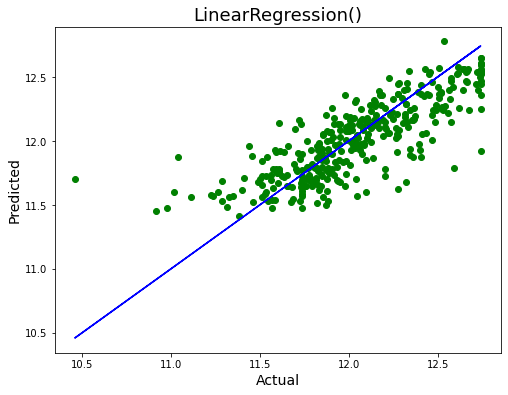

----------------------------<class 'sklearn.linear_model._base.LinearRegression'>----------------------------
1. Maximum score of 0.6737997533273219 2. Random_state 9 3. RMSE = 0.2333406550484356
MAE 0.17693589177288596
MSE 0.05444786129843301
------------------------------------""Lasso""------------------------------------


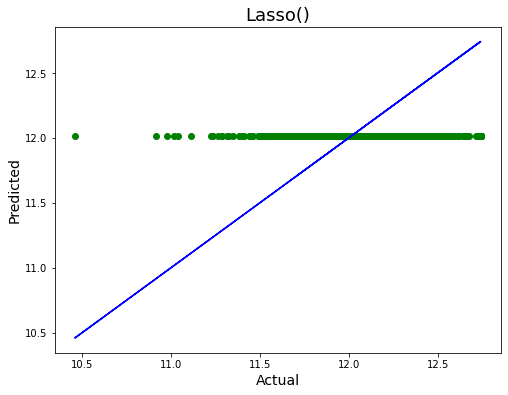

----------------------------<class 'sklearn.linear_model._coordinate_descent.Lasso'>----------------------------
1. Maximum score of 0 2. Random_state 0 3. RMSE = 0.3904192636944453
MAE 0.31277872392153033
MSE 0.15242720146371283
------------------------------------""Ridge""------------------------------------ 


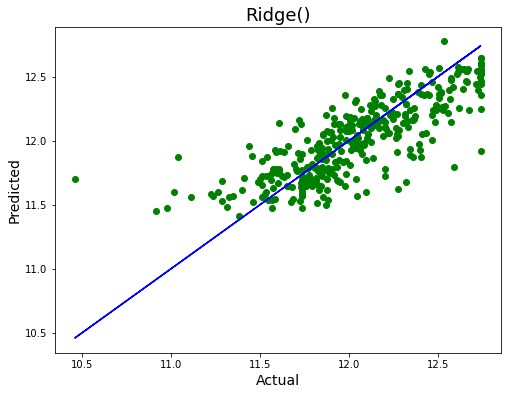

----------------------------<class 'sklearn.linear_model._ridge.Ridge'>----------------------------
1. Maximum score of 0.6737989980371288 2. Random_state 9 3. RMSE = 0.23331697984424318
MAE 0.1769206440532947
MSE 0.05443681308363898
------------------------------------""ElasticNet""------------------------------------ 


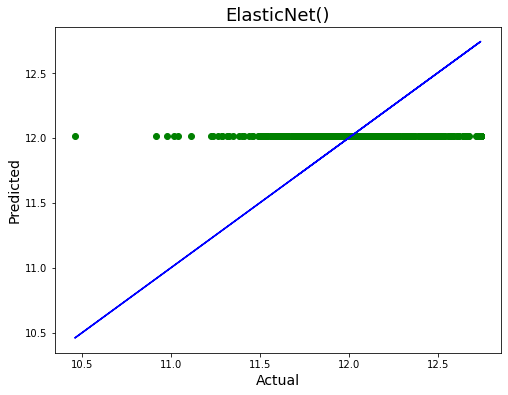

----------------------------<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>----------------------------
1. Maximum score of 0 2. Random_state 0 3. RMSE = 0.3904192636944453
MAE 0.31277872392153033
MSE 0.15242720146371283
------------------------------------""SVR""------------------------------------


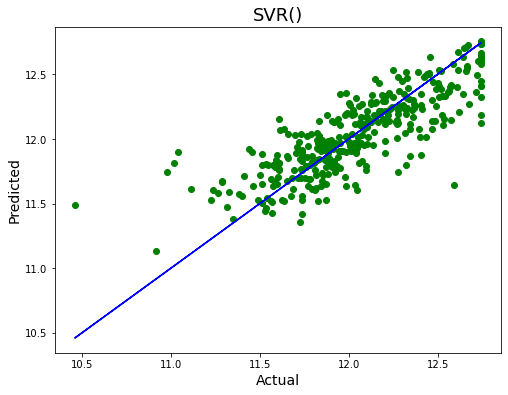

----------------------------<class 'sklearn.svm._classes.SVR'>----------------------------
1. Maximum score of 0.7174865501339569 2. Random_state 7 3. RMSE = 0.22656163138925267
MAE 0.16865253771118374
MSE 0.0513301728177596
------------------------------------""DecisionTreeRegressor""------------------------------------


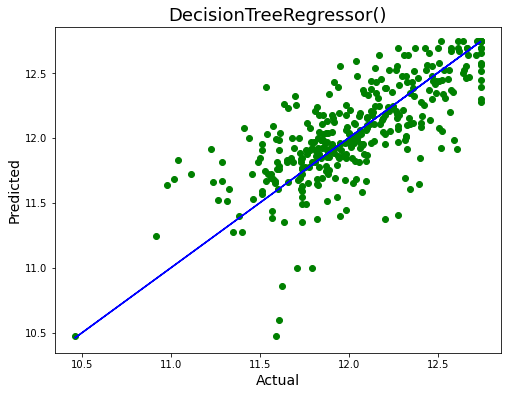

----------------------------<class 'sklearn.tree._classes.DecisionTreeRegressor'>----------------------------
1. Maximum score of 0.5430665680404334 2. Random_state 10 3. RMSE = 0.28623323834014225
MAE 0.20899703042036527
MSE 0.08192946673068469
------------------------------------""RandomForestRegressor""------------------------------------


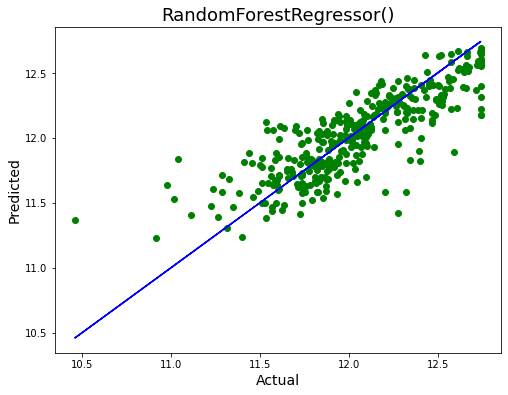

----------------------------<class 'sklearn.ensemble._forest.RandomForestRegressor'>----------------------------
1. Maximum score of 0.7202169174693289 2. Random_state 25 3. RMSE = 0.22026501729427198
MAE 0.16235718009261882
MSE 0.04851667784364593
------------------------------------""KNeighborsRegressor""------------------------------------ 


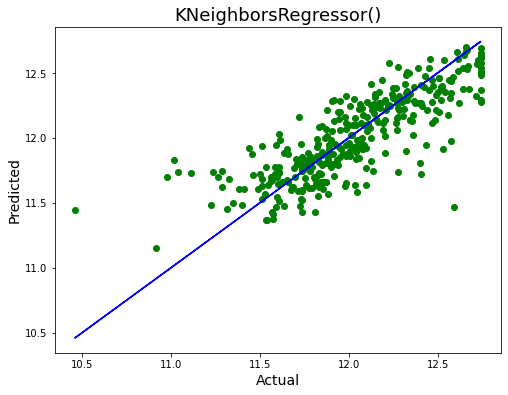

----------------------------<class 'sklearn.neighbors._regression.KNeighborsRegressor'>----------------------------
1. Maximum score of 0.6797867254060989 2. Random_state 44 3. RMSE = 0.2268875811622206
MAE 0.16699286714069841
MSE 0.051477974485643244
------------------------------------""SGDRegressor""------------------------------------


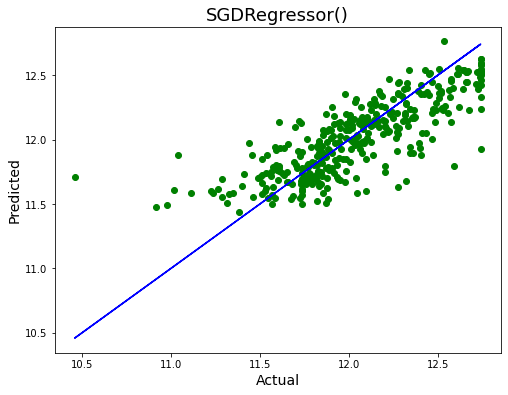

----------------------------<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>----------------------------
1. Maximum score of 0.6758394149136187 2. Random_state 9 3. RMSE = 0.23496832463860354
MAE 0.17841871555699299
MSE 0.05521011358347218
------------------------------------""GradientBoostingRegressor""------------------------------------


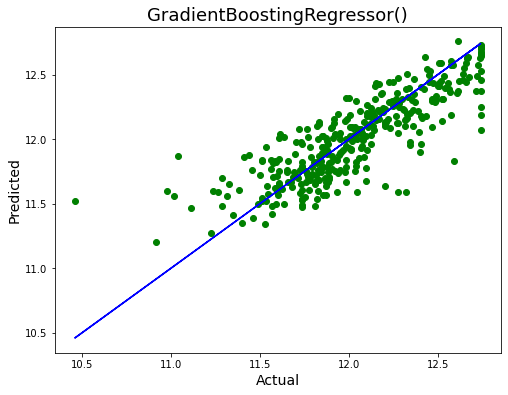

----------------------------<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>----------------------------
1. Maximum score of 0.7483028900117643 2. Random_state 4 3. RMSE = 0.21500270389376097
MAE 0.15689883676028824
MSE 0.046226162681628255
------------------------------------""AdaBoostRegressor""------------------------------------


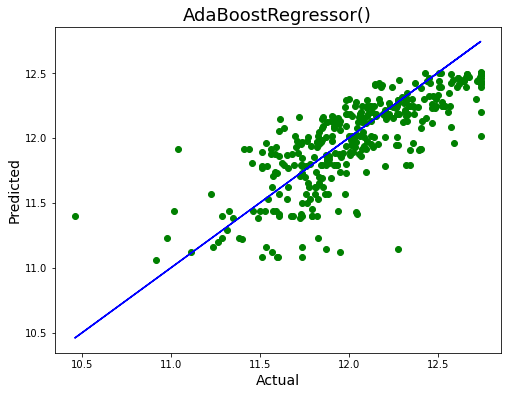

----------------------------<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>----------------------------
1. Maximum score of 0.6612463358231266 2. Random_state 15 3. RMSE = 0.2587467475130224
MAE 0.19990837693821895
MSE 0.06694987934856776
------------------------------------""ExtraTreesRegressor""------------------------------------


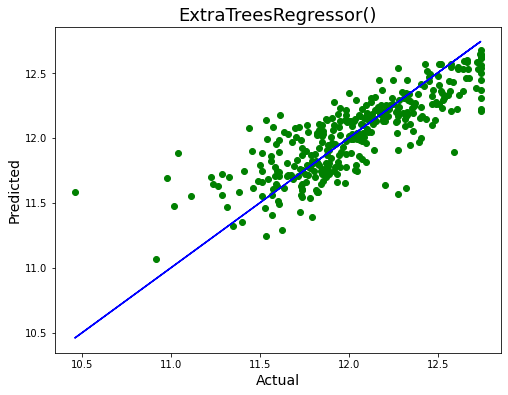

----------------------------<class 'sklearn.ensemble._forest.ExtraTreesRegressor'>----------------------------
1. Maximum score of 0.7189290307977458 2. Random_state 7 3. RMSE = 0.22638682254459486
MAE 0.1670866554697545
MSE 0.051250993421837886


In [81]:
print(f'------------------------------------"\033[1m" Linear Regression"\033[0m"------------------------------------ ')
model_select(LinearRegression)
print(f'------------------------------------"\033[1m"Lasso"\033[0m"------------------------------------')
model_select(Lasso)
print(f'------------------------------------"\033[1m"Ridge"\033[0m"------------------------------------ ')
model_select(Ridge)
print(f'------------------------------------"\033[1m"ElasticNet"\033[0m"------------------------------------ ')
model_select(ElasticNet)
print(f'------------------------------------"\033[1m"SVR"\033[0m"------------------------------------')
model_select(SVR)
print(f'------------------------------------"\033[1m"DecisionTreeRegressor"\033[0m"------------------------------------')
model_select(DecisionTreeRegressor)
print(f'------------------------------------"\033[1m"RandomForestRegressor"\033[0m"------------------------------------')
model_select(RandomForestRegressor)
print(f'------------------------------------"\033[1m"KNeighborsRegressor"\033[0m"------------------------------------ ')
model_select(KNeighborsRegressor)
print(f'------------------------------------"\033[1m"SGDRegressor"\033[0m"------------------------------------')
model_select(SGDRegressor)
print(f'------------------------------------"\033[1m"GradientBoostingRegressor"\033[0m"------------------------------------')
model_select(GradientBoostingRegressor)
print(f'------------------------------------"\033[1m"AdaBoostRegressor"\033[0m"------------------------------------')
model_select(AdaBoostRegressor)
print(f'------------------------------------"\033[1m"ExtraTreesRegressor"\033[0m"------------------------------------')
model_select(ExtraTreesRegressor)

In [82]:
#Define a function to try different train test folds
def model_select_2(model):
    max_score=0
    max_state=0
    for i in range(0,50):
        
        # Splitting the data Set
        X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=i)
        
        # Added for Scaling
        sc=StandardScaler()
        X_train=sc.fit_transform(X_train)
        X_test=sc.fit_transform(X_test)
        
        # Model Preparation
        md=model()
        md.fit(X_train,y_train)
        
        # Prediction and Testing Model
        predict=md.predict(X_test)
        

        
        r2score=r2_score(y_test,predict)
        rmse = mean_squared_error(y_test, predict, squared=False)
        # cv_score = (cross_val_score(md, x, y, cv=2).mean())*100
        
        
        if r2score>max_score:
            max_score=r2score
            max_state=i
            
            
    # ----------------------------------------------------------
    plt.figure(figsize=(8,6))
    plt.scatter(x=y_test, y=predict, color='g')
    plt.plot(y_test,y_test,color='b')
    plt.xlabel('Actual', fontsize=14)
    plt.ylabel('Predicted', fontsize=14)
    plt.title(md, fontsize=18)
    plt.show()
    
    
    # -----------------------------------------------------------        
    print(f'----------------------------{model}----------------------------')        
    print("1. Maximum score of {} 2. Random_state {} 3. RMSE = {}".format(max_score,max_state, rmse))
    print("MAE",mean_absolute_error(y_test,predict))
    print("MSE",mean_squared_error(y_test,predict))

------------------------------------"" Linear Regression""------------------------------------ 


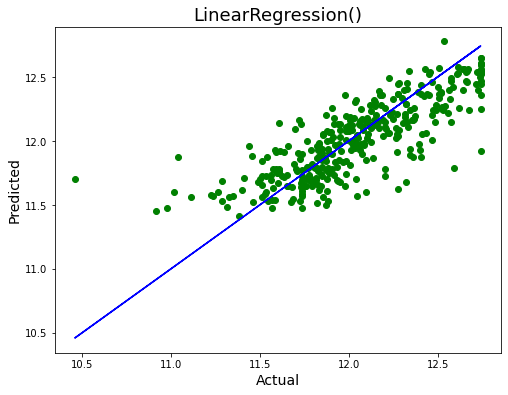

----------------------------<class 'sklearn.linear_model._base.LinearRegression'>----------------------------
1. Maximum score of 0.6737997533273219 2. Random_state 9 3. RMSE = 0.2333406550484356
MAE 0.17693589177288596
MSE 0.05444786129843301
------------------------------------""Lasso""------------------------------------


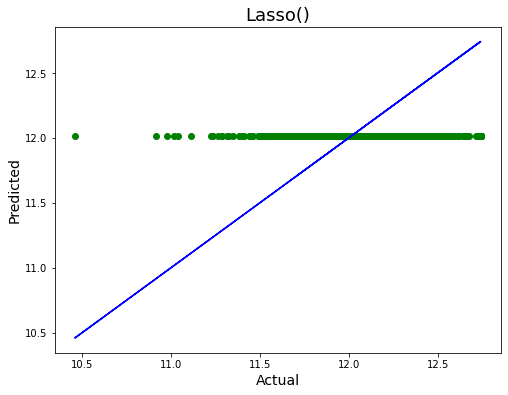

----------------------------<class 'sklearn.linear_model._coordinate_descent.Lasso'>----------------------------
1. Maximum score of 0 2. Random_state 0 3. RMSE = 0.3904192636944453
MAE 0.31277872392153033
MSE 0.15242720146371283
------------------------------------""Ridge""------------------------------------ 


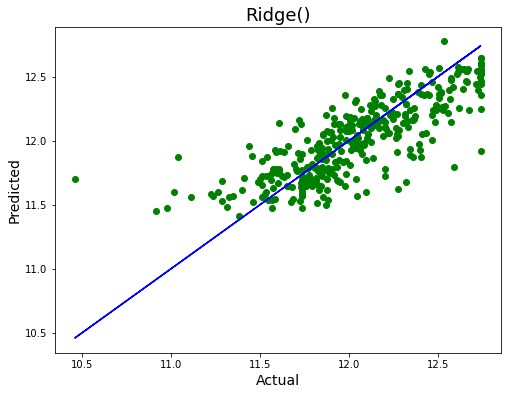

----------------------------<class 'sklearn.linear_model._ridge.Ridge'>----------------------------
1. Maximum score of 0.6737989980371288 2. Random_state 9 3. RMSE = 0.23331697984424318
MAE 0.1769206440532947
MSE 0.05443681308363898
------------------------------------""ElasticNet""------------------------------------ 


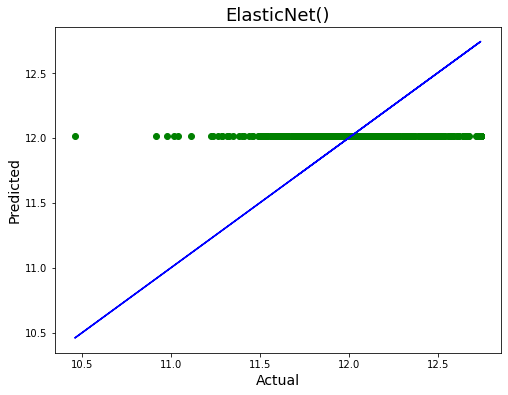

----------------------------<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>----------------------------
1. Maximum score of 0 2. Random_state 0 3. RMSE = 0.3904192636944453
MAE 0.31277872392153033
MSE 0.15242720146371283
------------------------------------""SVR""------------------------------------


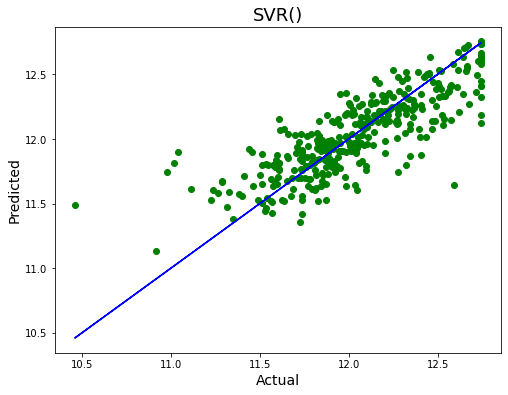

----------------------------<class 'sklearn.svm._classes.SVR'>----------------------------
1. Maximum score of 0.7174865501339569 2. Random_state 7 3. RMSE = 0.22656163138925267
MAE 0.16865253771118374
MSE 0.0513301728177596
------------------------------------""DecisionTreeRegressor""------------------------------------


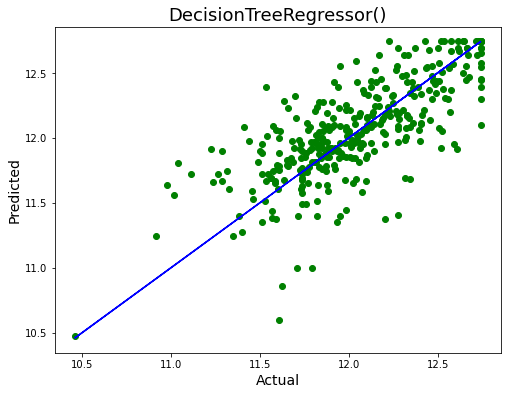

----------------------------<class 'sklearn.tree._classes.DecisionTreeRegressor'>----------------------------
1. Maximum score of 0.5373146320488289 2. Random_state 10 3. RMSE = 0.28023141464867185
MAE 0.2066883743322868
MSE 0.07852964575599584
------------------------------------""RandomForestRegressor""------------------------------------


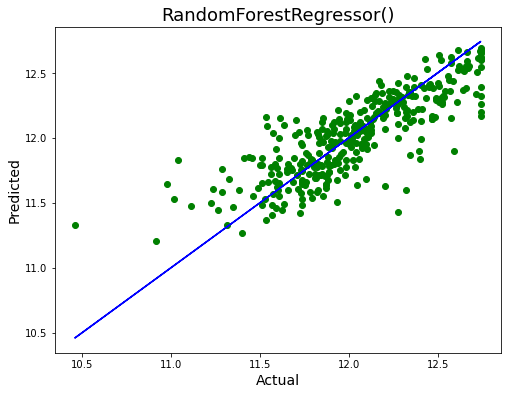

----------------------------<class 'sklearn.ensemble._forest.RandomForestRegressor'>----------------------------
1. Maximum score of 0.7203073120942856 2. Random_state 7 3. RMSE = 0.22091444622335257
MAE 0.1627392047876743
MSE 0.048803192550170536
------------------------------------""KNeighborsRegressor""------------------------------------ 


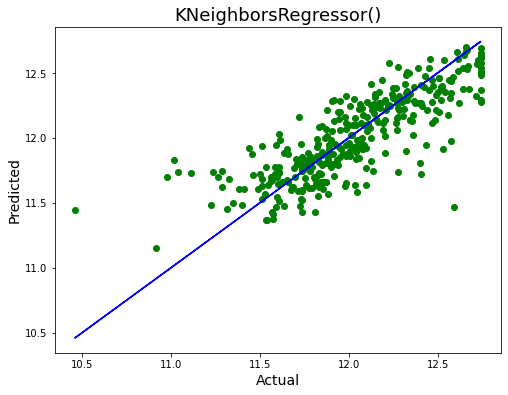

----------------------------<class 'sklearn.neighbors._regression.KNeighborsRegressor'>----------------------------
1. Maximum score of 0.6797867254060989 2. Random_state 44 3. RMSE = 0.2268875811622206
MAE 0.16699286714069841
MSE 0.051477974485643244
------------------------------------""SGDRegressor""------------------------------------


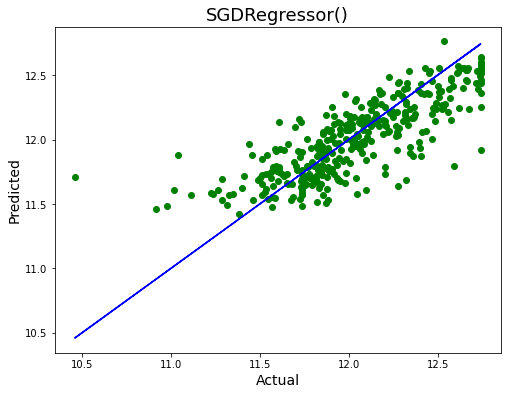

----------------------------<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>----------------------------
1. Maximum score of 0.6732026214314482 2. Random_state 40 3. RMSE = 0.23366971133208286
MAE 0.17720437114940457
MSE 0.05460153399401894
------------------------------------""GradientBoostingRegressor""------------------------------------


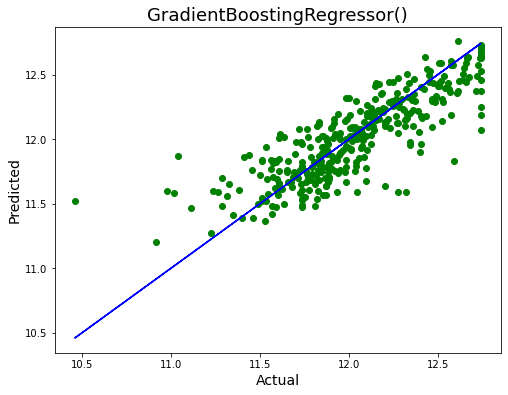

----------------------------<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>----------------------------
1. Maximum score of 0.7520426871070067 2. Random_state 4 3. RMSE = 0.21539056933909673
MAE 0.15721473549749534
MSE 0.04639309736022023
------------------------------------""AdaBoostRegressor""------------------------------------


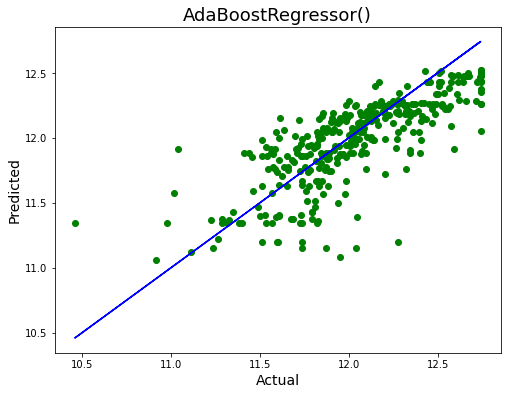

----------------------------<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>----------------------------
1. Maximum score of 0.6549903963185757 2. Random_state 7 3. RMSE = 0.25514893484602114
MAE 0.19340963419714918
MSE 0.06510097895305914
------------------------------------""ExtraTreesRegressor""------------------------------------


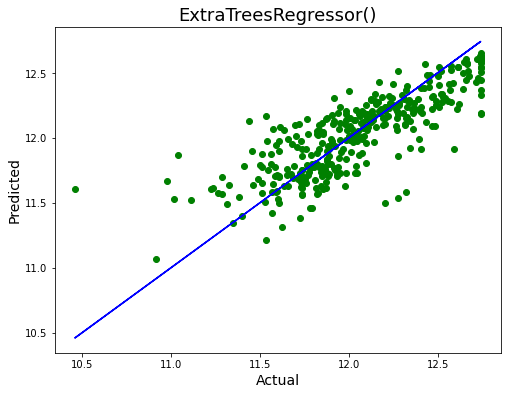

----------------------------<class 'sklearn.ensemble._forest.ExtraTreesRegressor'>----------------------------
1. Maximum score of 0.7179779813327356 2. Random_state 7 3. RMSE = 0.23036676679300377
MAE 0.170390337013021
MSE 0.05306884724266219


In [83]:
print(f'------------------------------------"\033[1m" Linear Regression"\033[0m"------------------------------------ ')
model_select_2(LinearRegression)
print(f'------------------------------------"\033[1m"Lasso"\033[0m"------------------------------------')
model_select_2(Lasso)
print(f'------------------------------------"\033[1m"Ridge"\033[0m"------------------------------------ ')
model_select_2(Ridge)
print(f'------------------------------------"\033[1m"ElasticNet"\033[0m"------------------------------------ ')
model_select_2(ElasticNet)
print(f'------------------------------------"\033[1m"SVR"\033[0m"------------------------------------')
model_select_2(SVR)
print(f'------------------------------------"\033[1m"DecisionTreeRegressor"\033[0m"------------------------------------')
model_select_2(DecisionTreeRegressor)
print(f'------------------------------------"\033[1m"RandomForestRegressor"\033[0m"------------------------------------')
model_select_2(RandomForestRegressor)
print(f'------------------------------------"\033[1m"KNeighborsRegressor"\033[0m"------------------------------------ ')
model_select_2(KNeighborsRegressor)
print(f'------------------------------------"\033[1m"SGDRegressor"\033[0m"------------------------------------')
model_select_2(SGDRegressor)
print(f'------------------------------------"\033[1m"GradientBoostingRegressor"\033[0m"------------------------------------')
model_select_2(GradientBoostingRegressor)
print(f'------------------------------------"\033[1m"AdaBoostRegressor"\033[0m"------------------------------------')
model_select_2(AdaBoostRegressor)
print(f'------------------------------------"\033[1m"ExtraTreesRegressor"\033[0m"------------------------------------')
model_select_2(ExtraTreesRegressor)

### Observations - 
From above mode, it is clear that RandomForestRegressor with score of 0.7203073120942856 at Random_state 7.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=7)

In [86]:
parameters = {'n_estimators': [100, 150, 200, 250, 300], 'max_depth': [1,2,3,4]}

regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [87]:
y_pred_train = clf.predict(X_train)
mean_squared_error(y_train, y_pred_train)

0.04592041588151789

In [88]:
y_pred = clf.predict(X_test)
mean_squared_error(y_test, y_pred)

0.0516156296234189

In [89]:
results = pd.DataFrame(zip(y_test, y_pred, y_test - y_pred), columns = ['y_test', 'y_pred', 'error'])
results.head(10)

y_test     y_pred     error
0  11.774528  11.743731  0.030797
1  12.367345  12.335152  0.032193
2  12.072547  11.936742  0.135805
3  11.350418  11.653388 -0.302970
4  12.109016  12.034802  0.074215
5  12.031130  12.034770 -0.003641
6  11.385103  11.640777 -0.255673
7  11.849405  11.643840  0.205565
8  11.811555  11.726499  0.085056
9  11.782960  11.850252 -0.067292

<AxesSubplot:>

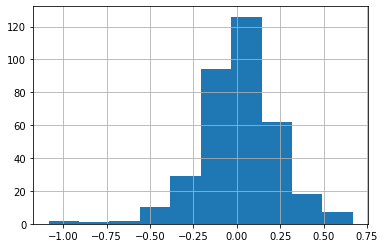

In [90]:
results['error'].hist()

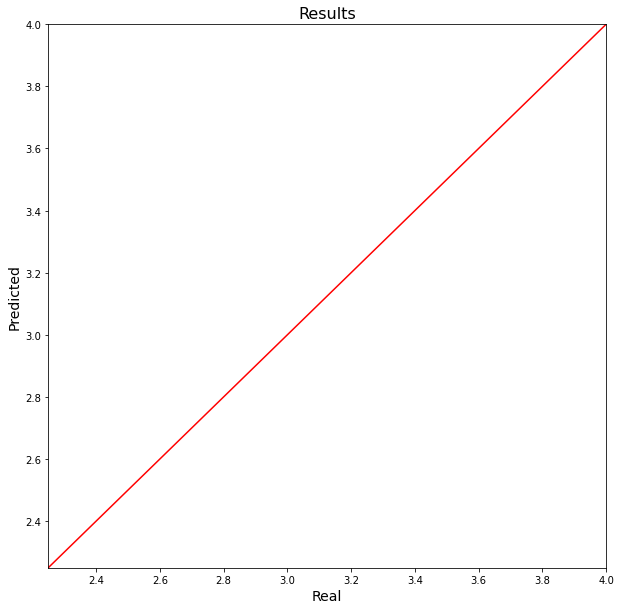

In [91]:
plt.figure(figsize=(10,10))
x=np.linspace(0,5,5)
plt.plot(results['y_test'], results['y_pred'], 'b.')
plt.plot(x, x, 'r-')
plt.xlim(2.25,4)
plt.ylim(2.25,4)
plt.title("Results", fontsize=16)
plt.xlabel("Real", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.savefig("Results.png")
plt.show()

# Predicting test data

In [148]:
df2 = pd.read_csv('test.csv')

In [149]:
df2.fillna(df2.median(), inplace=True)

In [150]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

In [151]:
for feature in features_with_na:
    df[feature] = df[feature].fillna(df[feature].mode()[0])

In [152]:
categorical_features=[feature for feature in df2.columns if df2[feature].dtypes=='O']

In [153]:
label_=LabelEncoder()

for i in categorical_features:
    df2[i]=label_.fit_transform(df2[i])

In [154]:
df2.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   337          20         2         86.0    14157       1      2         0   
1  1018         120         2         65.0     5814       1      2         0   
2   929          20         2         65.0    11838       1      2         3   
3  1148          70         2         75.0    12000       1      2         3   
4  1227          60         2         86.0    14598       1      2         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          0          0          0            21           2   
1            3          0          1          0            21           2   
2            3          0          4          0             4           2   
3            0          0          4          0             5           2   
4            3          0          1          0            20           1   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0         0           2            9            5       2005   
1           0         4           2            8            5       1984   
2           0         0           2            8            5       2001   
3           0         0           5            7            7       1941   
4           0         0           5            6            5       2007   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2006          3         0            9           11           3   
1          1984          1         0            5            5           2   
2          2001          3         0            9           11           2   
3          1950          1         0            6            7           2   
4          2007          1         0            9           11           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       200.0          2          3           2         0         2   
1         0.0          2          3           1         2         2   
2         0.0          2          3           2         2         2   
3         0.0          3          3           1         3         2   
4        74.0          2          3           2         2         2   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             2        1249             5           0   
1             0             2        1036             5           0   
2             0             5           0             5           0   
3             3             4         275             5           0   
4             2             5           0             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        673         1922        0          0           1           3   
1        184         1220        0          2           1           3   
2       1753         1753        0          0           1           3   
3        429          704        0          0           1           3   
4        894          894        0          0           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0      1922         0             0       1922             1             0   
1      1360         0             0       1360             1             0   
2      1788         0             0       1788             0             0   
3       860       704             0       1564             0             0   
4       894      1039             0       1933             0             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             3             1            2             8   
1         1         0             1             1            2             4   
2         2         0             3             1            0             7   
3         1         1             3             1    

In [155]:
df2.describe()

Id  MSSubClass    MSZoning  LotFrontage        LotArea  \
count   292.000000  292.000000  292.000000   292.000000     292.000000   
mean    755.955479   57.414384    2.136986    66.205479   10645.143836   
std     442.565228   43.780649    0.478114    19.982610   13330.669795   
min       6.000000   20.000000    0.000000    21.000000    1526.000000   
25%     377.750000   20.000000    2.000000    57.750000    7200.000000   
50%     778.000000   50.000000    2.000000    65.000000    9200.000000   
75%    1152.250000   70.000000    2.000000    76.000000   11658.750000   
max    1456.000000  190.000000    3.000000   150.000000  215245.000000   

           Street       Alley    LotShape  LandContour   Utilities  \
count  292.000000  292.000000  292.000000   292.000000  292.000000   
mean     0.993151    1.921233    1.958904     2.791096    0.003425   
std      0.082618    0.366971    1.398953     0.699182    0.058521   
min      0.000000    0.000000    0.000000     0.000000    0.000000   
25%      1.000000    2.000000    0.000000     3.000000    0.000000   
50%      1.000000    2.000000    3.000000     3.000000    0.000000   
75%      1.000000    2.000000    3.000000     3.000000    0.000000   
max      1.000000    2.000000    3.000000     3.000000    1.000000   

        LotConfig   LandSlope  Neighborhood  Condition1  Condition2  \
count  292.000000  292.000000    292.000000  292.000000  292.000000   
mean     3.078767    0.054795     11.681507    2.023973    0.003425   
std      1.541174    0.242576      6.004975    0.834876    0.058521   
min      0.000000    0.000000      0.000000    0.000000    0.000000   
25%      2.000000    0.000000      6.000000    2.000000    0.000000   
50%      4.000000    0.000000     11.000000    2.000000    0.000000   
75%      4.000000    0.000000     16.000000    2.000000    0.000000   
max      4.000000    2.000000     23.000000    7.000000    1.000000   

         BldgType  HouseStyle  OverallQual  OverallCond    YearBuilt  \
count  292.000000  292.000000   292.000000   292.000000   292.000000   
mean     0.561644    3.017123     6.078767     5.493151  1972.616438   
std      1.265305    1.964386     1.356147     1.063267    30.447016   
min      0.000000    0.000000     3.000000     3.000000  1872.000000   
25%      0.000000    2.000000     5.000000     5.000000  1954.000000   
50%      0.000000    2.000000     6.000000     5.000000  1976.000000   
75%      0.000000    5.000000     7.000000     6.000000  2001.000000   
max      4.000000    7.000000    10.000000     9.000000  2009.000000   

       YearRemodAdd   RoofStyle    RoofMatl  Exterior1st  Exterior2nd  \
count    292.000000  292.000000  292.000000   292.000000   292.000000   
mean    1985.294521    1.441781    0.010274     7.404110     8.780822   
std       20.105792    0.845466    0.130676     2.302184     3.032455   
min     1950.000000    0.000000    0.000000     0.000000     0.000000   
25%     1968.000000    1.000000    0.000000     5.000000     7.000000   
50%     1994.000000    1.000000    0.000000     9.000000    11.000000   
75%     2003.250000    1.000000    0.000000     9.000000    11.000000   
max     2010.000000    4.000000    2.000000    11.000000    13.000000   

       MasVnrType   MasVnrArea   ExterQual   ExterCond  Foundation  \
count  292.000000   292.000000  292.000000  292.000000  292.000000   
mean     1.784247   108.797945    2.575342    2.876712    1.400685   
std      0.640574   174.845785    0.671825    0.377920    0.773531   
min      0.000000     0.000000    0.000000    0.000000    0.000000   
25%      1.000000     0.000000    2.000000    3.000000    1.000000   
50%      2.000000     0.000000    3.000000    3.000000    1.000000   
75%      2.000000   180.000000    3.000000    3.000000    2.000000   
max      4.000000  1031.000000    3.000000    3.000000    5.000000   

         BsmtQual    BsmtCond  BsmtExposure  BsmtFinType1   BsmtFinSF1  \
count  292.000000  292.000000     292.00000    292.000000   292.00

In [156]:
df2.drop('Id', axis=1, inplace=True)
df2.drop('LotFrontage', axis=1, inplace=True)
df2.drop('FireplaceQu', axis=1, inplace=True)
df2.drop('Fence', axis=1, inplace=True)
df2.drop('Alley', axis=1, inplace=True)
df2.drop('MiscFeature', axis=1, inplace=True)
df2.drop('PoolQC', axis=1, inplace=True)

In [157]:
df2.drop('EnclosedPorch', axis=1, inplace=True)
df2.drop('3SsnPorch', axis=1, inplace=True)
df2.drop('ScreenPorch', axis=1, inplace=True)
df2.drop('PoolArea', axis=1, inplace=True)
df2.drop('MiscVal', axis=1, inplace=True)
df2.drop('Utilities', axis=1, inplace=True)
df2.drop('BsmtFinSF2', axis=1, inplace=True)
df2.drop('LowQualFinSF', axis=1, inplace=True)
df2.drop('BsmtHalfBath', axis=1, inplace=True)

In [158]:
df2.drop('1stFlrSF', axis=1, inplace=True)
df2.drop('2ndFlrSF', axis=1, inplace=True)
df2.drop('GrLivArea', axis=1, inplace=True)
df2.drop('KitchenAbvGr', axis=1, inplace=True)

In [159]:
df2.drop('MSSubClass', axis=1, inplace=True)
df2.drop('TotRmsAbvGrd', axis=1, inplace=True)
df2.drop('GarageYrBlt', axis=1, inplace=True)
df2.drop('YrSold', axis=1, inplace=True)
df2.drop('GarageCars', axis=1, inplace=True)


In [160]:
df2.drop('YearBuilt', axis=1, inplace=True)
df2.drop('YearRemodAdd', axis=1, inplace=True)
df2.drop('Street', axis=1, inplace=True)
df2.drop('GarageCond', axis=1, inplace=True)
df2.drop('MSZoning', axis=1, inplace=True)
df2.drop('Condition2', axis=1, inplace=True)
df2.drop('OverallCond', axis=1, inplace=True)
df2.drop('OverallQual', axis=1, inplace=True)
df2.drop('Exterior1st', axis=1, inplace=True)
df2.drop('Exterior2nd', axis=1, inplace=True)
df2.drop('ExterQual', axis=1, inplace=True)
df2.drop('LandContour', axis=1, inplace=True)
df2.drop('SaleType', axis=1, inplace=True)
df2.drop('GarageQual', axis=1, inplace=True)
df2.drop('Functional', axis=1, inplace=True)
df2.drop('BedroomAbvGr', axis=1, inplace=True)
df2.drop('FullBath', axis=1, inplace=True)
df2.drop('ExterCond', axis=1, inplace=True)
df2.drop('LotArea', axis=1, inplace=True)
df2.drop('MasVnrType', axis=1, inplace=True)
df2.drop('BsmtQual', axis=1, inplace=True)
df2.drop('BsmtCond', axis=1, inplace=True)
df2.drop('BsmtFinSF1', axis=1, inplace=True)
df2.drop('BsmtFinType2', axis=1, inplace=True)
df2.drop('TotalBsmtSF', axis=1, inplace=True)
df2.drop('CentralAir', axis=1, inplace=True)
df2.drop('BsmtUnfSF', axis=1, inplace=True)
df2.drop('Heating', axis=1, inplace=True)
df2.drop('Electrical', axis=1, inplace=True)
df2.drop('KitchenQual', axis=1, inplace=True)
df2.drop('SaleCondition', axis=1, inplace=True)
df2.drop('PavedDrive', axis=1, inplace=True)
df2.drop('GarageArea', axis=1, inplace=True)

In [161]:
pred_test = clf.predict(df2)

# Dumping Model

In [162]:
# Save File
import pickle
file = 'house_price_prediction'
#save file
save = pickle.dump(clf,open(file,'wb'))